In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from neuralforecast.core import NeuralForecast, TimeSeriesDataset
from neuralforecast.models import TimesNet

In [3]:
# pip install neuralforecast

In [4]:
# Load dataset
dxg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/DXG.csv')
dxg_dataset = dxg_dataset.assign(unique_id='DXG')

vhm_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/VHM.csv')
vhm_dataset = vhm_dataset.assign(unique_id='VHM')

qcg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/QCG.csv')
qcg_dataset = qcg_dataset.assign(unique_id='QCG')


In [5]:
# Rename columns DXG
dxg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
dxg_dataset['ds'] = pd.to_datetime(dxg_dataset['ds'], format='%d/%m/%Y')

dxg_dataset

ds          y       Open       High        Low  Volume Change %  \
0    2024-03-01  18,450.00  18,300.00  18,500.00  18,150.00   9.35M    1.10%   
1    2024-02-29  18,250.00  18,150.00  18,400.00  18,050.00  13.44M    1.11%   
2    2024-02-28  18,050.00  18,300.00  18,350.00  18,000.00   6.99M   -0.82%   
3    2024-02-27  18,200.00  18,000.00  18,300.00  17,800.00  11.25M    1.96%   
4    2024-02-26  17,850.00  18,100.00  18,150.00  17,650.00   9.10M   -1.65%   
...         ...        ...        ...        ...        ...     ...      ...   
1247 2019-03-07  17,092.00  17,912.40  17,912.40  17,092.00   3.84M   -3.29%   
1248 2019-03-06  17,673.20  17,502.20  17,741.50  17,365.50   1.64M    0.98%   
1249 2019-03-05  17,502.20  17,775.70  17,912.40  17,365.50   3.49M   -1.73%   
1250 2019-03-04  17,809.90  17,228.80  17,878.30  17,092.00   5.54M    4.41%   
1251 2019-03-01  17,057.80  16,750.20  17,057.80  16,750.20   1.27M    1.84%   

     unique_id  
0          DXG  
1          DXG  
2          DXG  
3          DXG  
4          DXG  
...        ...  
1247       DXG  
1248       DXG  
1249       DXG  
1250       DXG  
1251       DXG  

[1252 rows x 8 columns]

In [6]:
# Rename columns QCG
qcg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
qcg_dataset['ds'] = pd.to_datetime(qcg_dataset['ds'], format='%d/%m/%Y')

qcg_dataset

ds         y      Open      High       Low   Volume Change %  \
0    2024-03-01  9,160.00  9,170.00  9,170.00  9,070.00  470.60K    0.33%   
1    2024-02-29  9,130.00  9,200.00  9,200.00  9,070.00  544.10K   -0.76%   
2    2024-02-28  9,200.00  9,200.00  9,210.00  9,040.00  582.60K    0.00%   
3    2024-02-27  9,200.00  8,920.00  9,300.00  8,870.00  800.30K    2.68%   
4    2024-02-26  8,960.00  8,990.00  9,000.00  8,510.00  444.10K   -0.33%   
...         ...       ...       ...       ...       ...      ...      ...   
1247 2019-03-07  5,370.00  5,250.00  5,370.00  5,200.00  736.85K    6.97%   
1248 2019-03-06  5,020.00  4,700.00  5,020.00  4,640.00    2.43M    6.81%   
1249 2019-03-05  4,700.00  4,700.00  4,750.00  4,620.00    1.04M   -1.88%   
1250 2019-03-04  4,790.00  4,700.00  4,790.00  4,600.00    1.20M   -0.21%   
1251 2019-03-01  4,800.00  4,700.00  4,800.00  4,600.00    1.09M    0.63%   

     unique_id  
0          QCG  
1          QCG  
2          QCG  
3          QCG  
4          QCG  
...        ...  
1247       QCG  
1248       QCG  
1249       QCG  
1250       QCG  
1251       QCG  

[1252 rows x 8 columns]

In [7]:
# Rename columns VHM
vhm_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
vhm_dataset['ds'] = pd.to_datetime(vhm_dataset['ds'], format='%d/%m/%Y')

vhm_dataset

ds       y    Open    High     Low   Volume Change % unique_id
0    2024-03-01  43,950  43,700  44,200  43,300    6.87M    1.27%       VHM
1    2024-02-29  43,400  44,550  44,700  43,400   11.04M   -2.25%       VHM
2    2024-02-28  44,400  44,450  44,900  44,000    6.28M    0.45%       VHM
3    2024-02-27  44,200  43,750  44,200  43,300    7.16M    1.96%       VHM
4    2024-02-26  43,350  43,450  43,850  43,100    7.00M   -0.23%       VHM
...         ...     ...     ...     ...     ...      ...      ...       ...
1247 2019-03-07  69,173  69,173  71,654  69,097    1.70M    0.22%       VHM
1248 2019-03-06  69,022  68,421  69,097  68,270  770.13K    0.88%       VHM
1249 2019-03-05  68,421  69,323  69,849  68,045    1.50M   -2.36%       VHM
1250 2019-03-04  70,075  69,173  70,300  67,368    1.18M    2.42%       VHM
1251 2019-03-01  68,421  66,541  68,722  65,789    1.05M    4.00%       VHM

[1252 rows x 8 columns]

In [8]:
# pip install neuralforecast

In [9]:
# Tiền xử lí dữ liệu

dxg_sorted = dxg_dataset.sort_values(by='ds', ascending=True)
qcg_sorted = qcg_dataset.sort_values(by='ds', ascending=True)
vhm_sorted = vhm_dataset.sort_values(by='ds', ascending=True)

# Hàm chuyển đổi "Volume" từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))



In [10]:
# Apply function to DXG
dxg_sorted["Volume"] = dxg_sorted["Volume"].apply(convert_volume_to_number)
dxg_sorted["Change %"] = dxg_sorted["Change %"].apply(convert_change_to_number)
dxg_sorted['y'] = dxg_sorted['y'].apply(convert_str_to_number)
dxg_sorted['Open'] = dxg_sorted['Open'].apply(convert_str_to_number)
dxg_sorted['High'] = dxg_sorted['High'].apply(convert_str_to_number)
dxg_sorted['Low'] = dxg_sorted['Low'].apply(convert_str_to_number)

dxg_sorted.head(10)

ds        y     Open     High      Low   Volume  Change %  \
1251 2019-03-01  17057.8  16750.2  17057.8  16750.2  1270000    0.0184   
1250 2019-03-04  17809.9  17228.8  17878.3  17092.0  5540000    0.0441   
1249 2019-03-05  17502.2  17775.7  17912.4  17365.5  3490000   -0.0173   
1248 2019-03-06  17673.2  17502.2  17741.5  17365.5  1640000    0.0098   
1247 2019-03-07  17092.0  17912.4  17912.4  17092.0  3840000   -0.0329   
1246 2019-03-08  16510.9  16818.6  17023.7  16510.9  4000000   -0.0340   
1245 2019-03-11  16921.1  16545.1  16989.5  16510.9  1580000    0.0248   
1244 2019-03-12  16886.9  17194.6  17262.9  16750.2  1670000   -0.0020   
1243 2019-03-13  16750.2  16955.3  17057.8  16750.2  1510000   -0.0081   
1242 2019-03-14  16818.6  16750.2  16886.9  16647.6  1350000    0.0041   

     unique_id  
1251       DXG  
1250       DXG  
1249       DXG  
1248       DXG  
1247       DXG  
1246       DXG  
1245       DXG  
1244       DXG  
1243       DXG  
1242       DXG

In [11]:
# Apply function to QCG
qcg_sorted["Volume"] = qcg_sorted["Volume"].apply(convert_volume_to_number)
qcg_sorted["Change %"] = qcg_sorted["Change %"].apply(convert_change_to_number)
qcg_sorted['y'] = qcg_sorted['y'].apply(convert_str_to_number)
qcg_sorted['Open'] = qcg_sorted['Open'].apply(convert_str_to_number)
qcg_sorted['High'] = qcg_sorted['High'].apply(convert_str_to_number)
qcg_sorted['Low'] = qcg_sorted['Low'].apply(convert_str_to_number)

qcg_sorted.head(10)

ds       y    Open    High     Low   Volume  Change % unique_id
1251 2019-03-01  4800.0  4700.0  4800.0  4600.0  1090000    0.0063       QCG
1250 2019-03-04  4790.0  4700.0  4790.0  4600.0  1200000   -0.0021       QCG
1249 2019-03-05  4700.0  4700.0  4750.0  4620.0  1040000   -0.0188       QCG
1248 2019-03-06  5020.0  4700.0  5020.0  4640.0  2430000    0.0681       QCG
1247 2019-03-07  5370.0  5250.0  5370.0  5200.0   736850    0.0697       QCG
1246 2019-03-08  5650.0  5650.0  5740.0  5440.0  2930000    0.0521       QCG
1245 2019-03-11  5990.0  5600.0  6040.0  5400.0  3180000    0.0602       QCG
1244 2019-03-12  6090.0  6000.0  6100.0  5800.0  1200000    0.0167       QCG
1243 2019-03-13  6090.0  6090.0  6090.0  5800.0  1370000    0.0000       QCG
1242 2019-03-14  6070.0  6000.0  6150.0  5930.0  1470000   -0.0033       QCG

In [12]:
# Apply function to VHM
vhm_sorted["Volume"] = vhm_sorted["Volume"].apply(convert_volume_to_number)
vhm_sorted["Change %"] = vhm_sorted["Change %"].apply(convert_change_to_number)
vhm_sorted['y'] = vhm_sorted['y'].apply(convert_str_to_number)
vhm_sorted['Open'] = vhm_sorted['Open'].apply(convert_str_to_number)
vhm_sorted['High'] = vhm_sorted['High'].apply(convert_str_to_number)
vhm_sorted['Low'] = vhm_sorted['Low'].apply(convert_str_to_number)

vhm_sorted.head(10)

ds        y     Open     High      Low   Volume  Change %  \
1251 2019-03-01  68421.0  66541.0  68722.0  65789.0  1050000    0.0400   
1250 2019-03-04  70075.0  69173.0  70300.0  67368.0  1180000    0.0242   
1249 2019-03-05  68421.0  69323.0  69849.0  68045.0  1500000   -0.0236   
1248 2019-03-06  69022.0  68421.0  69097.0  68270.0   770130    0.0088   
1247 2019-03-07  69173.0  69173.0  71654.0  69097.0  1700000    0.0022   
1246 2019-03-08  68797.0  69173.0  69849.0  68722.0   909800   -0.0054   
1245 2019-03-11  67669.0  68421.0  69398.0  67669.0   693860   -0.0164   
1244 2019-03-12  69398.0  68571.0  69624.0  68346.0  1120000    0.0256   
1243 2019-03-13  70676.0  69624.0  72180.0  69549.0  2150000    0.0184   
1242 2019-03-14  70676.0  70902.0  71128.0  69774.0   920650    0.0000   

     unique_id  
1251       VHM  
1250       VHM  
1249       VHM  
1248       VHM  
1247       VHM  
1246       VHM  
1245       VHM  
1244       VHM  
1243       VHM  
1242       VHM

In [13]:
# Define the sizes for training, testing, and validation sets
dxg_total_size = len(dxg_sorted)
dxg_train_size = int(dxg_total_size * 0.9)
dxg_test_size = int(dxg_total_size * 0.1)


vhm_total_size = len(vhm_sorted)
vhm_train_size = int(vhm_total_size * 0.9)
vhm_test_size = int(vhm_total_size * 0.1)


qcg_total_size = len(qcg_sorted)
qcg_train_size = int(qcg_total_size * 0.9)
qcg_test_size = int(qcg_total_size * 0.1)


# Split the dataset
dxg_train_data = dxg_sorted.iloc[:dxg_train_size]
dxg_test_data = dxg_sorted.iloc[dxg_train_size:dxg_train_size+dxg_test_size]


vhm_train_data = vhm_sorted.iloc[:vhm_train_size]
vhm_test_data = vhm_sorted.iloc[vhm_train_size:vhm_train_size+vhm_test_size]


qcg_train_data = qcg_sorted.iloc[:qcg_train_size]
qcg_test_data = qcg_sorted.iloc[qcg_train_size:qcg_train_size+qcg_test_size]


# Optionally, reset index for each subset
dxg_train_data.reset_index(drop=True, inplace=True)
dxg_test_data.reset_index(drop=True, inplace=True)


vhm_train_data.reset_index(drop=True, inplace=True)
vhm_test_data.reset_index(drop=True, inplace=True)


qcg_train_data.reset_index(drop=True, inplace=True)
qcg_test_data.reset_index(drop=True, inplace=True)



# print(f"Training set size: {len(dxg_train_data)}")
# print(f"Testing set size: {len(dxg_test_data)}")
# print(f"Validation set size: {len(dxg_val_data)}")


In [14]:
from neuralforecast.losses.pytorch import DistributionLoss
import torch
from torch.optim import Adam

def create_timesnet_model(h):
    model = TimesNet(
        optimizer=Adam,
        batch_size=64,
        h=h,
        input_size=24,
        hidden_size=16,
        conv_hidden_size=32,
        loss=DistributionLoss(distribution='Normal', level=[80, 90]),
        scaler_type='standard',
        learning_rate=1e-3,
        max_steps=1,
        val_check_steps=50,
        early_stop_patience_steps=2
    )
    return model

In [15]:
# Define test model for DXG
dxg_model_test = create_timesnet_model(h=dxg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [16]:
# Define test model for VHM
vhm_model_test = create_timesnet_model(h=vhm_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [17]:
# Define val, test model for QCG
qcg_model_test = create_timesnet_model(h=qcg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [18]:
#Define Neural model for DXG
dxg_nf_test = NeuralForecast(
    models=[dxg_model_test], freq="D")


#Define Neural model for DXG
vhm_nf_test = NeuralForecast(
    models=[vhm_model_test], freq="D")


#Define Neural model for DXG
qcg_nf_test = NeuralForecast(
    models=[qcg_model_test], freq="D")


In [19]:
#Fit model DXG
dxg_nf_test.fit(dxg_train_data, val_size=dxg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [20]:
#Fit model VHM
vhm_nf_test.fit(vhm_train_data, val_size=vhm_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [21]:
#Fit model QCG
qcg_nf_test.fit(qcg_train_data, val_size=qcg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [22]:
#Predict DXG
dxg_pred_test = dxg_nf_test.predict(dxg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [23]:
#Predict VHM
vhm_pred_test = vhm_nf_test.predict(vhm_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [24]:
#Predict DXG
qcg_pred_test = qcg_nf_test.predict(qcg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [26]:
# Tính toán RMSE, MAE và MAPE trên tập test của DXG
dxg_test_score_rmse = np.sqrt(mean_squared_error(dxg_test_data['y'], dxg_pred_test['TimesNet']))
dxg_test_score_mape = mean_absolute_percentage_error(dxg_test_data['y'], dxg_pred_test['TimesNet']) * 100
dxg_test_score_mae = mean_absolute_error(dxg_test_data['y'], dxg_pred_test['TimesNet'])

print('RMSE trên tập test của DXG là:', dxg_test_score_rmse)
print('MAPE trên tập test của DXG là:', dxg_test_score_mape, '%')
print('MAE trên tập test của DXG là:', dxg_test_score_mae)

RMSE trên tập test của DXG là: 1659.157640349868
MAPE trên tập test của DXG là: 6.22018178282424 %
MAE trên tập test của DXG là: 1222.744859375


In [27]:
# Tính toán RMSE, MAE và MAPE trên tập test của VHM
vhm_test_score_rmse = np.sqrt(mean_squared_error(vhm_test_data['y'], vhm_pred_test['TimesNet']))
vhm_test_score_mape = mean_absolute_percentage_error(vhm_test_data['y'], vhm_pred_test['TimesNet']) * 100
vhm_test_score_mae = mean_absolute_error(vhm_test_data['y'], vhm_pred_test['TimesNet'])

print('RMSE trên tập test của VHM là:', vhm_test_score_rmse)
print('MAPE trên tập test của VHM là:', vhm_test_score_mape, '%')
print('MAE trên tập test của VHM là:', vhm_test_score_mae)

RMSE trên tập test của VHM là: 4184.7493635862065
MAPE trên tập test của VHM là: 6.929223353451115 %
MAE trên tập test của VHM là: 3154.9908125


In [28]:
# Tính toán RMSE, MAE và MAPE trên tập test của QCG
qcg_test_score_rmse = np.sqrt(mean_squared_error(qcg_test_data['y'], qcg_pred_test['TimesNet']))
qcg_test_score_mape = mean_absolute_percentage_error(qcg_test_data['y'], qcg_pred_test['TimesNet']) * 100
qcg_test_score_mae = mean_absolute_error(qcg_test_data['y'], qcg_pred_test['TimesNet'])

print('RMSE trên tập test của QCG là:', qcg_test_score_rmse)
print('MAPE trên tập test của QCG là:', qcg_test_score_mape, '%')
print('MAE trên tập test của QCG là:', qcg_test_score_mae)

RMSE trên tập test của QCG là: 2329.392180096428
MAPE trên tập test của QCG là: 16.358079262639794 %
MAE trên tập test của QCG là: 1897.0323359375


In [29]:
# 13. Dự báo 90 ngày tiếp theo cho tập dxg
time_step = 90
dxg_x_input = dxg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
dxg_temp_input = list(dxg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

dxg_lst_output = []
dxg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    dxg_x_input = array(dxg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,dxg_x_input))
    dxg_x_input = dxg_x_input.reshape((1, dxg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    dxg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=dxg_test_data['ds'].iloc[-1], periods=dxg_n_steps + 1, freq=pd.infer_freq(dxg_test_data['ds']))[1:],
        'y': dxg_x_input.flatten(),
        'unique_id': 'DXG'
    })
    dxg_yhat = dxg_nf_test.predict(dxg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,dxg_yhat))
    dxg_temp_input.append(dxg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    dxg_temp_input = dxg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    dxg_lst_output.append(dxg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(dxg_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


0 day input [15700. 16750. 16900. 17700. 17150. 16300. 17400. 16650. 16650. 16850.
 18000. 18050. 18250. 17800. 19000. 19450. 19800. 20150. 19950. 20100.
 20550. 19800. 20150. 20250. 21200. 19750. 20000. 19400. 19750. 19900.
 20000. 19850. 20650. 21100. 21300. 20500. 20000. 19350. 19450. 19100.
 18250. 18650. 18650. 18950. 19150. 19200. 18750. 18950. 19100. 18900.
 19050. 19350. 19050. 19150. 19200. 19400. 19750. 19700. 19500. 19250.
 18800. 18600. 19000. 18950. 19200. 18950. 19200. 19000. 18900. 18800.
 18950. 18750. 18750. 18500. 18600. 18550. 18450. 18450. 18400. 18700.
 18950. 18800. 18950. 18750. 18500. 18150. 17850. 18200. 18050. 18250.]


INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18603.142578     18614.375000    17982.822266   
DXG       2024-05-31  18406.304688     18397.466797    18015.007812   
DXG       2024-06-01  18579.736328     18576.027344    17957.712891   
DXG       2024-06-02  18372.644531     18371.263672    17976.542969   
DXG       2024-06-03  18499.580078     18498.175781    18057.533203   
...              ...           ...              ...             ...   
DXG       2024-09-27  18844.876953     18844.738281    18276.652344   
DXG       2024-09-28  18510.775391     18507.570312    18107.039062   
DXG       2024-09-29  18564.101562     18543.226562    18010.103516   
DXG       2024-09-30  18709.800781     18693.658203    18212.722656   
DXG       2024-10-01  19121.851562     19118.419922    18396.708984   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18501.421875     18509.802734    18038.753906   
DXG       2024-05-31  18407.341797     18398.986328    18037.441406   
DXG       2024-06-01  18469.738281     18467.042969    18017.892578   
DXG       2024-06-02  18388.263672     18387.025391    18032.583984   
DXG       2024-06-03  18479.248047     18478.132812    18128.058594   
...              ...           ...              ...             ...   
DXG       2024-09-27  18851.388672     18851.242188    18243.353516   
DXG       2024-09-28  18802.992188     18797.962891    18169.273438   
DXG       2024-09-29  18456.087891     18442.761719    18102.378906   
DXG       2024-09-30  18591.464844     18578.031250    18177.767578   
DXG       2024-10-01  19033.074219     19030.296875    18445.869141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18454.160156     18461.894531    18027.062500   
DXG       2024-05-31  18407.652344     18399.476562    18045.685547   
DXG       2024-06-01  18418.064453     18415.914062    18057.578125   
DXG       2024-06-02  18364.640625     18363.332031    17988.855469   
DXG       2024-06-03  18409.876953     18408.957031    18120.476562   
...              ...           ...              ...             ...   
DXG       2024-09-27  18852.003906     18851.851562    18226.593750   
DXG       2024-09-28  18755.927734     18752.367188    18307.015625   
DXG       2024-09-29  18349.775391     18339.984375    18089.958984   
DXG       2024-09-30  18583.816406     18561.269531    17889.472656   
DXG       2024-10-01  18950.996094     18948.636719    18452.115234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18439.638672     18447.250000    18019.357422   
DXG       2024-05-31  18379.103516     18371.568359    18045.472656   
DXG       2024-06-01  18369.703125     18367.769531    18045.314453   
DXG       2024-06-02  18355.068359     18353.722656    17968.804688   
DXG       2024-06-03  18405.177734     18404.326172    18136.642578   
...              ...           ...              ...             ...   
DXG       2024-09-27  18811.994141     18811.849609    18214.099609   
DXG       2024-09-28  18731.314453     18727.199219    18212.427734   
DXG       2024-09-29  18483.371094     18466.876953    18045.599609   
DXG       2024-09-30  18667.554688     18644.031250    17943.115234   
DXG       2024-10-01  18885.464844     18882.726562    18307.195312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18405.648438     18412.542969    18025.000000   
DXG       2024-05-31  18321.566406     18314.166016    17993.945312   
DXG       2024-06-01  18345.347656     18343.726562    18073.726562   
DXG       2024-06-02  18289.964844     18288.882812    17979.343750   
DXG       2024-06-03  18382.802734     18381.884766    18094.787109   
...              ...           ...              ...             ...   
DXG       2024-09-27  18809.058594     18808.898438    18157.017578   
DXG       2024-09-28  18746.589844     18742.060547    18175.751953   
DXG       2024-09-29  18703.402344     18683.457031    18174.074219   
DXG       2024-09-30  18408.337891     18399.416016    18133.550781   
DXG       2024-10-01  18888.119141     18885.550781    18345.167969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18500.906250     18509.835938    18007.767578   
DXG       2024-05-31  18359.984375     18352.605469    18033.335938   
DXG       2024-06-01  18321.039062     18319.636719    18085.669922   
DXG       2024-06-02  18293.412109     18292.138672    17927.675781   
DXG       2024-06-03  18449.410156     18448.666016    18215.052734   
...              ...           ...              ...             ...   
DXG       2024-09-27  18779.167969     18779.015625    18154.046875   
DXG       2024-09-28  18558.449219     18552.910156    17860.156250   
DXG       2024-09-29  18683.376953     18662.392578    18126.486328   
DXG       2024-09-30  18368.046875     18357.552734    18044.876953   
DXG       2024-10-01  18793.056641     18790.734375    18302.474609   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18619.304688     18629.656250    18047.699219   
DXG       2024-05-31  18306.978516     18301.750000    18075.523438   
DXG       2024-06-01  18532.138672     18530.009766    18175.332031   
DXG       2024-06-02  18366.798828     18365.406250    17967.759766   
DXG       2024-06-03  18500.060547     18499.164062    18217.958984   
...              ...           ...              ...             ...   
DXG       2024-09-27  18727.615234     18727.449219    18033.851562   
DXG       2024-09-28  18466.583984     18462.666016    17972.572266   
DXG       2024-09-29  18761.916016     18741.265625    18213.851562   
DXG       2024-09-30  18356.759766     18347.492188    18071.330078   
DXG       2024-10-01  18800.865234     18798.250000    18248.117188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18522.828125     18534.515625    17877.318359   
DXG       2024-05-31  18267.505859     18262.160156    18030.779297   
DXG       2024-06-01  18686.724609     18683.410156    18131.246094   
DXG       2024-06-02  18251.984375     18250.865234    17930.625000   
DXG       2024-06-03  18727.117188     18725.644531    18263.291016   
...              ...           ...              ...             ...   
DXG       2024-09-27  18714.339844     18714.207031    18165.134766   
DXG       2024-09-28  18335.029297     18332.816406    18056.031250   
DXG       2024-09-29  18698.904297     18677.572266    18132.857422   
DXG       2024-09-30  18296.029297     18287.832031    18043.595703   
DXG       2024-10-01  18810.335938     18807.726562    18259.406250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18539.978516     18549.582031    18009.611328   
DXG       2024-05-31  18269.902344     18264.746094    18041.603516   
DXG       2024-06-01  18762.431641     18758.570312    18114.945312   
DXG       2024-06-02  18312.269531     18310.859375    17906.718750   
DXG       2024-06-03  18752.710938     18750.861328    18170.890625   
...              ...           ...              ...             ...   
DXG       2024-09-27  18481.146484     18481.066406    18155.666016   
DXG       2024-09-28  18321.228516     18318.826172    18018.357422   
DXG       2024-09-29  18697.001953     18672.283203    18041.001953   
DXG       2024-09-30  18321.701172     18312.585938    18041.009766   
DXG       2024-10-01  18827.671875     18824.890625    18240.146484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18379.931641     18386.476562    18018.554688   
DXG       2024-05-31  18229.960938     18224.515625    17988.890625   
DXG       2024-06-01  18776.683594     18772.414062    18060.710938   
DXG       2024-06-02  18366.544922     18365.257812    17997.361328   
DXG       2024-06-03  18736.300781     18734.375000    18131.166016   
...              ...           ...              ...             ...   
DXG       2024-09-27  18433.988281     18433.906250    18100.566406   
DXG       2024-09-28  18329.312500     18327.136719    18055.498047   
DXG       2024-09-29  18471.232422     18455.248047    18047.068359   
DXG       2024-09-30  18350.839844     18343.675781    18130.205078   
DXG       2024-10-01  18872.072266     18869.203125    18266.066406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18390.197266     18397.845703    17967.857422   
DXG       2024-05-31  18394.843750     18381.234375    17792.310547   
DXG       2024-06-01  18678.371094     18673.804688    17912.736328   
DXG       2024-06-02  18284.429688     18283.349609    17974.142578   
DXG       2024-06-03  18611.201172     18609.781250    18164.347656   
...              ...           ...              ...             ...   
DXG       2024-09-27  18412.542969     18412.474609    18136.900391   
DXG       2024-09-28  18283.863281     18282.144531    18067.373047   
DXG       2024-09-29  18344.447266     18332.130859    18017.541016   
DXG       2024-09-30  18312.947266     18306.324219    18108.994141   
DXG       2024-10-01  18884.212891     18881.839844    18383.394531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18415.964844     18422.726562    18042.644531   
DXG       2024-05-31  18352.818359     18342.769531    17908.007812   
DXG       2024-06-01  18537.919922     18534.820312    18017.712891   
DXG       2024-06-02  18267.832031     18266.722656    17949.802734   
DXG       2024-06-03  18410.056641     18409.058594    18095.697266   
...              ...           ...              ...             ...   
DXG       2024-09-27  18357.306641     18357.248047    18120.789062   
DXG       2024-09-28  18251.160156     18249.171875    18000.611328   
DXG       2024-09-29  18324.140625     18312.277344    18009.365234   
DXG       2024-09-30  18606.240234     18595.214844    18266.707031   
DXG       2024-10-01  18827.423828     18825.082031    18332.041016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18353.082031     18360.210938    17959.492188   
DXG       2024-05-31  18254.630859     18248.007812    17961.376953   
DXG       2024-06-01  18340.710938     18338.906250    18038.152344   
DXG       2024-06-02  18305.392578     18304.404297    18021.894531   
DXG       2024-06-03  18424.900391     18424.076172    18165.695312   
...              ...           ...              ...             ...   
DXG       2024-09-27  18368.107422     18368.050781    18126.527344   
DXG       2024-09-28  18580.785156     18577.660156    18187.095703   
DXG       2024-09-29  18304.595703     18294.511719    18036.970703   
DXG       2024-09-30  18678.089844     18663.113281    18216.882812   
DXG       2024-10-01  18848.144531     18846.558594    18513.400391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18529.318359     18538.384766    18028.708984   
DXG       2024-05-31  18296.591797     18289.613281    17987.626953   
DXG       2024-06-01  18336.416016     18334.640625    18038.912109   
DXG       2024-06-02  18288.947266     18287.992188    18013.625000   
DXG       2024-06-03  18368.445312     18367.710938    18136.652344   
...              ...           ...              ...             ...   
DXG       2024-09-27  18454.023438     18453.960938    18194.648438   
DXG       2024-09-28  18605.044922     18602.000000    18221.412109   
DXG       2024-09-29  18284.476562     18274.515625    18020.126953   
DXG       2024-09-30  18699.439453     18683.021484    18193.904297   
DXG       2024-10-01  18626.283203     18625.339844    18426.976562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18382.148438     18388.828125    18013.234375   
DXG       2024-05-31  18291.197266     18286.277344    18073.437500   
DXG       2024-06-01  18321.083984     18319.666016    18083.062500   
DXG       2024-06-02  18251.880859     18251.025391    18006.025391   
DXG       2024-06-03  18591.464844     18590.480469    18281.515625   
...              ...           ...              ...             ...   
DXG       2024-09-27  18514.119141     18514.054688    18258.154297   
DXG       2024-09-28  18661.447266     18657.630859    18180.314453   
DXG       2024-09-29  18288.998047     18278.947266    18022.265625   
DXG       2024-09-30  18688.923828     18672.386719    18179.623047   
DXG       2024-10-01  18622.695312     18621.091797    18283.689453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18468.201172     18478.916016    17876.617188   
DXG       2024-05-31  18347.087891     18338.015625    17945.337891   
DXG       2024-06-01  18320.416016     18318.964844    18077.042969   
DXG       2024-06-02  18359.187500     18358.169922    18066.830078   
DXG       2024-06-03  18592.925781     18591.566406    18164.673828   
...              ...           ...              ...             ...   
DXG       2024-09-27  18543.308594     18543.230469    18218.816406   
DXG       2024-09-28  18645.091797     18641.376953    18177.058594   
DXG       2024-09-29  18308.720703     18298.882812    18047.638672   
DXG       2024-09-30  18689.462891     18669.980469    18089.474609   
DXG       2024-10-01  18644.009766     18642.732422    18374.035156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18557.425781     18567.222656    18016.449219   
DXG       2024-05-31  18589.615234     18579.140625    18125.916016   
DXG       2024-06-01  18581.996094     18579.748047    18205.085938   
DXG       2024-06-02  18563.826172     18562.339844    18137.091797   
DXG       2024-06-03  18594.990234     18593.281250    18057.849609   
...              ...           ...              ...             ...   
DXG       2024-09-27  18572.044922     18571.914062    18031.000000   
DXG       2024-09-28  18632.316406     18628.439453    18143.390625   
DXG       2024-09-29  18377.583984     18364.085938    18019.376953   
DXG       2024-09-30  18679.718750     18662.718750    18156.253906   
DXG       2024-10-01  18425.626953     18424.617188    18212.595703   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18365.667969     18373.222656    17948.476562   
DXG       2024-05-31  18547.105469     18538.419922    18162.609375   
DXG       2024-06-01  18509.089844     18507.064453    18169.712891   
DXG       2024-06-02  18584.695312     18583.300781    18184.076172   
DXG       2024-06-03  18514.283203     18513.355469    18221.533203   
...              ...           ...              ...             ...   
DXG       2024-09-27  18510.419922     18510.332031    18143.341797   
DXG       2024-09-28  18586.468750     18582.769531    18120.191406   
DXG       2024-09-29  18498.679688     18488.589844    18230.878906   
DXG       2024-09-30  18311.433594     18304.140625    18086.880859   
DXG       2024-10-01  18383.353516     18382.466797    18196.013672   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18579.550781     18588.357422    18093.240234   
DXG       2024-05-31  18544.664062     18534.164062    18079.910156   
DXG       2024-06-01  18535.710938     18532.722656    18035.123047   
DXG       2024-06-02  18565.304688     18563.886719    18157.980469   
DXG       2024-06-03  18354.871094     18354.285156    18170.048828   
...              ...           ...              ...             ...   
DXG       2024-09-27  18374.955078     18374.921875    18234.322266   
DXG       2024-09-28  18397.623047     18394.265625    17974.177734   
DXG       2024-09-29  18432.205078     18422.056641    18162.869141   
DXG       2024-09-30  18382.576172     18374.835938    18144.169922   
DXG       2024-10-01  18349.804688     18349.160156    18214.271484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18565.056641     18573.753906    18084.892578   
DXG       2024-05-31  18548.212891     18540.439453    18204.185547   
DXG       2024-06-01  18555.298828     18552.285156    18049.992188   
DXG       2024-06-02  18562.843750     18561.328125    18127.728516   
DXG       2024-06-03  18390.169922     18389.582031    18205.117188   
...              ...           ...              ...             ...   
DXG       2024-09-27  18399.992188     18399.921875    18116.125000   
DXG       2024-09-28  18357.742188     18355.560547    18082.662109   
DXG       2024-09-29  18562.728516     18549.890625    18222.021484   
DXG       2024-09-30  18285.800781     18281.238281    18145.349609   
DXG       2024-10-01  18378.300781     18377.654297    18241.896484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18569.568359     18580.191406    17983.052734   
DXG       2024-05-31  18338.294922     18331.929688    18056.582031   
DXG       2024-06-01  18435.134766     18432.515625    17995.841797   
DXG       2024-06-02  18556.097656     18554.429688    18076.759766   
DXG       2024-06-03  18390.703125     18390.240234    18244.574219   
...              ...           ...              ...             ...   
DXG       2024-09-27  18551.636719     18551.562500    18254.212891   
DXG       2024-09-28  18322.941406     18321.392578    18127.531250   
DXG       2024-09-29  18517.500000     18508.214844    18271.074219   
DXG       2024-09-30  18313.718750     18307.095703    18109.746094   
DXG       2024-10-01  18595.916016     18595.107422    18425.000000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18521.197266     18527.158203    18192.068359   
DXG       2024-05-31  18441.144531     18436.455078    18233.568359   
DXG       2024-06-01  18508.843750     18506.480469    18112.382812   
DXG       2024-06-02  18549.267578     18547.980469    18179.271484   
DXG       2024-06-03  18500.080078     18499.623047    18355.941406   
...              ...           ...              ...             ...   
DXG       2024-09-27  18520.671875     18520.628906    18346.410156   
DXG       2024-09-28  18367.113281     18365.683594    18187.191406   
DXG       2024-09-29  18483.164062     18475.910156    18290.611328   
DXG       2024-09-30  18374.367188     18369.675781    18229.859375   
DXG       2024-10-01  18578.166016     18577.505859    18438.501953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18408.492188     18412.369141    18194.273438   
DXG       2024-05-31  18391.234375     18388.535156    18271.765625   
DXG       2024-06-01  18575.800781     18573.453125    18182.365234   
DXG       2024-06-02  18512.804688     18511.560547    18155.693359   
DXG       2024-06-03  18550.128906     18549.390625    18317.849609   
...              ...           ...              ...             ...   
DXG       2024-09-27  18492.623047     18492.570312    18261.535156   
DXG       2024-09-28  18413.535156     18412.281250    18255.535156   
DXG       2024-09-29  18559.552734     18551.777344    18353.250000   
DXG       2024-09-30  18370.015625     18366.414062    18259.019531   
DXG       2024-10-01  18678.992188     18678.003906    18469.673828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18491.359375     18495.753906    18248.742188   
DXG       2024-05-31  18450.666016     18446.816406    18280.251953   
DXG       2024-06-01  18537.021484     18535.832031    18337.263672   
DXG       2024-06-02  18432.357422     18431.621094    18220.419922   
DXG       2024-06-03  18572.414062     18571.687500    18343.376953   
...              ...           ...              ...             ...   
DXG       2024-09-27  18505.943359     18505.910156    18366.689453   
DXG       2024-09-28  18403.847656     18403.255859    18329.158203   
DXG       2024-09-29  18506.466797     18500.271484    18342.121094   
DXG       2024-09-30  18424.859375     18421.191406    18311.912109   
DXG       2024-10-01  18607.259766     18606.617188    18471.515625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18499.554688     18502.308594    18347.333984   
DXG       2024-05-31  18546.669922     18543.136719    18390.287109   
DXG       2024-06-01  18568.044922     18566.925781    18380.517578   
DXG       2024-06-02  18427.101562     18426.580078    18276.880859   
DXG       2024-06-03  18557.259766     18556.667969    18371.142578   
...              ...           ...              ...             ...   
DXG       2024-09-27  18430.195312     18430.175781    18351.966797   
DXG       2024-09-28  18464.324219     18462.757812    18267.048828   
DXG       2024-09-29  18525.191406     18518.505859    18347.789062   
DXG       2024-09-30  18459.740234     18455.701172    18335.337891   
DXG       2024-10-01  18532.259766     18531.656250    18404.343750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18529.382812     18533.437500    18305.460938   
DXG       2024-05-31  18448.511719     18445.830078    18329.853516   
DXG       2024-06-01  18562.212891     18561.046875    18366.906250   
DXG       2024-06-02  18468.275391     18467.785156    18327.330078   
DXG       2024-06-03  18482.894531     18482.597656    18389.615234   
...              ...           ...              ...             ...   
DXG       2024-09-27  18443.949219     18443.929688    18355.167969   
DXG       2024-09-28  18484.832031     18483.878906    18364.371094   
DXG       2024-09-29  18432.140625     18429.603516    18364.798828   
DXG       2024-09-30  18520.728516     18517.892578    18433.427734   
DXG       2024-10-01  18555.328125     18554.800781    18444.019531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18516.298828     18519.933594    18315.484375   
DXG       2024-05-31  18514.273438     18510.281250    18337.591797   
DXG       2024-06-01  18513.242188     18512.015625    18307.386719   
DXG       2024-06-02  18421.312500     18420.851562    18288.769531   
DXG       2024-06-03  18515.931641     18515.703125    18444.298828   
...              ...           ...              ...             ...   
DXG       2024-09-27  18450.052734     18450.035156    18377.542969   
DXG       2024-09-28  18415.328125     18414.589844    18322.623047   
DXG       2024-09-29  18425.728516     18422.255859    18333.625000   
DXG       2024-09-30  18475.277344     18472.072266    18376.552734   
DXG       2024-10-01  18477.064453     18476.781250    18417.740234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18498.568359     18500.738281    18378.802734   
DXG       2024-05-31  18473.218750     18471.347656    18390.382812   
DXG       2024-06-01  18497.576172     18496.777344    18363.767578   
DXG       2024-06-02  18451.796875     18451.265625    18299.525391   
DXG       2024-06-03  18465.113281     18464.863281    18386.582031   
...              ...           ...              ...             ...   
DXG       2024-09-27  18437.199219     18437.185547    18376.460938   
DXG       2024-09-28  18466.300781     18465.281250    18337.957031   
DXG       2024-09-29  18455.710938     18453.046875    18385.042969   
DXG       2024-09-30  18548.056641     18543.650391    18412.408203   
DXG       2024-10-01  18480.912109     18480.507812    18395.748047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18446.355469     18448.410156    18332.972656   
DXG       2024-05-31  18469.341797     18466.339844    18336.417969   
DXG       2024-06-01  18435.798828     18435.296875    18351.570312   
DXG       2024-06-02  18433.183594     18432.816406    18327.410156   
DXG       2024-06-03  18549.072266     18548.679688    18425.583984   
...              ...           ...              ...             ...   
DXG       2024-09-27  18517.527344     18517.507812    18437.351562   
DXG       2024-09-28  18501.128906     18500.472656    18418.462891   
DXG       2024-09-29  18431.166016     18428.761719    18367.341797   
DXG       2024-09-30  18540.099609     18535.542969    18399.816406   
DXG       2024-10-01  18510.267578     18509.957031    18444.490234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18519.398438     18522.189453    18365.261719   
DXG       2024-05-31  18543.916016     18540.304688    18383.976562   
DXG       2024-06-01  18450.089844     18449.484375    18348.607422   
DXG       2024-06-02  18445.880859     18445.406250    18309.960938   
DXG       2024-06-03  18504.501953     18504.089844    18375.033203   
...              ...           ...              ...             ...   
DXG       2024-09-27  18522.492188     18522.453125    18382.361328   
DXG       2024-09-28  18519.980469     18519.091797    18408.058594   
DXG       2024-09-29  18470.109375     18465.990234    18360.820312   
DXG       2024-09-30  18547.503906     18541.361328    18358.335938   
DXG       2024-10-01  18457.271484     18456.937500    18386.599609   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18480.324219     18482.330078    18369.576172   
DXG       2024-05-31  18513.031250     18509.777344    18368.914062   
DXG       2024-06-01  18486.142578     18485.660156    18405.351562   
DXG       2024-06-02  18538.730469     18538.191406    18384.035156   
DXG       2024-06-03  18505.275391     18504.847656    18370.878906   
...              ...           ...              ...             ...   
DXG       2024-09-27  18533.310547     18533.265625    18349.208984   
DXG       2024-09-28  18557.267578     18555.873047    18381.439453   
DXG       2024-09-29  18464.654297     18461.460938    18379.865234   
DXG       2024-09-30  18573.412109     18568.148438    18411.267578   
DXG       2024-10-01  18498.039062     18497.593750    18403.554688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18522.140625     18525.953125    18311.650391   
DXG       2024-05-31  18532.310547     18528.203125    18350.484375   
DXG       2024-06-01  18457.642578     18456.933594    18338.646484   
DXG       2024-06-02  18528.734375     18528.179688    18369.880859   
DXG       2024-06-03  18501.294922     18501.058594    18426.529297   
...              ...           ...              ...             ...   
DXG       2024-09-27  18463.087891     18463.066406    18383.957031   
DXG       2024-09-28  18548.886719     18547.466797    18370.011719   
DXG       2024-09-29  18484.843750     18481.144531    18386.650391   
DXG       2024-09-30  18488.796875     18484.144531    18345.572266   
DXG       2024-10-01  18462.867188     18462.625000    18411.750000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18550.388672     18553.062500    18402.857422   
DXG       2024-05-31  18529.882812     18527.265625    18414.031250   
DXG       2024-06-01  18547.279297     18546.482422    18413.568359   
DXG       2024-06-02  18546.152344     18545.564453    18377.158203   
DXG       2024-06-03  18459.849609     18459.597656    18380.640625   
...              ...           ...              ...             ...   
DXG       2024-09-27  18471.591797     18471.570312    18386.462891   
DXG       2024-09-28  18491.335938     18490.128906    18339.324219   
DXG       2024-09-29  18525.222656     18520.851562    18409.246094   
DXG       2024-09-30  18520.449219     18517.710938    18436.123047   
DXG       2024-10-01  18466.660156     18466.378906    18407.416016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18486.191406     18489.328125    18313.089844   
DXG       2024-05-31  18468.962891     18465.972656    18336.656250   
DXG       2024-06-01  18482.734375     18482.091797    18375.210938   
DXG       2024-06-02  18547.322266     18546.785156    18392.951172   
DXG       2024-06-03  18549.417969     18549.144531    18463.437500   
...              ...           ...              ...             ...   
DXG       2024-09-27  18504.494141     18504.476562    18431.468750   
DXG       2024-09-28  18460.117188     18459.402344    18369.697266   
DXG       2024-09-29  18526.847656     18522.894531    18421.900391   
DXG       2024-09-30  18455.066406     18452.027344    18361.474609   
DXG       2024-10-01  18581.369141     18580.980469    18498.919922   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18549.917969     18553.078125    18375.435547   
DXG       2024-05-31  18516.931641     18512.998047    18342.855469   
DXG       2024-06-01  18541.980469     18540.843750    18351.390625   
DXG       2024-06-02  18539.876953     18539.281250    18368.669922   
DXG       2024-06-03  18498.132812     18497.816406    18398.021484   
...              ...           ...              ...             ...   
DXG       2024-09-27  18523.121094     18523.093750    18411.955078   
DXG       2024-09-28  18432.058594     18431.437500    18354.009766   
DXG       2024-09-29  18528.076172     18523.439453    18405.068359   
DXG       2024-09-30  18476.589844     18472.726562    18357.603516   
DXG       2024-10-01  18529.583984     18529.339844    18477.701172   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18463.218750     18464.560547    18389.000000   
DXG       2024-05-31  18513.861328     18511.726562    18419.345703   
DXG       2024-06-01  18564.740234     18563.898438    18423.236328   
DXG       2024-06-02  18554.623047     18554.046875    18388.375000   
DXG       2024-06-03  18558.980469     18558.589844    18435.742188   
...              ...           ...              ...             ...   
DXG       2024-09-27  18529.990234     18529.951172    18369.296875   
DXG       2024-09-28  18484.667969     18483.769531    18371.619141   
DXG       2024-09-29  18535.404297     18531.072266    18420.457031   
DXG       2024-09-30  18466.689453     18464.966797    18413.589844   
DXG       2024-10-01  18530.488281     18530.148438    18458.558594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18507.628906     18510.707031    18337.626953   
DXG       2024-05-31  18485.224609     18482.468750    18363.291016   
DXG       2024-06-01  18504.820312     18503.939453    18357.099609   
DXG       2024-06-02  18524.238281     18523.625000    18348.212891   
DXG       2024-06-03  18487.603516     18487.419922    18430.105469   
...              ...           ...              ...             ...   
DXG       2024-09-27  18514.974609     18514.951172    18424.964844   
DXG       2024-09-28  18459.955078     18459.408203    18391.242188   
DXG       2024-09-29  18528.443359     18525.152344    18441.105469   
DXG       2024-09-30  18452.808594     18450.453125    18380.228516   
DXG       2024-10-01  18541.845703     18541.601562    18489.789062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18542.107422     18543.851562    18445.773438   
DXG       2024-05-31  18533.294922     18530.794922    18422.625000   
DXG       2024-06-01  18556.064453     18555.222656    18414.613281   
DXG       2024-06-02  18517.398438     18516.929688    18383.208984   
DXG       2024-06-03  18508.552734     18508.332031    18439.384766   
...              ...           ...              ...             ...   
DXG       2024-09-27  18472.964844     18472.953125    18422.970703   
DXG       2024-09-28  18472.394531     18471.734375    18389.162109   
DXG       2024-09-29  18505.632812     18501.599609    18398.554688   
DXG       2024-09-30  18516.046875     18514.318359    18462.847656   
DXG       2024-10-01  18530.207031     18529.957031    18477.447266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18502.019531     18504.500000    18365.109375   
DXG       2024-05-31  18453.285156     18452.144531    18402.845703   
DXG       2024-06-01  18473.533203     18473.046875    18391.830078   
DXG       2024-06-02  18493.341797     18492.830078    18346.386719   
DXG       2024-06-03  18512.812500     18512.605469    18448.083984   
...              ...           ...              ...             ...   
DXG       2024-09-27  18494.453125     18494.437500    18427.003906   
DXG       2024-09-28  18491.386719     18490.882812    18427.617188   
DXG       2024-09-29  18549.628906     18545.931641    18451.533203   
DXG       2024-09-30  18476.347656     18474.140625    18408.330078   
DXG       2024-10-01  18597.632812     18597.156250    18497.275391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18544.716797     18546.974609    18419.951172   
DXG       2024-05-31  18486.431641     18484.476562    18399.826172   
DXG       2024-06-01  18494.732422     18494.105469    18389.373047   
DXG       2024-06-02  18494.890625     18494.488281    18379.449219   
DXG       2024-06-03  18490.408203     18490.265625    18445.896484   
...              ...           ...              ...             ...   
DXG       2024-09-27  18540.970703     18540.955078    18478.832031   
DXG       2024-09-28  18460.007812     18459.621094    18410.916016   
DXG       2024-09-29  18475.677734     18473.603516    18420.636719   
DXG       2024-09-30  18518.490234     18515.017578    18411.552734   
DXG       2024-10-01  18577.261719     18576.945312    18510.091797   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18487.599609     18488.656250    18429.285156   
DXG       2024-05-31  18521.988281     18520.699219    18464.960938   
DXG       2024-06-01  18542.554688     18542.019531    18452.833984   
DXG       2024-06-02  18461.701172     18461.460938    18392.167969   
DXG       2024-06-03  18538.414062     18538.244141    18485.029297   
...              ...           ...              ...             ...   
DXG       2024-09-27  18502.919922     18502.900391    18421.820312   
DXG       2024-09-28  18512.615234     18511.787109    18408.082031   
DXG       2024-09-29  18509.427734     18506.832031    18440.500000   
DXG       2024-09-30  18525.132812     18523.484375    18474.423828   
DXG       2024-10-01  18527.443359     18527.125000    18460.234375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18487.261719     18488.769531    18404.048828   
DXG       2024-05-31  18475.769531     18474.257812    18408.810547   
DXG       2024-06-01  18482.388672     18481.937500    18407.148438   
DXG       2024-06-02  18478.816406     18478.507812    18390.744141   
DXG       2024-06-03  18520.716797     18520.468750    18441.781250   
...              ...           ...              ...             ...   
DXG       2024-09-27  18543.517578     18543.500000    18462.695312   
DXG       2024-09-28  18491.738281     18491.390625    18447.814453   
DXG       2024-09-29  18518.554688     18516.449219    18462.701172   
DXG       2024-09-30  18512.414062     18509.546875    18424.191406   
DXG       2024-10-01  18571.082031     18570.785156    18508.707031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18504.800781     18506.023438    18437.085938   
DXG       2024-05-31  18545.515625     18543.617188    18461.478516   
DXG       2024-06-01  18530.345703     18529.945312    18463.746094   
DXG       2024-06-02  18473.583984     18473.421875    18427.019531   
DXG       2024-06-03  18555.224609     18554.916016    18457.906250   
...              ...           ...              ...             ...   
DXG       2024-09-27  18503.070312     18503.058594    18456.984375   
DXG       2024-09-28  18529.380859     18528.796875    18455.716797   
DXG       2024-09-29  18504.408203     18501.746094    18433.771484   
DXG       2024-09-30  18555.185547     18552.433594    18470.476562   
DXG       2024-10-01  18517.779297     18517.587891    18476.835938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18519.353516     18521.167969    18419.199219   
DXG       2024-05-31  18513.744141     18512.468750    18457.197266   
DXG       2024-06-01  18521.134766     18520.832031    18470.070312   
DXG       2024-06-02  18514.691406     18514.414062    18434.730469   
DXG       2024-06-03  18503.091797     18502.906250    18444.941406   
...              ...           ...              ...             ...   
DXG       2024-09-27  18505.144531     18505.128906    18443.193359   
DXG       2024-09-28  18538.919922     18538.316406    18462.742188   
DXG       2024-09-29  18533.515625     18531.132812    18470.265625   
DXG       2024-09-30  18531.847656     18528.507812    18428.962891   
DXG       2024-10-01  18531.947266     18531.660156    18471.216797   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18534.355469     18536.294922    18427.373047   
DXG       2024-05-31  18513.578125     18511.750000    18432.671875   
DXG       2024-06-01  18512.849609     18512.367188    18432.083984   
DXG       2024-06-02  18525.009766     18524.777344    18458.167969   
DXG       2024-06-03  18510.753906     18510.625000    18470.386719   
...              ...           ...              ...             ...   
DXG       2024-09-27  18514.937500     18514.929688    18478.406250   
DXG       2024-09-28  18523.923828     18523.195312    18431.796875   
DXG       2024-09-29  18483.972656     18482.396484    18442.111328   
DXG       2024-09-30  18532.787109     18531.128906    18481.662109   
DXG       2024-10-01  18521.955078     18521.812500    18491.431641   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18526.744141     18528.222656    18445.097656   
DXG       2024-05-31  18525.880859     18524.835938    18479.683594   
DXG       2024-06-01  18524.255859     18523.763672    18442.089844   
DXG       2024-06-02  18518.728516     18518.410156    18427.640625   
DXG       2024-06-03  18488.054688     18487.972656    18462.056641   
...              ...           ...              ...             ...   
DXG       2024-09-27  18486.087891     18486.078125    18449.640625   
DXG       2024-09-28  18507.447266     18506.927734    18442.007812   
DXG       2024-09-29  18524.400391     18522.416016    18471.695312   
DXG       2024-09-30  18498.013672     18497.001953    18466.787109   
DXG       2024-10-01  18498.501953     18498.347656    18465.712891   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18503.486328     18504.660156    18438.761719   
DXG       2024-05-31  18483.587891     18482.664062    18442.722656   
DXG       2024-06-01  18480.203125     18479.953125    18438.427734   
DXG       2024-06-02  18530.263672     18529.962891    18443.130859   
DXG       2024-06-03  18519.628906     18519.490234    18476.750000   
...              ...           ...              ...             ...   
DXG       2024-09-27  18534.574219     18534.558594    18480.054688   
DXG       2024-09-28  18492.134766     18491.851562    18456.779297   
DXG       2024-09-29  18507.640625     18506.351562    18473.431641   
DXG       2024-09-30  18525.287109     18523.527344    18471.115234   
DXG       2024-10-01  18550.863281     18550.654297    18506.412109   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18505.275391     18506.292969    18449.126953   
DXG       2024-05-31  18530.246094     18528.867188    18469.193359   
DXG       2024-06-01  18495.039062     18494.792969    18453.777344   
DXG       2024-06-02  18510.845703     18510.667969    18459.613281   
DXG       2024-06-03  18534.388672     18534.234375    18485.445312   
...              ...           ...              ...             ...   
DXG       2024-09-27  18525.859375     18525.849609    18481.197266   
DXG       2024-09-28  18501.542969     18501.332031    18474.886719   
DXG       2024-09-29  18523.828125     18521.900391    18472.671875   
DXG       2024-09-30  18503.894531     18502.554688    18462.730469   
DXG       2024-10-01  18514.087891     18513.986328    18492.990234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18523.556641     18524.296875    18482.601562   
DXG       2024-05-31  18515.576172     18514.707031    18477.060547   
DXG       2024-06-01  18526.060547     18525.804688    18483.328125   
DXG       2024-06-02  18529.757812     18529.501953    18456.265625   
DXG       2024-06-03  18517.371094     18517.191406    18459.818359   
...              ...           ...              ...             ...   
DXG       2024-09-27  18527.763672     18527.748047    18462.412109   
DXG       2024-09-28  18522.552734     18522.087891    18463.794922   
DXG       2024-09-29  18534.736328     18532.855469    18484.882812   
DXG       2024-09-30  18527.339844     18525.546875    18472.152344   
DXG       2024-10-01  18527.720703     18527.527344    18486.609375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18503.185547     18504.037109    18456.199219   
DXG       2024-05-31  18514.023438     18512.460938    18444.869141   
DXG       2024-06-01  18514.867188     18514.582031    18466.822266   
DXG       2024-06-02  18527.720703     18527.523438    18471.187500   
DXG       2024-06-03  18528.259766     18528.144531    18492.232422   
...              ...           ...              ...             ...   
DXG       2024-09-27  18518.974609     18518.960938    18466.625000   
DXG       2024-09-28  18534.542969     18534.031250    18470.300781   
DXG       2024-09-29  18512.837891     18511.421875    18475.238281   
DXG       2024-09-30  18494.767578     18494.019531    18471.677734   
DXG       2024-10-01  18532.871094     18532.750000    18507.216797   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18538.140625     18539.322266    18472.873047   
DXG       2024-05-31  18525.515625     18524.250000    18469.382812   
DXG       2024-06-01  18531.613281     18531.183594    18459.292969   
DXG       2024-06-02  18521.683594     18521.427734    18448.330078   
DXG       2024-06-03  18498.548828     18498.468750    18473.333984   
...              ...           ...              ...             ...   
DXG       2024-09-27  18498.283203     18498.279297    18472.460938   
DXG       2024-09-28  18499.605469     18499.230469    18452.246094   
DXG       2024-09-29  18527.107422     18525.167969    18475.583984   
DXG       2024-09-30  18498.931641     18497.910156    18467.466797   
DXG       2024-10-01  18509.503906     18509.398438    18487.171875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18510.500000     18511.376953    18462.054688   
DXG       2024-05-31  18494.701172     18494.175781    18471.423828   
DXG       2024-06-01  18529.794922     18529.498047    18480.291016   
DXG       2024-06-02  18528.423828     18528.199219    18463.744141   
DXG       2024-06-03  18524.222656     18524.093750    18483.550781   
...              ...           ...              ...             ...   
DXG       2024-09-27  18504.378906     18504.371094    18475.771484   
DXG       2024-09-28  18506.162109     18505.859375    18468.181641   
DXG       2024-09-29  18525.523438     18523.832031    18480.669922   
DXG       2024-09-30  18510.978516     18510.191406    18486.726562   
DXG       2024-10-01  18554.552734     18554.267578    18494.318359   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18518.902344     18520.164062    18449.207031   
DXG       2024-05-31  18498.238281     18497.162109    18450.615234   
DXG       2024-06-01  18503.488281     18503.214844    18457.755859   
DXG       2024-06-02  18507.251953     18507.011719    18438.740234   
DXG       2024-06-03  18516.804688     18516.710938    18487.812500   
...              ...           ...              ...             ...   
DXG       2024-09-27  18519.720703     18519.712891    18494.214844   
DXG       2024-09-28  18496.207031     18496.019531    18472.734375   
DXG       2024-09-29  18524.457031     18522.992188    18485.580078   
DXG       2024-09-30  18501.015625     18499.671875    18459.564453   
DXG       2024-10-01  18546.103516     18545.960938    18515.941406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18521.367188     18521.957031    18488.951172   
DXG       2024-05-31  18516.775391     18516.125000    18487.843750   
DXG       2024-06-01  18538.695312     18538.410156    18490.455078   
DXG       2024-06-02  18515.306641     18515.078125    18449.791016   
DXG       2024-06-03  18530.605469     18530.472656    18488.521484   
...              ...           ...              ...             ...   
DXG       2024-09-27  18529.873047     18529.859375    18475.310547   
DXG       2024-09-28  18492.927734     18492.726562    18467.539062   
DXG       2024-09-29  18501.753906     18500.525391    18469.171875   
DXG       2024-09-30  18532.335938     18531.250000    18498.882812   
DXG       2024-10-01  18528.445312     18528.285156    18494.681641   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18500.787109     18501.341797    18470.244141   
DXG       2024-05-31  18506.103516     18505.392578    18474.583984   
DXG       2024-06-01  18508.644531     18508.437500    18473.726562   
DXG       2024-06-02  18505.189453     18504.998047    18450.080078   
DXG       2024-06-03  18535.328125     18535.210938    18498.992188   
...              ...           ...              ...             ...   
DXG       2024-09-27  18528.287109     18528.277344    18482.644531   
DXG       2024-09-28  18530.416016     18530.111328    18492.000000   
DXG       2024-09-29  18527.228516     18526.152344    18498.730469   
DXG       2024-09-30  18504.820312     18503.890625    18476.183594   
DXG       2024-10-01  18540.066406     18539.914062    18508.214844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18533.132812     18533.984375    18486.021484   
DXG       2024-05-31  18518.595703     18517.382812    18464.771484   
DXG       2024-06-01  18523.552734     18523.191406    18463.113281   
DXG       2024-06-02  18503.058594     18502.878906    18451.888672   
DXG       2024-06-03  18515.867188     18515.751953    18478.833984   
...              ...           ...              ...             ...   
DXG       2024-09-27  18512.531250     18512.523438    18487.664062   
DXG       2024-09-28  18513.824219     18513.453125    18467.128906   
DXG       2024-09-29  18506.689453     18505.564453    18476.876953   
DXG       2024-09-30  18527.861328     18526.285156    18479.347656   
DXG       2024-10-01  18521.976562     18521.904297    18506.441406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18507.986328     18508.601562    18474.000000   
DXG       2024-05-31  18526.675781     18525.976562    18495.851562   
DXG       2024-06-01  18525.671875     18525.494141    18495.531250   
DXG       2024-06-02  18512.548828     18512.390625    18467.628906   
DXG       2024-06-03  18530.601562     18530.496094    18497.576172   
...              ...           ...              ...             ...   
DXG       2024-09-27  18506.416016     18506.408203    18476.851562   
DXG       2024-09-28  18530.302734     18529.855469    18474.187500   
DXG       2024-09-29  18522.035156     18520.500000    18481.328125   
DXG       2024-09-30  18523.578125     18522.808594    18499.789062   
DXG       2024-10-01  18520.472656     18520.347656    18494.150391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18528.107422     18529.267578    18464.132812   
DXG       2024-05-31  18507.162109     18506.324219    18469.996094   
DXG       2024-06-01  18501.455078     18501.289062    18473.593750   
DXG       2024-06-02  18517.187500     18516.980469    18458.279297   
DXG       2024-06-03  18503.148438     18503.085938    18483.849609   
...              ...           ...              ...             ...   
DXG       2024-09-27  18517.892578     18517.886719    18498.181641   
DXG       2024-09-28  18503.031250     18502.882812    18484.222656   
DXG       2024-09-29  18516.810547     18515.910156    18492.931641   
DXG       2024-09-30  18514.310547     18512.914062    18471.320312   
DXG       2024-10-01  18539.757812     18539.640625    18514.888672   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18524.179688     18524.820312    18488.984375   
DXG       2024-05-31  18524.400391     18523.664062    18491.845703   
DXG       2024-06-01  18529.666016     18529.425781    18489.574219   
DXG       2024-06-02  18518.166016     18518.031250    18479.203125   
DXG       2024-06-03  18523.179688     18523.111328    18502.542969   
...              ...           ...              ...             ...   
DXG       2024-09-27  18518.634766     18518.625000    18488.078125   
DXG       2024-09-28  18510.531250     18510.195312    18468.054688   
DXG       2024-09-29  18505.617188     18504.472656    18475.224609   
DXG       2024-09-30  18530.171875     18529.308594    18503.605469   
DXG       2024-10-01  18519.320312     18519.230469    18500.242188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18504.916016     18505.468750    18474.382812   
DXG       2024-05-31  18503.349609     18502.933594    18484.919922   
DXG       2024-06-01  18502.492188     18502.355469    18479.728516   
DXG       2024-06-02  18519.943359     18519.750000    18464.417969   
DXG       2024-06-03  18519.808594     18519.738281    18497.628906   
...              ...           ...              ...             ...   
DXG       2024-09-27  18527.152344     18527.140625    18483.486328   
DXG       2024-09-28  18518.734375     18518.523438    18491.966797   
DXG       2024-09-29  18526.613281     18525.628906    18500.513672   
DXG       2024-09-30  18509.642578     18508.718750    18481.234375   
DXG       2024-10-01  18533.867188     18533.769531    18513.312500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18524.804688     18525.394531    18492.224609   
DXG       2024-05-31  18513.976562     18513.156250    18477.617188   
DXG       2024-06-01  18520.923828     18520.675781    18479.513672   
DXG       2024-06-02  18522.197266     18522.056641    18481.187500   
DXG       2024-06-03  18528.583984     18528.468750    18492.396484   
...              ...           ...              ...             ...   
DXG       2024-09-27  18529.115234     18529.111328    18506.287109   
DXG       2024-09-28  18509.027344     18508.849609    18486.212891   
DXG       2024-09-29  18510.285156     18509.554688    18490.951172   
DXG       2024-09-30  18530.417969     18529.091797    18489.583984   
DXG       2024-10-01  18530.064453     18529.996094    18515.714844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18510.707031     18511.136719    18487.121094   
DXG       2024-05-31  18529.277344     18528.722656    18504.720703   
DXG       2024-06-01  18532.068359     18531.871094    18499.265625   
DXG       2024-06-02  18518.058594     18517.957031    18488.898438   
DXG       2024-06-03  18533.335938     18533.222656    18497.728516   
...              ...           ...              ...             ...   
DXG       2024-09-27  18507.947266     18507.945312    18486.691406   
DXG       2024-09-28  18530.488281     18530.167969    18490.404297   
DXG       2024-09-29  18531.015625     18529.726562    18496.824219   
DXG       2024-09-30  18516.861328     18516.371094    18501.761719   
DXG       2024-10-01  18517.400391     18517.312500    18498.251953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18528.517578     18529.402344    18479.804688   
DXG       2024-05-31  18512.736328     18512.115234    18485.142578   
DXG       2024-06-01  18526.478516     18526.259766    18489.937500   
DXG       2024-06-02  18528.369141     18528.220703    18485.242188   
DXG       2024-06-03  18516.326172     18516.238281    18488.632812   
...              ...           ...              ...             ...   
DXG       2024-09-27  18522.197266     18522.193359    18503.406250   
DXG       2024-09-28  18510.867188     18510.714844    18491.529297   
DXG       2024-09-29  18519.888672     18519.074219    18498.222656   
DXG       2024-09-30  18515.691406     18514.697266    18485.058594   
DXG       2024-10-01  18533.789062     18533.691406    18513.048828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18525.679688     18526.425781    18484.453125   
DXG       2024-05-31  18528.912109     18528.265625    18500.355469   
DXG       2024-06-01  18526.814453     18526.578125    18487.265625   
DXG       2024-06-02  18524.039062     18523.923828    18490.564453   
DXG       2024-06-03  18518.212891     18518.164062    18502.923828   
...              ...           ...              ...             ...   
DXG       2024-09-27  18510.556641     18510.550781    18496.287109   
DXG       2024-09-28  18516.623047     18516.355469    18482.822266   
DXG       2024-09-29  18512.703125     18511.738281    18487.080078   
DXG       2024-09-30  18517.765625     18517.298828    18503.400391   
DXG       2024-10-01  18516.611328     18516.554688    18504.677734   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18523.453125     18524.029297    18491.693359   
DXG       2024-05-31  18504.320312     18504.031250    18491.539062   
DXG       2024-06-01  18525.597656     18525.378906    18488.962891   
DXG       2024-06-02  18523.771484     18523.632812    18483.908203   
DXG       2024-06-03  18509.359375     18509.320312    18497.283203   
...              ...           ...              ...             ...   
DXG       2024-09-27  18518.839844     18518.833984    18495.177734   
DXG       2024-09-28  18511.322266     18511.177734    18493.251953   
DXG       2024-09-29  18523.060547     18522.400391    18505.570312   
DXG       2024-09-30  18509.554688     18509.121094    18496.210938   
DXG       2024-10-01  18525.660156     18525.593750    18512.107422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18511.203125     18511.574219    18490.742188   
DXG       2024-05-31  18509.177734     18508.679688    18487.091797   
DXG       2024-06-01  18509.138672     18509.023438    18490.464844   
DXG       2024-06-02  18519.320312     18519.199219    18484.566406   
DXG       2024-06-03  18528.142578     18528.083984    18510.042969   
...              ...           ...              ...             ...   
DXG       2024-09-27  18526.378906     18526.373047    18508.800781   
DXG       2024-09-28  18507.822266     18507.726562    18495.576172   
DXG       2024-09-29  18514.513672     18513.962891    18499.867188   
DXG       2024-09-30  18516.267578     18515.750000    18500.351562   
DXG       2024-10-01  18530.287109     18530.230469    18517.832031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18520.263672     18520.656250    18498.615234   
DXG       2024-05-31  18523.802734     18523.431641    18507.412109   
DXG       2024-06-01  18516.726562     18516.597656    18495.337891   
DXG       2024-06-02  18513.523438     18513.433594    18487.931641   
DXG       2024-06-03  18521.572266     18521.507812    18501.908203   
...              ...           ...              ...             ...   
DXG       2024-09-27  18517.058594     18517.054688    18500.734375   
DXG       2024-09-28  18514.025391     18513.914062    18499.933594   
DXG       2024-09-29  18528.654297     18527.843750    18507.179688   
DXG       2024-09-30  18520.898438     18520.089844    18496.023438   
DXG       2024-10-01  18520.457031     18520.398438    18507.923828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18518.095703     18518.406250    18500.789062   
DXG       2024-05-31  18515.023438     18514.666016    18499.169922   
DXG       2024-06-01  18522.492188     18522.406250    18508.171875   
DXG       2024-06-02  18522.632812     18522.562500    18502.410156   
DXG       2024-06-03  18526.255859     18526.177734    18501.164062   
...              ...           ...              ...             ...   
DXG       2024-09-27  18527.046875     18527.041016    18502.240234   
DXG       2024-09-28  18524.312500     18524.175781    18507.302734   
DXG       2024-09-29  18516.080078     18515.513672    18501.025391   
DXG       2024-09-30  18527.515625     18527.001953    18511.628906   
DXG       2024-10-01  18532.802734     18532.712891    18514.333984   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18521.832031     18522.367188    18492.345703   
DXG       2024-05-31  18526.287109     18525.722656    18501.281250   
DXG       2024-06-01  18521.865234     18521.730469    18498.732422   
DXG       2024-06-02  18517.531250     18517.460938    18497.283203   
DXG       2024-06-03  18522.101562     18522.068359    18511.263672   
...              ...           ...              ...             ...   
DXG       2024-09-27  18514.328125     18514.326172    18502.929688   
DXG       2024-09-28  18525.587891     18525.394531    18501.046875   
DXG       2024-09-29  18520.759766     18519.990234    18500.330078   
DXG       2024-09-30  18513.193359     18512.695312    18497.843750   
DXG       2024-10-01  18517.763672     18517.726562    18509.769531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18526.248047     18526.589844    18507.419922   
DXG       2024-05-31  18513.621094     18513.328125    18500.730469   
DXG       2024-06-01  18529.523438     18529.382812    18506.013672   
DXG       2024-06-02  18526.152344     18526.054688    18498.277344   
DXG       2024-06-03  18515.955078     18515.914062    18503.445312   
...              ...           ...              ...             ...   
DXG       2024-09-27  18513.750000     18513.748047    18502.339844   
DXG       2024-09-28  18518.552734     18518.378906    18496.884766   
DXG       2024-09-29  18519.630859     18519.070312    18504.718750   
DXG       2024-09-30  18525.472656     18524.972656    18510.085938   
DXG       2024-10-01  18525.056641     18524.992188    18511.675781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18515.232422     18515.599609    18494.998047   
DXG       2024-05-31  18511.660156     18511.191406    18490.906250   
DXG       2024-06-01  18514.251953     18514.152344    18497.476562   
DXG       2024-06-02  18521.271484     18521.203125    18500.900391   
DXG       2024-06-03  18527.355469     18527.312500    18513.419922   
...              ...           ...              ...             ...   
DXG       2024-09-27  18518.175781     18518.171875    18507.535156   
DXG       2024-09-28  18516.167969     18516.060547    18502.824219   
DXG       2024-09-29  18520.562500     18520.019531    18506.183594   
DXG       2024-09-30  18514.634766     18514.312500    18504.742188   
DXG       2024-10-01  18529.460938     18529.416016    18519.984375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18525.707031     18526.101562    18503.914062   
DXG       2024-05-31  18517.597656     18517.089844    18495.119141   
DXG       2024-06-01  18522.427734     18522.285156    18498.539062   
DXG       2024-06-02  18519.914062     18519.812500    18490.464844   
DXG       2024-06-03  18517.552734     18517.511719    18504.183594   
...              ...           ...              ...             ...   
DXG       2024-09-27  18521.587891     18521.585938    18511.160156   
DXG       2024-09-28  18509.912109     18509.847656    18501.787109   
DXG       2024-09-29  18523.900391     18523.326172    18508.699219   
DXG       2024-09-30  18520.164062     18519.453125    18498.257812   
DXG       2024-10-01  18522.414062     18522.367188    18512.648438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18513.320312     18513.494141    18503.640625   
DXG       2024-05-31  18519.181641     18518.929688    18507.982422   
DXG       2024-06-01  18522.806641     18522.734375    18510.923828   
DXG       2024-06-02  18524.166016     18524.095703    18504.386719   
DXG       2024-06-03  18528.935547     18528.884766    18512.015625   
...              ...           ...              ...             ...   
DXG       2024-09-27  18527.460938     18527.453125    18506.775391   
DXG       2024-09-28  18523.220703     18523.037109    18500.234375   
DXG       2024-09-29  18514.775391     18514.339844    18503.138672   
DXG       2024-09-30  18525.371094     18524.996094    18513.820312   
DXG       2024-10-01  18528.742188     18528.667969    18512.802734   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18522.939453     18523.410156    18497.031250   
DXG       2024-05-31  18518.087891     18517.613281    18497.136719   
DXG       2024-06-01  18516.597656     18516.492188    18498.882812   
DXG       2024-06-02  18516.703125     18516.630859    18494.962891   
DXG       2024-06-03  18517.033203     18516.996094    18505.482422   
...              ...           ...              ...             ...   
DXG       2024-09-27  18525.289062     18525.285156    18506.703125   
DXG       2024-09-28  18521.767578     18521.671875    18509.662109   
DXG       2024-09-29  18524.753906     18524.228516    18510.820312   
DXG       2024-09-30  18515.416016     18514.919922    18500.136719   
DXG       2024-10-01  18523.634766     18523.601562    18516.855469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18524.210938     18524.437500    18511.708984   
DXG       2024-05-31  18523.617188     18523.267578    18508.101562   
DXG       2024-06-01  18527.345703     18527.250000    18511.173828   
DXG       2024-06-02  18523.744141     18523.675781    18503.927734   
DXG       2024-06-03  18522.751953     18522.708984    18508.570312   
...              ...           ...              ...             ...   
DXG       2024-09-27  18521.734375     18521.730469    18506.078125   
DXG       2024-09-28  18522.177734     18522.000000    18499.960938   
DXG       2024-09-29  18515.724609     18515.232422    18502.679688   
DXG       2024-09-30  18525.876953     18525.515625    18514.708984   
DXG       2024-10-01  18521.146484     18521.105469    18512.917969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18518.091797     18518.388672    18501.572266   
DXG       2024-05-31  18515.707031     18515.400391    18502.107422   
DXG       2024-06-01  18514.830078     18514.765625    18504.119141   
DXG       2024-06-02  18521.392578     18521.320312    18500.882812   
DXG       2024-06-03  18520.519531     18520.498047    18513.898438   
...              ...           ...              ...             ...   
DXG       2024-09-27  18517.078125     18517.076172    18509.123047   
DXG       2024-09-28  18523.003906     18522.888672    18508.476562   
DXG       2024-09-29  18526.160156     18525.703125    18514.025391   
DXG       2024-09-30  18516.056641     18515.722656    18505.767578   
DXG       2024-10-01  18529.435547     18529.402344    18522.259766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18527.736328     18528.093750    18508.070312   
DXG       2024-05-31  18517.605469     18517.238281    18501.343750   
DXG       2024-06-01  18522.373047     18522.255859    18502.822266   
DXG       2024-06-02  18523.324219     18523.251953    18502.265625   
DXG       2024-06-03  18517.544922     18517.511719    18507.929688   
...              ...           ...              ...             ...   
DXG       2024-09-27  18522.140625     18522.138672    18514.445312   
DXG       2024-09-28  18512.398438     18512.332031    18504.142578   
DXG       2024-09-29  18517.240234     18516.832031    18506.451172   
DXG       2024-09-30  18526.416016     18525.832031    18508.533203   
DXG       2024-10-01  18528.013672     18527.978516    18520.183594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18514.931641     18515.144531    18503.201172   
DXG       2024-05-31  18523.070312     18522.832031    18512.603516   
DXG       2024-06-01  18522.787109     18522.728516    18512.859375   
DXG       2024-06-02  18521.048828     18520.984375    18503.203125   
DXG       2024-06-03  18527.615234     18527.582031    18516.119141   
...              ...           ...              ...             ...   
DXG       2024-09-27  18522.949219     18522.945312    18505.427734   
DXG       2024-09-28  18521.320312     18521.191406    18505.152344   
DXG       2024-09-29  18525.919922     18525.343750    18510.664062   
DXG       2024-09-30  18519.933594     18519.681641    18512.197266   
DXG       2024-10-01  18523.925781     18523.863281    18510.466797   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18523.640625     18524.021484    18502.525391   
DXG       2024-05-31  18515.582031     18515.292969    18502.720703   
DXG       2024-06-01  18518.667969     18518.572266    18502.855469   
DXG       2024-06-02  18523.388672     18523.300781    18498.433594   
DXG       2024-06-03  18517.988281     18517.953125    18506.820312   
...              ...           ...              ...             ...   
DXG       2024-09-27  18526.892578     18526.890625    18513.093750   
DXG       2024-09-28  18512.191406     18512.136719    18505.271484   
DXG       2024-09-29  18522.572266     18522.187500    18512.429688   
DXG       2024-09-30  18518.191406     18517.705078    18503.126953   
DXG       2024-10-01  18529.589844     18529.542969    18519.511719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18519.927734     18520.089844    18511.128906   
DXG       2024-05-31  18525.820312     18525.541016    18513.535156   
DXG       2024-06-01  18528.939453     18528.835938    18511.994141   
DXG       2024-06-02  18519.998047     18519.953125    18507.218750   
DXG       2024-06-03  18529.201172     18529.160156    18515.929688   
...              ...           ...              ...             ...   
DXG       2024-09-27  18519.931641     18519.927734    18506.292969   
DXG       2024-09-28  18522.962891     18522.808594    18503.871094   
DXG       2024-09-29  18518.957031     18518.494141    18506.634766   
DXG       2024-09-30  18524.216797     18523.976562    18516.843750   
DXG       2024-10-01  18521.019531     18520.988281    18514.902344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18521.224609     18521.535156    18504.111328   
DXG       2024-05-31  18517.851562     18517.652344    18509.064453   
DXG       2024-06-01  18519.611328     18519.523438    18504.267578   
DXG       2024-06-02  18521.576172     18521.507812    18501.853516   
DXG       2024-06-03  18518.939453     18518.910156    18510.089844   
...              ...           ...              ...             ...   
DXG       2024-09-27  18521.224609     18521.222656    18511.437500   
DXG       2024-09-28  18521.701172     18521.632812    18513.027344   
DXG       2024-09-29  18526.142578     18525.750000    18515.789062   
DXG       2024-09-30  18517.476562     18517.166016    18507.943359   
DXG       2024-10-01  18531.630859     18531.585938    18522.177734   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18526.242188     18526.542969    18509.576172   
DXG       2024-05-31  18521.230469     18520.906250    18506.880859   
DXG       2024-06-01  18524.539062     18524.437500    18507.152344   
DXG       2024-06-02  18523.230469     18523.187500    18511.015625   
DXG       2024-06-03  18524.220703     18524.187500    18514.253906   
...              ...           ...              ...             ...   
DXG       2024-09-27  18521.103516     18521.101562    18515.636719   
DXG       2024-09-28  18517.992188     18517.906250    18507.050781   
DXG       2024-09-29  18517.498047     18517.181641    18509.066406   
DXG       2024-09-30  18525.257812     18524.914062    18514.666016   
DXG       2024-10-01  18528.644531     18528.613281    18522.025391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18518.980469     18519.224609    18505.589844   
DXG       2024-05-31  18523.222656     18523.044922    18515.410156   
DXG       2024-06-01  18524.453125     18524.355469    18508.033203   
DXG       2024-06-02  18520.501953     18520.449219    18505.490234   
DXG       2024-06-03  18518.736328     18518.716797    18513.255859   
...              ...           ...              ...             ...   
DXG       2024-09-27  18518.212891     18518.210938    18509.103516   
DXG       2024-09-28  18522.119141     18522.031250    18511.031250   
DXG       2024-09-29  18524.800781     18524.410156    18514.443359   
DXG       2024-09-30  18518.812500     18518.636719    18513.429688   
DXG       2024-10-01  18521.828125     18521.792969    18514.816406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18523.220703     18523.464844    18509.738281   
DXG       2024-05-31  18516.712891     18516.523438    18508.333984   
DXG       2024-06-01  18516.857422     18516.796875    18506.648438   
DXG       2024-06-02  18523.267578     18523.212891    18507.087891   
DXG       2024-06-03  18520.640625     18520.621094    18514.630859   
...              ...           ...              ...             ...   
DXG       2024-09-27  18525.341797     18525.339844    18515.525391   
DXG       2024-09-28  18515.382812     18515.341797    18510.283203   
DXG       2024-09-29  18518.941406     18518.703125    18512.632812   
DXG       2024-09-30  18522.136719     18521.708984    18509.025391   
DXG       2024-10-01  18527.863281     18527.828125    18520.449219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18518.228516     18518.343750    18511.640625   
DXG       2024-05-31  18524.564453     18524.378906    18516.380859   
DXG       2024-06-01  18519.027344     18518.974609    18510.066406   
DXG       2024-06-02  18518.039062     18518.015625    18511.234375   
DXG       2024-06-03  18524.607422     18524.585938    18518.392578   
...              ...           ...              ...             ...   
DXG       2024-09-27  18520.664062     18520.664062    18513.675781   
DXG       2024-09-28  18521.636719     18521.527344    18507.867188   
DXG       2024-09-29  18522.833984     18522.462891    18512.962891   
DXG       2024-09-30  18521.371094     18521.203125    18516.140625   
DXG       2024-10-01  18521.697266     18521.677734    18517.494141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18524.535156     18524.722656    18514.332031   
DXG       2024-05-31  18518.320312     18518.181641    18512.171875   
DXG       2024-06-01  18523.306641     18523.242188    18512.871094   
DXG       2024-06-02  18521.183594     18521.132812    18506.423828   
DXG       2024-06-03  18522.349609     18522.318359    18512.201172   
...              ...           ...              ...             ...   
DXG       2024-09-27  18523.849609     18523.847656    18513.929688   
DXG       2024-09-28  18521.185547     18521.136719    18514.769531   
DXG       2024-09-29  18524.373047     18524.091797    18516.931641   
DXG       2024-09-30  18523.751953     18523.347656    18511.357422   
DXG       2024-10-01  18529.000000     18528.972656    18522.884766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18520.179688     18520.347656    18510.927734   
DXG       2024-05-31  18522.847656     18522.554688    18509.847656   
DXG       2024-06-01  18521.023438     18520.986328    18514.429688   
DXG       2024-06-02  18521.699219     18521.671875    18513.896484   
DXG       2024-06-03  18525.707031     18525.683594    18517.455078   
...              ...           ...              ...             ...   
DXG       2024-09-27  18523.464844     18523.460938    18515.800781   
DXG       2024-09-28  18524.787109     18524.703125    18514.113281   
DXG       2024-09-29  18520.037109     18519.771484    18512.984375   
DXG       2024-09-30  18521.044922     18520.863281    18515.404297   
DXG       2024-10-01  18527.068359     18527.050781    18522.832031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18525.068359     18525.269531    18513.822266   
DXG       2024-05-31  18523.632812     18523.437500    18515.121094   
DXG       2024-06-01  18524.730469     18524.656250    18512.248047   
DXG       2024-06-02  18522.554688     18522.511719    18510.390625   
DXG       2024-06-03  18519.000000     18518.984375    18514.660156   
...              ...           ...              ...             ...   
DXG       2024-09-27  18518.187500     18518.187500    18514.169922   
DXG       2024-09-28  18522.906250     18522.812500    18511.177734   
DXG       2024-09-29  18523.847656     18523.570312    18516.476562   
DXG       2024-09-30  18521.843750     18521.572266    18513.476562   
DXG       2024-10-01  18521.085938     18521.064453    18516.625000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18520.986328     18521.113281    18513.878906   
DXG       2024-05-31  18517.642578     18517.496094    18511.224609   
DXG       2024-06-01  18523.855469     18523.812500    18516.656250   
DXG       2024-06-02  18524.275391     18524.244141    18515.308594   
DXG       2024-06-03  18523.328125     18523.308594    18517.750000   
...              ...           ...              ...             ...   
DXG       2024-09-27  18522.599609     18522.597656    18517.722656   
DXG       2024-09-28  18520.023438     18519.966797    18512.726562   
DXG       2024-09-29  18518.406250     18518.220703    18513.511719   
DXG       2024-09-30  18522.703125     18522.558594    18518.187500   
DXG       2024-10-01  18526.113281     18526.085938    18520.480469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2024-05-30  18521.314453     18521.515625    18510.171875   
DXG       2024-05-31  18522.681641     18522.458984    18512.771484   
DXG       2024-06-01  18519.796875     18519.750000    18511.966797   
DXG       2024-06-02  18521.199219     18521.164062    18510.775391   
DXG       2024-06-03  18522.443359     18522.429688    18518.119141   
...              ...           ...              ...             ...   
DXG       2024-09-27  18521.453125     18521.453125    18517.230469   
DXG       2024-09-28  18518.566406     18518.531250    18514.171875   
DXG       2024-09-29  18524.373047     18524.107422    18517.289062   
DXG       2024-09-30  18519.148438     18518.949219    18513.033203   
DXG       2024-10-01  18521.582031     18521.566406    18518.349609   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [30]:
# 13. Dự báo 90 ngày tiếp theo cho tập VHM
vhm_x_input = vhm_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
vhm_temp_input = list(vhm_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

vhm_lst_output = []
vhm_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    vhm_x_input = array(vhm_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,vhm_x_input))
    vhm_x_input = vhm_x_input.reshape((1, vhm_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    vhm_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=vhm_test_data['ds'].iloc[-1], periods=vhm_n_steps + 1, freq=pd.infer_freq(vhm_test_data['ds']))[1:],
        'y': vhm_x_input.flatten(),
        'unique_id': 'VHM'
    })
    vhm_yhat = vhm_nf_test.predict(vhm_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,vhm_yhat))
    vhm_temp_input.append(vhm_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    vhm_temp_input = vhm_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    vhm_lst_output.append(vhm_yhat)  # Thêm dự đoán vào danh sách kết quả

print(vhm_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day input [42500. 44500. 44500. 44600. 44900. 41800. 39200. 39200. 39000. 38450.
 39950. 40500. 41000. 40000. 41000. 42900. 42300. 41350. 41000. 41450.
 41150. 38950. 38950. 39100. 39000. 39000. 39100. 39800. 40750. 41200.
 41300. 40900. 41300. 40500. 40450. 39700. 39650. 41000. 41050. 40750.
 40300. 39900. 39900. 39500. 39950. 40200. 40300. 41200. 41900. 41900.
 43700. 43200. 43000. 43400. 43450. 43100. 43350. 43000. 42700. 42000.
 41300. 41600. 42650. 41900. 43200. 43050. 43000. 42350. 42500. 42100.
 42000. 41800. 42000. 41500. 41200. 41200. 41250. 41000. 41800. 41950.
 42700. 45550. 46150. 45000. 44800. 43450. 43350. 44200. 44400. 43400.]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43793.425781     43873.031250    39397.769531   
VHM       2024-05-31  44086.695312     44026.898438    41439.511719   
VHM       2024-06-01  44477.976562     44456.187500    40823.527344   
VHM       2024-06-02  44034.773438     44022.765625    40586.835938   
VHM       2024-06-03  44322.636719     44312.218750    41045.894531   
...              ...           ...              ...             ...   
VHM       2024-09-27  41812.824219     41812.500000    40487.785156   
VHM       2024-09-28  43246.777344     43223.468750    40308.964844   
VHM       2024-09-29  41999.468750     41940.179688    40426.140625   
VHM       2024-09-30  44539.175781     44431.253906    41215.675781   
VHM       2024-10-01  42566.382812     42558.894531    40984.347656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43539.781250     43613.914062    39446.128906   
VHM       2024-05-31  44149.097656     44079.667969    41075.398438   
VHM       2024-06-01  44209.925781     44184.429688    39934.246094   
VHM       2024-06-02  43945.468750     43935.164062    40984.949219   
VHM       2024-06-03  44254.015625     44242.328125    40575.726562   
...              ...           ...              ...             ...   
VHM       2024-09-27  41849.992188     41849.652344    40452.507812   
VHM       2024-09-28  43618.789062     43601.050781    41382.984375   
VHM       2024-09-29  41913.832031     41859.851562    40481.457031   
VHM       2024-09-30  44372.480469     44278.070312    41465.167969   
VHM       2024-10-01  42521.843750     42514.984375    41073.035156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43531.816406     43592.031250    40206.628906   
VHM       2024-05-31  44353.574219     44279.789062    41086.937500   
VHM       2024-06-01  43679.484375     43654.031250    39411.667969   
VHM       2024-06-02  44029.894531     44018.316406    40705.093750   
VHM       2024-06-03  43584.195312     43576.375000    41121.152344   
...              ...           ...              ...             ...   
VHM       2024-09-27  42261.515625     42261.140625    40727.109375   
VHM       2024-09-28  43976.457031     43952.835938    40999.667969   
VHM       2024-09-29  41964.195312     41915.828125    40680.562500   
VHM       2024-09-30  44256.632812     44152.722656    41056.789062   
VHM       2024-10-01  42330.652344     42324.093750    40944.859375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  43913.359375     43970.617188    40751.796875   
VHM       2024-05-31  44381.640625     44305.601562    41015.437500   
VHM       2024-06-01  42263.324219     42248.070312    39705.210938   
VHM       2024-06-02  44413.902344     44401.531250    40861.777344   
VHM       2024-06-03  42538.585938     42533.988281    41091.738281   
...              ...           ...              ...             ...   
VHM       2024-09-27  42519.601562     42519.261719    41116.054688   
VHM       2024-09-28  44441.449219     44410.769531    40574.058594   
VHM       2024-09-29  42367.179688     42323.460938    41206.953125   
VHM       2024-09-30  44558.085938     44447.312500    41146.902344   
VHM       2024-10-01  42341.273438     42334.875000    40989.265625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44341.199219     44409.843750    40550.894531   
VHM       2024-05-31  44354.296875     44272.171875    40718.503906   
VHM       2024-06-01  42278.785156     42267.562500    40396.496094   
VHM       2024-06-02  44491.976562     44480.546875    41210.472656   
VHM       2024-06-03  42699.593750     42695.195312    41316.167969   
...              ...           ...              ...             ...   
VHM       2024-09-27  42627.128906     42626.718750    40946.910156   
VHM       2024-09-28  44492.664062     44462.132812    40644.484375   
VHM       2024-09-29  43227.039062     43167.015625    41634.203125   
VHM       2024-09-30  44396.601562     44303.492188    41529.257812   
VHM       2024-10-01  42461.859375     42456.179688    41260.437500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44673.535156     44739.214844    41046.726562   
VHM       2024-05-31  44418.902344     44337.839844    40829.976562   
VHM       2024-06-01  42105.136719     42096.281250    40619.460938   
VHM       2024-06-02  44641.597656     44629.359375    41127.949219   
VHM       2024-06-03  42956.160156     42951.914062    41619.562500   
...              ...           ...              ...             ...   
VHM       2024-09-27  43634.488281     43634.101562    42043.339844   
VHM       2024-09-28  44253.632812     44221.472656    40200.257812   
VHM       2024-09-29  44114.328125     44033.144531    41959.816406   
VHM       2024-09-30  44178.546875     44068.437500    40787.765625   
VHM       2024-10-01  42513.742188     42508.023438    41304.433594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44567.339844     44642.679688    40407.160156   
VHM       2024-05-31  44113.921875     44050.843750    41321.414062   
VHM       2024-06-01  43312.968750     43300.203125    41171.695312   
VHM       2024-06-02  44745.792969     44734.203125    41416.511719   
VHM       2024-06-03  44334.914062     44329.062500    42492.933594   
...              ...           ...              ...             ...   
VHM       2024-09-27  44290.941406     44290.445312    42238.773438   
VHM       2024-09-28  44157.644531     44126.710938    40258.132812   
VHM       2024-09-29  44190.308594     44106.820312    41974.722656   
VHM       2024-09-30  44160.695312     44034.835938    40284.820312   
VHM       2024-10-01  43101.980469     43096.078125    41853.992188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  45033.125000     45113.500000    40594.882812   
VHM       2024-05-31  44260.921875     44190.777344    41155.460938   
VHM       2024-06-01  44710.421875     44689.113281    41137.121094   
VHM       2024-06-02  44937.480469     44926.003906    41640.695312   
VHM       2024-06-03  44705.550781     44697.921875    42303.296875   
...              ...           ...              ...             ...   
VHM       2024-09-27  44578.414062     44577.515625    40898.394531   
VHM       2024-09-28  43813.062500     43787.296875    40565.589844   
VHM       2024-09-29  44448.160156     44356.796875    42023.625000   
VHM       2024-09-30  42926.125000     42863.570312    40999.753906   
VHM       2024-10-01  43388.218750     43382.648438    42210.410156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44771.265625     44835.703125    41212.820312   
VHM       2024-05-31  44242.222656     44168.820312    40992.664062   
VHM       2024-06-01  45195.902344     45173.640625    41462.312500   
VHM       2024-06-02  45036.089844     45024.812500    41796.390625   
VHM       2024-06-03  45281.882812     45273.464844    42631.968750   
...              ...           ...              ...             ...   
VHM       2024-09-27  44393.316406     44392.578125    41362.457031   
VHM       2024-09-28  43205.542969     43183.414062    40415.753906   
VHM       2024-09-29  44603.218750     44512.363281    42192.042969   
VHM       2024-09-30  42734.574219     42681.664062    41105.042969   
VHM       2024-10-01  43757.992188     43752.304688    42557.746094   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44777.964844     44838.511719    41434.746094   
VHM       2024-05-31  44573.937500     44505.140625    41528.175781   
VHM       2024-06-01  44997.804688     44975.406250    41241.941406   
VHM       2024-06-02  45014.414062     45002.476562    41585.593750   
VHM       2024-06-03  44971.324219     44964.382812    42786.828125   
...              ...           ...              ...             ...   
VHM       2024-09-27  43655.585938     43655.195312    42056.777344   
VHM       2024-09-28  43406.164062     43388.156250    41136.628906   
VHM       2024-09-29  44772.031250     44686.351562    42498.355469   
VHM       2024-09-30  42856.289062     42806.695312    41329.195312   
VHM       2024-10-01  44435.664062     44430.757812    43398.199219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  45212.214844     45281.546875    41383.605469   
VHM       2024-05-31  44753.007812     44682.804688    41644.996094   
VHM       2024-06-01  45234.000000     45211.453125    41453.230469   
VHM       2024-06-02  44973.199219     44961.097656    41498.117188   
VHM       2024-06-03  44628.046875     44621.535156    42578.925781   
...              ...           ...              ...             ...   
VHM       2024-09-27  43645.367188     43644.988281    42093.253906   
VHM       2024-09-28  43324.824219     43311.851562    41689.886719   
VHM       2024-09-29  44852.339844     44765.683594    42552.632812   
VHM       2024-09-30  43015.937500     42977.851562    41843.023438   
VHM       2024-10-01  44908.007812     44903.296875    43912.804688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44800.632812     44868.265625    41066.031250   
VHM       2024-05-31  44264.976562     44203.140625    41527.386719   
VHM       2024-06-01  45275.238281     45252.859375    41523.078125   
VHM       2024-06-02  44708.585938     44696.265625    41169.894531   
VHM       2024-06-03  44456.449219     44451.359375    42856.109375   
...              ...           ...              ...             ...   
VHM       2024-09-27  43917.335938     43916.960938    42352.125000   
VHM       2024-09-28  43217.507812     43207.304688    41930.890625   
VHM       2024-09-29  44898.359375     44825.109375    42954.324219   
VHM       2024-09-30  43172.550781     43134.984375    42015.632812   
VHM       2024-10-01  45457.945312     45452.304688    44266.578125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44457.675781     44505.945312    41792.402344   
VHM       2024-05-31  43389.488281     43346.695312    41494.957031   
VHM       2024-06-01  44703.097656     44684.304688    41551.656250   
VHM       2024-06-02  44443.265625     44433.054688    41511.441406   
VHM       2024-06-03  44316.527344     44313.292969    43300.609375   
...              ...           ...              ...             ...   
VHM       2024-09-27  43916.863281     43916.617188    42897.843750   
VHM       2024-09-28  43525.503906     43515.734375    42294.023438   
VHM       2024-09-29  44277.648438     44232.808594    43087.699219   
VHM       2024-09-30  43598.128906     43560.945312    42452.996094   
VHM       2024-10-01  45633.496094     45627.492188    44364.851562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44135.742188     44167.796875    42365.832031   
VHM       2024-05-31  43860.015625     43834.898438    42747.804688   
VHM       2024-06-01  44985.437500     44968.164062    42088.804688   
VHM       2024-06-02  43749.289062     43743.937500    42214.367188   
VHM       2024-06-03  44913.011719     44908.816406    43592.148438   
...              ...           ...              ...             ...   
VHM       2024-09-27  43845.121094     43844.851562    42729.421875   
VHM       2024-09-28  43783.191406     43775.183594    42773.777344   
VHM       2024-09-29  44269.183594     44227.777344    43170.304688   
VHM       2024-09-30  44626.390625     44589.019531    43475.500000   
VHM       2024-10-01  44928.640625     44925.355469    44234.816406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44317.636719     44347.429688    42672.511719   
VHM       2024-05-31  44077.554688     44055.242188    43089.726562   
VHM       2024-06-01  44841.539062     44828.617188    42674.507812   
VHM       2024-06-02  43776.988281     43773.460938    42765.226562   
VHM       2024-06-03  45068.414062     45063.203125    43427.695312   
...              ...           ...              ...             ...   
VHM       2024-09-27  44294.957031     44294.722656    43323.390625   
VHM       2024-09-28  44165.652344     44160.117188    43467.769531   
VHM       2024-09-29  44437.488281     44402.265625    43502.816406   
VHM       2024-09-30  44699.382812     44655.476562    43347.257812   
VHM       2024-10-01  44864.574219     44861.078125    44125.570312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44474.273438     44503.097656    42882.609375   
VHM       2024-05-31  44878.613281     44842.335938    43272.492188   
VHM       2024-06-01  44885.398438     44877.613281    43578.910156   
VHM       2024-06-02  43910.875000     43908.257812    43158.757812   
VHM       2024-06-03  45208.058594     45202.585938    43484.515625   
...              ...           ...              ...             ...   
VHM       2024-09-27  44024.601562     44024.453125    43412.167969   
VHM       2024-09-28  44858.808594     44847.851562    43477.558594   
VHM       2024-09-29  44060.863281     44025.929688    43133.644531   
VHM       2024-09-30  45101.726562     45048.671875    43467.828125   
VHM       2024-10-01  44517.808594     44513.968750    43706.722656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44783.214844     44819.789062    42763.550781   
VHM       2024-05-31  44985.800781     44955.011719    43622.832031   
VHM       2024-06-01  45041.273438     45031.906250    43471.023438   
VHM       2024-06-02  44530.726562     44526.585938    43341.847656   
VHM       2024-06-03  44761.757812     44756.976562    43255.472656   
...              ...           ...              ...             ...   
VHM       2024-09-27  43900.007812     43899.835938    43225.828125   
VHM       2024-09-28  45009.480469     44997.257812    43468.531250   
VHM       2024-09-29  44210.304688     44175.851562    43296.011719   
VHM       2024-09-30  45087.222656     45039.402344    43614.539062   
VHM       2024-10-01  44240.773438     44237.500000    43549.847656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44777.742188     44806.695312    43179.343750   
VHM       2024-05-31  44729.300781     44701.679688    43506.589844   
VHM       2024-06-01  44839.031250     44829.058594    43165.925781   
VHM       2024-06-02  44741.558594     44737.476562    43569.531250   
VHM       2024-06-03  44552.042969     44549.500000    43751.546875   
...              ...           ...              ...             ...   
VHM       2024-09-27  44112.093750     44111.953125    43543.152344   
VHM       2024-09-28  44812.164062     44802.445312    43587.222656   
VHM       2024-09-29  43947.960938     43927.960938    43417.304688   
VHM       2024-09-30  44925.046875     44888.199219    43790.265625   
VHM       2024-10-01  44145.011719     44142.460938    43605.574219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44546.273438     44569.515625    43262.839844   
VHM       2024-05-31  44846.335938     44819.117188    43641.382812   
VHM       2024-06-01  44204.835938     44198.703125    43176.136719   
VHM       2024-06-02  44740.320312     44736.289062    43583.140625   
VHM       2024-06-03  44233.957031     44232.578125    43799.121094   
...              ...           ...              ...             ...   
VHM       2024-09-27  44060.796875     44060.703125    43664.558594   
VHM       2024-09-28  44768.089844     44756.292969    43280.929688   
VHM       2024-09-29  43929.132812     43913.414062    43511.988281   
VHM       2024-09-30  44767.726562     44733.593750    43716.488281   
VHM       2024-10-01  44077.390625     44075.046875    43582.375000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44592.125000     44612.031250    43493.054688   
VHM       2024-05-31  44747.160156     44721.062500    43591.824219   
VHM       2024-06-01  44064.222656     44060.070312    43367.910156   
VHM       2024-06-02  44830.933594     44826.597656    43586.148438   
VHM       2024-06-03  44334.511719     44332.570312    43723.957031   
...              ...           ...              ...             ...   
VHM       2024-09-27  44329.476562     44329.335938    43758.062500   
VHM       2024-09-28  44594.425781     44584.054688    43286.816406   
VHM       2024-09-29  44380.300781     44358.171875    43792.968750   
VHM       2024-09-30  44901.546875     44860.800781    43646.687500   
VHM       2024-10-01  44078.945312     44076.750000    43614.546875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44526.566406     44550.070312    43228.921875   
VHM       2024-05-31  44709.843750     44685.210938    43619.269531   
VHM       2024-06-01  43931.925781     43928.671875    43386.968750   
VHM       2024-06-02  44820.773438     44816.617188    43626.906250   
VHM       2024-06-03  44702.792969     44700.167969    43875.890625   
...              ...           ...              ...             ...   
VHM       2024-09-27  44808.261719     44807.976562    43622.105469   
VHM       2024-09-28  44712.121094     44704.890625    43800.925781   
VHM       2024-09-29  44664.039062     44636.023438    43920.566406   
VHM       2024-09-30  44539.875000     44505.582031    43483.742188   
VHM       2024-10-01  44170.140625     44168.140625    43747.292969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44858.199219     44878.359375    43745.085938   
VHM       2024-05-31  44757.964844     44732.527344    43631.804688   
VHM       2024-06-01  44340.722656     44336.257812    43592.746094   
VHM       2024-06-02  44855.488281     44851.707031    43770.261719   
VHM       2024-06-03  44412.718750     44411.039062    43883.664062   
...              ...           ...              ...             ...   
VHM       2024-09-27  44813.597656     44813.359375    43840.312500   
VHM       2024-09-28  44766.785156     44757.699219    43621.253906   
VHM       2024-09-29  44690.824219     44663.921875    43976.996094   
VHM       2024-09-30  44469.871094     44438.437500    43501.972656   
VHM       2024-10-01  44239.050781     44237.226562    43853.078125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44823.753906     44843.296875    43744.582031   
VHM       2024-05-31  44837.292969     44814.500000    43828.117188   
VHM       2024-06-01  44776.269531     44770.281250    43771.777344   
VHM       2024-06-02  44929.683594     44925.960938    43860.437500   
VHM       2024-06-03  44688.503906     44686.914062    44188.699219   
...              ...           ...              ...             ...   
VHM       2024-09-27  44481.472656     44481.292969    43739.011719   
VHM       2024-09-28  44686.847656     44677.398438    43495.878906   
VHM       2024-09-29  44778.304688     44747.734375    43967.156250   
VHM       2024-09-30  44254.886719     44239.765625    43789.199219   
VHM       2024-10-01  44365.855469     44364.156250    44006.328125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44954.503906     44980.453125    43521.753906   
VHM       2024-05-31  44667.910156     44644.320312    43623.304688   
VHM       2024-06-01  44997.808594     44989.609375    43623.296875   
VHM       2024-06-02  44952.660156     44948.289062    43697.535156   
VHM       2024-06-03  44745.035156     44742.820312    44048.687500   
...              ...           ...              ...             ...   
VHM       2024-09-27  44556.679688     44556.507812    43859.203125   
VHM       2024-09-28  44345.187500     44339.468750    43624.199219   
VHM       2024-09-29  44821.386719     44789.277344    43969.308594   
VHM       2024-09-30  44125.320312     44107.304688    43570.519531   
VHM       2024-10-01  44638.070312     44636.187500    44239.660156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44889.593750     44911.882812    43658.585938   
VHM       2024-05-31  44636.742188     44617.171875    43770.527344   
VHM       2024-06-01  45021.519531     45014.371094    43822.351562   
VHM       2024-06-02  44975.984375     44972.023438    43837.394531   
VHM       2024-06-03  44926.609375     44923.882812    44070.148438   
...              ...           ...              ...             ...   
VHM       2024-09-27  44708.425781     44708.285156    44144.519531   
VHM       2024-09-28  44286.312500     44282.109375    43756.558594   
VHM       2024-09-29  44815.136719     44785.992188    44041.699219   
VHM       2024-09-30  44183.238281     44169.054688    43746.273438   
VHM       2024-10-01  45213.269531     45209.632812    44444.644531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44641.320312     44663.000000    43444.257812   
VHM       2024-05-31  44701.343750     44683.320312    43903.664062   
VHM       2024-06-01  44945.605469     44939.121094    43858.019531   
VHM       2024-06-02  44917.585938     44913.867188    43851.703125   
VHM       2024-06-03  44982.644531     44980.476562    44302.097656   
...              ...           ...              ...             ...   
VHM       2024-09-27  44634.980469     44634.867188    44167.398438   
VHM       2024-09-28  44315.214844     44311.304688    43822.292969   
VHM       2024-09-29  44856.078125     44829.656250    44154.781250   
VHM       2024-09-30  44286.039062     44271.421875    43836.054688   
VHM       2024-10-01  45273.980469     45271.050781    44654.113281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44791.062500     44805.953125    43968.964844   
VHM       2024-05-31  44687.140625     44669.617188    43911.585938   
VHM       2024-06-01  45010.394531     45004.128906    43959.847656   
VHM       2024-06-02  44832.960938     44829.320312    43788.128906   
VHM       2024-06-03  44864.097656     44861.937500    44185.203125   
...              ...           ...              ...             ...   
VHM       2024-09-27  44741.523438     44741.359375    44049.582031   
VHM       2024-09-28  44376.144531     44373.093750    43991.113281   
VHM       2024-09-29  44819.511719     44797.585938    44237.648438   
VHM       2024-09-30  44360.937500     44349.921875    44021.761719   
VHM       2024-10-01  45026.421875     45024.843750    44693.984375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44525.394531     44532.585938    44128.398438   
VHM       2024-05-31  44701.976562     44689.234375    44137.917969   
VHM       2024-06-01  44921.656250     44916.609375    44075.160156   
VHM       2024-06-02  44649.968750     44647.531250    43950.437500   
VHM       2024-06-03  44893.593750     44892.152344    44440.359375   
...              ...           ...              ...             ...   
VHM       2024-09-27  44652.160156     44652.054688    44209.968750   
VHM       2024-09-28  44458.707031     44456.316406    44157.558594   
VHM       2024-09-29  44827.785156     44812.074219    44410.886719   
VHM       2024-09-30  44455.617188     44447.414062    44202.843750   
VHM       2024-10-01  44842.871094     44841.742188    44603.578125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44835.285156     44846.382812    44222.644531   
VHM       2024-05-31  44630.519531     44618.757812    44109.488281   
VHM       2024-06-01  44784.902344     44781.250000    44171.941406   
VHM       2024-06-02  44527.210938     44525.933594    44161.242188   
VHM       2024-06-03  44597.671875     44596.828125    44333.675781   
...              ...           ...              ...             ...   
VHM       2024-09-27  44574.773438     44574.714844    44343.023438   
VHM       2024-09-28  44513.324219     44511.312500    44259.187500   
VHM       2024-09-29  44649.742188     44639.281250    44372.128906   
VHM       2024-09-30  44685.890625     44673.546875    44305.722656   
VHM       2024-10-01  44923.738281     44922.804688    44725.625000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44847.976562     44860.429688    44160.492188   
VHM       2024-05-31  44638.714844     44630.968750    44295.757812   
VHM       2024-06-01  44661.859375     44659.695312    44299.390625   
VHM       2024-06-02  44503.511719     44502.554688    44227.656250   
VHM       2024-06-03  44767.707031     44766.753906    44466.984375   
...              ...           ...              ...             ...   
VHM       2024-09-27  44557.000000     44556.949219    44345.308594   
VHM       2024-09-28  44569.472656     44567.210938    44285.175781   
VHM       2024-09-29  44589.800781     44577.156250    44254.230469   
VHM       2024-09-30  44860.832031     44848.488281    44480.773438   
VHM       2024-10-01  44901.187500     44900.210938    44695.011719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44779.015625     44789.492188    44200.691406   
VHM       2024-05-31  44454.285156     44449.132812    44226.347656   
VHM       2024-06-01  44525.109375     44523.558594    44264.777344   
VHM       2024-06-02  44521.546875     44520.515625    44223.785156   
VHM       2024-06-03  44698.757812     44698.105469    44493.367188   
...              ...           ...              ...             ...   
VHM       2024-09-27  44657.625000     44657.574219    44451.011719   
VHM       2024-09-28  44765.839844     44763.582031    44481.710938   
VHM       2024-09-29  44612.113281     44603.777344    44390.843750   
VHM       2024-09-30  44845.257812     44829.054688    44346.378906   
VHM       2024-10-01  44889.113281     44887.867188    44625.644531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44728.640625     44735.507812    44349.394531   
VHM       2024-05-31  44576.664062     44568.406250    44211.128906   
VHM       2024-06-01  44569.136719     44567.523438    44298.980469   
VHM       2024-06-02  44559.800781     44558.734375    44254.128906   
VHM       2024-06-03  44826.339844     44825.328125    44507.496094   
...              ...           ...              ...             ...   
VHM       2024-09-27  44770.710938     44770.656250    44554.261719   
VHM       2024-09-28  44854.378906     44850.804688    44403.500000   
VHM       2024-09-29  44530.875000     44522.515625    44309.070312   
VHM       2024-09-30  44967.761719     44951.265625    44459.679688   
VHM       2024-10-01  44760.289062     44759.132812    44516.097656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44568.812500     44574.265625    44267.632812   
VHM       2024-05-31  44836.265625     44828.804688    44505.980469   
VHM       2024-06-01  44548.195312     44546.335938    44236.539062   
VHM       2024-06-02  44641.296875     44639.921875    44246.058594   
VHM       2024-06-03  44908.476562     44907.089844    44472.417969   
...              ...           ...              ...             ...   
VHM       2024-09-27  44652.632812     44652.535156    44260.761719   
VHM       2024-09-28  44908.640625     44904.937500    44442.332031   
VHM       2024-09-29  44688.914062     44679.328125    44434.453125   
VHM       2024-09-30  44909.207031     44894.914062    44468.964844   
VHM       2024-10-01  44668.664062     44667.648438    44453.792969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44825.871094     44835.656250    44285.582031   
VHM       2024-05-31  44821.832031     44810.687500    44328.492188   
VHM       2024-06-01  44746.937500     44745.164062    44449.164062   
VHM       2024-06-02  44856.015625     44854.242188    44345.640625   
VHM       2024-06-03  44835.382812     44833.570312    44264.632812   
...              ...           ...              ...             ...   
VHM       2024-09-27  44818.574219     44818.480469    44429.425781   
VHM       2024-09-28  44862.503906     44859.250000    44451.632812   
VHM       2024-09-29  44675.617188     44663.496094    44353.957031   
VHM       2024-09-30  44917.285156     44897.937500    44321.464844   
VHM       2024-10-01  44691.449219     44690.484375    44488.035156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44806.906250     44817.554688    44218.824219   
VHM       2024-05-31  44915.746094     44904.582031    44421.449219   
VHM       2024-06-01  44782.449219     44780.132812    44394.957031   
VHM       2024-06-02  44860.222656     44858.652344    44407.511719   
VHM       2024-06-03  44801.632812     44800.539062    44458.640625   
...              ...           ...              ...             ...   
VHM       2024-09-27  44613.824219     44613.765625    44369.089844   
VHM       2024-09-28  44882.746094     44878.437500    44339.378906   
VHM       2024-09-29  44682.003906     44667.898438    44307.726562   
VHM       2024-09-30  44865.597656     44850.031250    44386.230469   
VHM       2024-10-01  44627.628906     44626.664062    44424.300781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44914.734375     44924.855469    44356.089844   
VHM       2024-05-31  44835.324219     44824.531250    44357.683594   
VHM       2024-06-01  44873.574219     44870.195312    44306.789062   
VHM       2024-06-02  44857.156250     44855.566406    44399.527344   
VHM       2024-06-03  44584.445312     44583.835938    44393.261719   
...              ...           ...              ...             ...   
VHM       2024-09-27  44596.863281     44596.812500    44393.558594   
VHM       2024-09-28  44803.601562     44799.460938    44281.808594   
VHM       2024-09-29  44770.203125     44760.531250    44513.468750   
VHM       2024-09-30  44730.351562     44719.847656    44406.957031   
VHM       2024-10-01  44630.566406     44629.750000    44457.117188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44827.183594     44838.250000    44216.035156   
VHM       2024-05-31  44832.945312     44821.468750    44325.003906   
VHM       2024-06-01  44782.203125     44778.578125    44174.472656   
VHM       2024-06-02  44868.664062     44866.890625    44357.964844   
VHM       2024-06-03  44703.097656     44702.414062    44488.480469   
...              ...           ...              ...             ...   
VHM       2024-09-27  44708.640625     44708.570312    44446.480469   
VHM       2024-09-28  44638.105469     44635.511719    44310.964844   
VHM       2024-09-29  44724.929688     44714.132812    44438.406250   
VHM       2024-09-30  44572.718750     44567.101562    44399.636719   
VHM       2024-10-01  44678.406250     44677.613281    44510.117188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44821.503906     44831.445312    44272.542969   
VHM       2024-05-31  44698.875000     44692.195312    44403.117188   
VHM       2024-06-01  44683.449219     44680.523438    44192.796875   
VHM       2024-06-02  44855.773438     44854.000000    44345.386719   
VHM       2024-06-03  44727.976562     44727.367188    44535.992188   
...              ...           ...              ...             ...   
VHM       2024-09-27  44799.367188     44799.320312    44574.082031   
VHM       2024-09-28  44612.023438     44610.121094    44372.011719   
VHM       2024-09-29  44819.894531     44808.621094    44520.695312   
VHM       2024-09-30  44607.433594     44599.535156    44364.273438   
VHM       2024-10-01  44746.453125     44745.777344    44604.503906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44729.929688     44734.683594    44467.449219   
VHM       2024-05-31  44695.847656     44690.246094    44447.691406   
VHM       2024-06-01  44814.921875     44812.992188    44491.906250   
VHM       2024-06-02  44871.894531     44870.500000    44471.570312   
VHM       2024-06-03  44873.000000     44872.070312    44580.835938   
...              ...           ...              ...             ...   
VHM       2024-09-27  44896.722656     44896.644531    44560.589844   
VHM       2024-09-28  44628.507812     44627.171875    44460.343750   
VHM       2024-09-29  44786.167969     44777.578125    44558.210938   
VHM       2024-09-30  44697.324219     44691.359375    44513.726562   
VHM       2024-10-01  44924.765625     44923.992188    44762.363281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44759.105469     44765.839844    44387.214844   
VHM       2024-05-31  44852.343750     44845.941406    44568.976562   
VHM       2024-06-01  44845.328125     44843.367188    44515.558594   
VHM       2024-06-02  44835.304688     44834.089844    44486.964844   
VHM       2024-06-03  44893.320312     44892.406250    44604.480469   
...              ...           ...              ...             ...   
VHM       2024-09-27  44799.937500     44799.867188    44503.539062   
VHM       2024-09-28  44675.621094     44674.394531    44521.015625   
VHM       2024-09-29  44864.984375     44855.085938    44602.398438   
VHM       2024-09-30  44677.144531     44670.953125    44486.558594   
VHM       2024-10-01  44799.199219     44798.617188    44676.316406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44865.671875     44870.203125    44615.460938   
VHM       2024-05-31  44793.992188     44787.585938    44510.457031   
VHM       2024-06-01  44890.761719     44888.968750    44590.640625   
VHM       2024-06-02  44872.718750     44871.640625    44563.289062   
VHM       2024-06-03  44804.824219     44804.007812    44549.390625   
...              ...           ...              ...             ...   
VHM       2024-09-27  44769.726562     44769.679688    44562.828125   
VHM       2024-09-28  44765.398438     44762.941406    44455.414062   
VHM       2024-09-29  44836.457031     44827.171875    44590.039062   
VHM       2024-09-30  44741.179688     44736.257812    44589.808594   
VHM       2024-10-01  44856.535156     44855.750000    44690.468750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44781.816406     44787.750000    44453.925781   
VHM       2024-05-31  44867.507812     44860.718750    44567.023438   
VHM       2024-06-01  44859.980469     44858.023438    44531.960938   
VHM       2024-06-02  44828.300781     44827.179688    44506.242188   
VHM       2024-06-03  44818.527344     44818.007812    44654.437500   
...              ...           ...              ...             ...   
VHM       2024-09-27  44707.855469     44707.820312    44568.011719   
VHM       2024-09-28  44765.933594     44764.164062    44542.617188   
VHM       2024-09-29  44804.222656     44795.039062    44560.488281   
VHM       2024-09-30  44687.699219     44684.300781    44582.972656   
VHM       2024-10-01  44797.945312     44797.492188    44702.898438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44899.441406     44905.453125    44567.582031   
VHM       2024-05-31  44700.085938     44694.507812    44453.132812   
VHM       2024-06-01  44874.984375     44872.648438    44484.769531   
VHM       2024-06-02  44790.464844     44789.164062    44417.843750   
VHM       2024-06-03  44693.781250     44693.382812    44569.023438   
...              ...           ...              ...             ...   
VHM       2024-09-27  44704.726562     44704.699219    44590.664062   
VHM       2024-09-28  44693.027344     44691.914062    44552.785156   
VHM       2024-09-29  44820.953125     44814.207031    44641.976562   
VHM       2024-09-30  44709.980469     44704.617188    44544.839844   
VHM       2024-10-01  44846.710938     44846.125000    44723.824219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44721.898438     44725.593750    44517.496094   
VHM       2024-05-31  44664.031250     44661.390625    44547.296875   
VHM       2024-06-01  44702.078125     44700.601562    44455.136719   
VHM       2024-06-02  44740.742188     44739.812500    44472.792969   
VHM       2024-06-03  44884.144531     44883.632812    44721.390625   
...              ...           ...              ...             ...   
VHM       2024-09-27  44786.031250     44786.007812    44692.136719   
VHM       2024-09-28  44698.812500     44697.898438    44583.546875   
VHM       2024-09-29  44712.609375     44707.453125    44575.882812   
VHM       2024-09-30  44809.640625     44804.882812    44663.148438   
VHM       2024-10-01  44987.214844     44986.289062    44792.402344   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44793.910156     44798.132812    44561.226562   
VHM       2024-05-31  44704.574219     44699.812500    44493.726562   
VHM       2024-06-01  44742.015625     44740.761719    44532.386719   
VHM       2024-06-02  44732.703125     44731.914062    44506.222656   
VHM       2024-06-03  44795.621094     44795.078125    44624.824219   
...              ...           ...              ...             ...   
VHM       2024-09-27  44859.078125     44859.031250    44659.687500   
VHM       2024-09-28  44722.640625     44721.859375    44624.359375   
VHM       2024-09-29  44833.480469     44827.695312    44680.101562   
VHM       2024-09-30  44784.722656     44776.914062    44544.304688   
VHM       2024-10-01  44845.945312     44845.453125    44742.031250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44782.601562     44784.632812    44670.453125   
VHM       2024-05-31  44802.703125     44799.207031    44647.875000   
VHM       2024-06-01  44836.824219     44835.843750    44672.351562   
VHM       2024-06-02  44761.898438     44761.296875    44587.769531   
VHM       2024-06-03  44878.304688     44877.601562    44656.285156   
...              ...           ...              ...             ...   
VHM       2024-09-27  44852.554688     44852.500000    44614.535156   
VHM       2024-09-28  44844.863281     44843.132812    44626.824219   
VHM       2024-09-29  44721.566406     44717.152344    44604.472656   
VHM       2024-09-30  44888.023438     44882.843750    44728.382812   
VHM       2024-10-01  44805.902344     44805.437500    44707.035156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44752.300781     44755.562500    44572.179688   
VHM       2024-05-31  44840.875000     44836.226562    44635.050781   
VHM       2024-06-01  44745.257812     44744.371094    44597.082031   
VHM       2024-06-02  44722.925781     44722.390625    44567.695312   
VHM       2024-06-03  44814.308594     44813.929688    44693.726562   
...              ...           ...              ...             ...   
VHM       2024-09-27  44774.175781     44774.140625    44631.464844   
VHM       2024-09-28  44877.937500     44876.410156    44685.503906   
VHM       2024-09-29  44847.480469     44842.859375    44724.886719   
VHM       2024-09-30  44790.343750     44785.300781    44635.066406   
VHM       2024-10-01  44783.707031     44783.328125    44703.351562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44895.863281     44900.132812    44660.066406   
VHM       2024-05-31  44823.667969     44817.796875    44563.742188   
VHM       2024-06-01  44836.671875     44835.378906    44619.863281   
VHM       2024-06-02  44829.953125     44829.230469    44622.339844   
VHM       2024-06-03  44768.960938     44768.496094    44623.597656   
...              ...           ...              ...             ...   
VHM       2024-09-27  44755.648438     44755.625000    44672.980469   
VHM       2024-09-28  44820.078125     44818.203125    44583.746094   
VHM       2024-09-29  44745.539062     44740.109375    44601.402344   
VHM       2024-09-30  44895.929688     44888.617188    44670.773438   
VHM       2024-10-01  44790.914062     44790.546875    44712.406250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44785.960938     44790.617188    44528.949219   
VHM       2024-05-31  44855.351562     44851.398438    44680.175781   
VHM       2024-06-01  44741.085938     44740.484375    44640.078125   
VHM       2024-06-02  44851.078125     44850.320312    44634.734375   
VHM       2024-06-03  44826.406250     44826.039062    44711.585938   
...              ...           ...              ...             ...   
VHM       2024-09-27  44725.367188     44725.343750    44625.699219   
VHM       2024-09-28  44849.242188     44847.375000    44613.945312   
VHM       2024-09-29  44839.632812     44832.585938    44652.601562   
VHM       2024-09-30  44814.078125     44810.312500    44698.093750   
VHM       2024-10-01  44801.953125     44801.421875    44690.511719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44857.503906     44861.984375    44610.175781   
VHM       2024-05-31  44733.878906     44730.171875    44569.500000   
VHM       2024-06-01  44747.289062     44746.156250    44557.535156   
VHM       2024-06-02  44855.585938     44854.710938    44605.515625   
VHM       2024-06-03  44730.953125     44730.679688    44645.656250   
...              ...           ...              ...             ...   
VHM       2024-09-27  44864.613281     44864.578125    44709.726562   
VHM       2024-09-28  44711.613281     44710.812500    44610.699219   
VHM       2024-09-29  44786.382812     44782.628906    44686.675781   
VHM       2024-09-30  44787.433594     44781.390625    44601.230469   
VHM       2024-10-01  44843.527344     44843.171875    44767.003906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44761.171875     44763.140625    44652.367188   
VHM       2024-05-31  44831.617188     44828.625000    44699.335938   
VHM       2024-06-01  44862.316406     44861.292969    44690.957031   
VHM       2024-06-02  44859.328125     44858.617188    44654.324219   
VHM       2024-06-03  44876.753906     44876.371094    44756.707031   
...              ...           ...              ...             ...   
VHM       2024-09-27  44865.406250     44865.359375    44665.140625   
VHM       2024-09-28  44752.562500     44751.140625    44572.703125   
VHM       2024-09-29  44783.816406     44778.882812    44652.878906   
VHM       2024-09-30  44822.710938     44819.707031    44730.160156   
VHM       2024-10-01  44790.074219     44789.679688    44707.394531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44779.343750     44782.992188    44577.828125   
VHM       2024-05-31  44763.628906     44760.796875    44638.414062   
VHM       2024-06-01  44772.835938     44771.578125    44561.453125   
VHM       2024-06-02  44838.687500     44837.804688    44584.500000   
VHM       2024-06-03  44808.929688     44808.464844    44662.308594   
...              ...           ...              ...             ...   
VHM       2024-09-27  44860.105469     44860.058594    44672.851562   
VHM       2024-09-28  44782.359375     44781.445312    44667.218750   
VHM       2024-09-29  44856.761719     44851.585938    44719.417969   
VHM       2024-09-30  44757.738281     44753.195312    44617.781250   
VHM       2024-10-01  44906.789062     44906.351562    44814.683594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44850.851562     44853.769531    44689.714844   
VHM       2024-05-31  44835.761719     44831.687500    44655.398438   
VHM       2024-06-01  44866.945312     44865.960938    44702.515625   
VHM       2024-06-02  44847.332031     44846.750000    44681.703125   
VHM       2024-06-03  44860.601562     44860.050781    44687.347656   
...              ...           ...              ...             ...   
VHM       2024-09-27  44836.789062     44836.757812    44694.898438   
VHM       2024-09-28  44801.312500     44799.968750    44631.789062   
VHM       2024-09-29  44790.980469     44786.082031    44661.070312   
VHM       2024-09-30  44819.398438     44816.125000    44718.699219   
VHM       2024-10-01  44853.593750     44853.335938    44798.050781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44836.343750     44840.226562    44622.027344   
VHM       2024-05-31  44849.105469     44846.289062    44724.527344   
VHM       2024-06-01  44853.746094     44852.789062    44692.812500   
VHM       2024-06-02  44838.058594     44837.421875    44655.617188   
VHM       2024-06-03  44788.394531     44788.156250    44712.089844   
...              ...           ...              ...             ...   
VHM       2024-09-27  44776.140625     44776.117188    44677.312500   
VHM       2024-09-28  44829.101562     44827.828125    44667.812500   
VHM       2024-09-29  44861.468750     44856.550781    44731.000000   
VHM       2024-09-30  44744.519531     44742.148438    44671.511719   
VHM       2024-10-01  44812.375000     44812.015625    44735.917969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44872.289062     44875.820312    44677.242188   
VHM       2024-05-31  44766.769531     44763.953125    44642.109375   
VHM       2024-06-01  44860.878906     44859.617188    44648.957031   
VHM       2024-06-02  44851.625000     44850.992188    44668.835938   
VHM       2024-06-03  44769.367188     44769.144531    44699.261719   
...              ...           ...              ...             ...   
VHM       2024-09-27  44811.687500     44811.671875    44735.667969   
VHM       2024-09-28  44757.617188     44756.800781    44655.488281   
VHM       2024-09-29  44759.656250     44756.804688    44684.226562   
VHM       2024-09-30  44795.433594     44792.800781    44714.421875   
VHM       2024-10-01  44894.039062     44893.578125    44796.898438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44784.847656     44787.765625    44623.632812   
VHM       2024-05-31  44831.242188     44828.937500    44729.289062   
VHM       2024-06-01  44797.496094     44796.437500    44620.078125   
VHM       2024-06-02  44800.945312     44800.285156    44611.859375   
VHM       2024-06-03  44831.277344     44831.042969    44757.343750   
...              ...           ...              ...             ...   
VHM       2024-09-27  44771.804688     44771.785156    44694.546875   
VHM       2024-09-28  44771.773438     44771.007812    44675.871094   
VHM       2024-09-29  44844.183594     44839.433594    44718.199219   
VHM       2024-09-30  44773.089844     44770.898438    44705.691406   
VHM       2024-10-01  44847.902344     44847.562500    44776.558594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44820.707031     44823.109375    44688.027344   
VHM       2024-05-31  44746.378906     44744.523438    44663.937500   
VHM       2024-06-01  44782.652344     44781.953125    44666.019531   
VHM       2024-06-02  44813.394531     44812.773438    44634.164062   
VHM       2024-06-03  44811.683594     44811.335938    44701.085938   
...              ...           ...              ...             ...   
VHM       2024-09-27  44873.335938     44873.304688    44736.914062   
VHM       2024-09-28  44756.941406     44756.414062    44690.066406   
VHM       2024-09-29  44836.105469     44832.515625    44740.867188   
VHM       2024-09-30  44793.742188     44789.437500    44661.183594   
VHM       2024-10-01  44930.421875     44929.906250    44820.675781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44777.195312     44778.308594    44715.792969   
VHM       2024-05-31  44829.375000     44826.765625    44713.710938   
VHM       2024-06-01  44801.492188     44801.097656    44736.210938   
VHM       2024-06-02  44769.453125     44769.250000    44712.449219   
VHM       2024-06-03  44872.289062     44871.980469    44774.015625   
...              ...           ...              ...             ...   
VHM       2024-09-27  44854.785156     44854.757812    44740.261719   
VHM       2024-09-28  44817.140625     44816.613281    44750.011719   
VHM       2024-09-29  44791.468750     44788.687500    44717.621094   
VHM       2024-09-30  44828.808594     44826.824219    44767.761719   
VHM       2024-10-01  44890.675781     44890.429688    44838.332031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44851.222656     44853.449219    44728.128906   
VHM       2024-05-31  44829.664062     44827.140625    44717.792969   
VHM       2024-06-01  44856.265625     44855.253906    44686.996094   
VHM       2024-06-02  44778.988281     44778.609375    44670.128906   
VHM       2024-06-03  44805.328125     44805.050781    44719.734375   
...              ...           ...              ...             ...   
VHM       2024-09-27  44801.687500     44801.671875    44722.441406   
VHM       2024-09-28  44841.343750     44840.574219    44744.546875   
VHM       2024-09-29  44862.472656     44858.707031    44762.613281   
VHM       2024-09-30  44822.324219     44818.500000    44704.464844   
VHM       2024-10-01  44829.496094     44829.210938    44769.933594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44823.464844     44825.328125    44720.625000   
VHM       2024-05-31  44797.671875     44795.335938    44694.218750   
VHM       2024-06-01  44857.535156     44856.968750    44763.035156   
VHM       2024-06-02  44832.585938     44832.250000    44737.601562   
VHM       2024-06-03  44852.070312     44851.765625    44756.210938   
...              ...           ...              ...             ...   
VHM       2024-09-27  44814.597656     44814.578125    44737.730469   
VHM       2024-09-28  44854.218750     44853.070312    44709.761719   
VHM       2024-09-29  44781.507812     44778.851562    44710.968750   
VHM       2024-09-30  44854.906250     44852.496094    44780.660156   
VHM       2024-10-01  44865.179688     44864.843750    44794.105469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44836.210938     44838.781250    44694.308594   
VHM       2024-05-31  44845.847656     44843.375000    44736.140625   
VHM       2024-06-01  44813.359375     44812.687500    44700.546875   
VHM       2024-06-02  44805.535156     44805.117188    44685.476562   
VHM       2024-06-03  44801.300781     44801.175781    44761.707031   
...              ...           ...              ...             ...   
VHM       2024-09-27  44779.773438     44779.765625    44736.863281   
VHM       2024-09-28  44822.277344     44821.445312    44718.328125   
VHM       2024-09-29  44838.808594     44835.718750    44756.871094   
VHM       2024-09-30  44792.000000     44789.687500    44720.738281   
VHM       2024-10-01  44806.179688     44806.007812    44768.687500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44841.914062     44843.566406    44750.835938   
VHM       2024-05-31  44762.187500     44760.664062    44694.773438   
VHM       2024-06-01  44846.476562     44846.003906    44767.183594   
VHM       2024-06-02  44848.054688     44847.640625    44729.085938   
VHM       2024-06-03  44819.539062     44819.359375    44761.851562   
...              ...           ...              ...             ...   
VHM       2024-09-27  44801.335938     44801.328125    44756.933594   
VHM       2024-09-28  44779.402344     44778.917969    44718.472656   
VHM       2024-09-29  44772.847656     44771.062500    44725.343750   
VHM       2024-09-30  44855.152344     44852.531250    44774.476562   
VHM       2024-10-01  44864.484375     44864.226562    44809.039062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44789.960938     44791.507812    44704.437500   
VHM       2024-05-31  44825.113281     44822.785156    44722.179688   
VHM       2024-06-01  44784.347656     44783.984375    44723.187500   
VHM       2024-06-02  44821.273438     44820.953125    44729.855469   
VHM       2024-06-03  44852.046875     44851.828125    44784.460938   
...              ...           ...              ...             ...   
VHM       2024-09-27  44839.808594     44839.792969    44769.093750   
VHM       2024-09-28  44804.785156     44804.359375    44751.367188   
VHM       2024-09-29  44836.613281     44834.070312    44769.156250   
VHM       2024-09-30  44808.597656     44806.328125    44738.820312   
VHM       2024-10-01  44840.007812     44839.800781    44796.941406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44845.382812     44846.984375    44757.218750   
VHM       2024-05-31  44806.347656     44804.265625    44714.257812   
VHM       2024-06-01  44842.175781     44841.382812    44708.289062   
VHM       2024-06-02  44838.160156     44837.648438    44691.289062   
VHM       2024-06-03  44820.574219     44820.320312    44739.421875   
...              ...           ...              ...             ...   
VHM       2024-09-27  44855.523438     44855.500000    44747.242188   
VHM       2024-09-28  44809.128906     44808.617188    44744.437500   
VHM       2024-09-29  44822.527344     44820.257812    44762.121094   
VHM       2024-09-30  44841.757812     44837.761719    44718.714844   
VHM       2024-10-01  44828.816406     44828.625000    44788.953125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44788.031250     44789.007812    44734.007812   
VHM       2024-05-31  44845.605469     44843.789062    44764.988281   
VHM       2024-06-01  44839.175781     44838.781250    44772.398438   
VHM       2024-06-02  44841.289062     44840.953125    44745.558594   
VHM       2024-06-03  44863.296875     44863.031250    44779.074219   
...              ...           ...              ...             ...   
VHM       2024-09-27  44830.296875     44830.273438    44732.039062   
VHM       2024-09-28  44858.558594     44857.636719    44742.425781   
VHM       2024-09-29  44816.507812     44813.609375    44739.519531   
VHM       2024-09-30  44832.968750     44831.468750    44786.796875   
VHM       2024-10-01  44828.214844     44828.007812    44783.109375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44861.472656     44863.960938    44724.066406   
VHM       2024-05-31  44820.585938     44818.109375    44711.062500   
VHM       2024-06-01  44815.343750     44814.675781    44703.605469   
VHM       2024-06-02  44837.320312     44836.828125    44698.066406   
VHM       2024-06-03  44800.121094     44799.949219    44745.730469   
...              ...           ...              ...             ...   
VHM       2024-09-27  44805.425781     44805.414062    44757.925781   
VHM       2024-09-28  44827.207031     44826.519531    44740.570312   
VHM       2024-09-29  44850.496094     44847.843750    44780.144531   
VHM       2024-09-30  44805.242188     44802.707031    44727.171875   
VHM       2024-10-01  44827.003906     44826.847656    44794.566406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44848.503906     44850.132812    44758.500000   
VHM       2024-05-31  44841.472656     44839.625000    44759.726562   
VHM       2024-06-01  44859.843750     44859.320312    44772.707031   
VHM       2024-06-02  44852.203125     44851.878906    44759.183594   
VHM       2024-06-03  44844.644531     44844.445312    44780.726562   
...              ...           ...              ...             ...   
VHM       2024-09-27  44801.785156     44801.769531    44758.136719   
VHM       2024-09-28  44816.824219     44816.066406    44720.777344   
VHM       2024-09-29  44800.261719     44797.554688    44728.457031   
VHM       2024-09-30  44845.734375     44843.937500    44790.343750   
VHM       2024-10-01  44849.515625     44849.304688    44804.574219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44826.527344     44828.632812    44710.332031   
VHM       2024-05-31  44800.617188     44799.046875    44730.953125   
VHM       2024-06-01  44800.464844     44800.039062    44729.773438   
VHM       2024-06-02  44834.585938     44834.183594    44718.917969   
VHM       2024-06-03  44814.089844     44813.968750    44778.367188   
...              ...           ...              ...             ...   
VHM       2024-09-27  44814.078125     44814.066406    44775.140625   
VHM       2024-09-28  44808.000000     44807.589844    44756.156250   
VHM       2024-09-29  44848.609375     44846.085938    44781.523438   
VHM       2024-09-30  44799.390625     44797.316406    44735.394531   
VHM       2024-10-01  44870.855469     44870.640625    44826.589844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44841.328125     44842.613281    44770.371094   
VHM       2024-05-31  44798.480469     44796.804688    44724.371094   
VHM       2024-06-01  44857.585938     44857.003906    44759.332031   
VHM       2024-06-02  44854.617188     44854.242188    44747.062500   
VHM       2024-06-03  44846.605469     44846.417969    44788.871094   
...              ...           ...              ...             ...   
VHM       2024-09-27  44853.378906     44853.363281    44780.593750   
VHM       2024-09-28  44790.449219     44790.082031    44744.339844   
VHM       2024-09-29  44802.152344     44800.429688    44756.402344   
VHM       2024-09-30  44846.312500     44844.054688    44776.714844   
VHM       2024-10-01  44864.746094     44864.562500    44826.796875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44798.953125     44799.804688    44751.777344   
VHM       2024-05-31  44842.820312     44841.562500    44787.011719   
VHM       2024-06-01  44831.152344     44830.730469    44760.613281   
VHM       2024-06-02  44825.742188     44825.437500    44736.535156   
VHM       2024-06-03  44859.015625     44858.828125    44799.941406   
...              ...           ...              ...             ...   
VHM       2024-09-27  44830.914062     44830.898438    44749.589844   
VHM       2024-09-28  44835.152344     44834.601562    44765.621094   
VHM       2024-09-29  44854.527344     44852.156250    44791.535156   
VHM       2024-09-30  44809.679688     44808.531250    44774.238281   
VHM       2024-10-01  44827.570312     44827.382812    44788.296875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44855.445312     44856.953125    44772.238281   
VHM       2024-05-31  44811.335938     44809.882812    44747.183594   
VHM       2024-06-01  44832.496094     44831.851562    44724.488281   
VHM       2024-06-02  44839.503906     44839.117188    44727.496094   
VHM       2024-06-03  44826.656250     44826.433594    44756.683594   
...              ...           ...              ...             ...   
VHM       2024-09-27  44841.281250     44841.265625    44790.968750   
VHM       2024-09-28  44786.429688     44786.171875    44754.402344   
VHM       2024-09-29  44830.296875     44828.433594    44780.777344   
VHM       2024-09-30  44825.039062     44822.546875    44748.152344   
VHM       2024-10-01  44864.503906     44864.320312    44826.066406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44816.175781     44817.285156    44754.796875   
VHM       2024-05-31  44854.707031     44853.269531    44790.812500   
VHM       2024-06-01  44857.183594     44856.781250    44789.023438   
VHM       2024-06-02  44830.218750     44829.992188    44766.058594   
VHM       2024-06-03  44856.519531     44856.335938    44798.269531   
...              ...           ...              ...             ...   
VHM       2024-09-27  44811.390625     44811.382812    44768.347656   
VHM       2024-09-28  44849.816406     44849.046875    44752.480469   
VHM       2024-09-29  44829.679688     44827.062500    44760.222656   
VHM       2024-09-30  44841.769531     44840.531250    44803.542969   
VHM       2024-10-01  44829.929688     44829.761719    44794.464844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44854.214844     44856.007812    44755.039062   
VHM       2024-05-31  44811.472656     44810.226562    44756.121094   
VHM       2024-06-01  44836.878906     44836.343750    44745.660156   
VHM       2024-06-02  44839.656250     44839.328125    44745.062500   
VHM       2024-06-03  44808.468750     44808.355469    44772.566406   
...              ...           ...              ...             ...   
VHM       2024-09-27  44817.269531     44817.265625    44782.273438   
VHM       2024-09-28  44815.835938     44815.500000    44773.511719   
VHM       2024-09-29  44848.031250     44846.187500    44799.074219   
VHM       2024-09-30  44819.558594     44817.652344    44760.925781   
VHM       2024-10-01  44856.527344     44856.335938    44816.097656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44837.574219     44838.781250    44770.714844   
VHM       2024-05-31  44828.574219     44827.125000    44764.210938   
VHM       2024-06-01  44846.660156     44846.140625    44759.386719   
VHM       2024-06-02  44840.832031     44840.617188    44778.539062   
VHM       2024-06-03  44847.191406     44847.062500    44806.957031   
...              ...           ...              ...             ...   
VHM       2024-09-27  44824.640625     44824.632812    44794.117188   
VHM       2024-09-28  44816.988281     44816.562500    44763.679688   
VHM       2024-09-29  44806.410156     44804.937500    44767.175781   
VHM       2024-09-30  44841.457031     44840.320312    44806.457031   
VHM       2024-10-01  44846.511719     44846.382812    44819.109375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44818.628906     44819.742188    44757.148438   
VHM       2024-05-31  44823.078125     44822.320312    44789.578125   
VHM       2024-06-01  44814.222656     44813.875000    44754.664062   
VHM       2024-06-02  44823.074219     44822.812500    44746.714844   
VHM       2024-06-03  44823.566406     44823.468750    44792.890625   
...              ...           ...              ...             ...   
VHM       2024-09-27  44820.039062     44820.031250    44783.375000   
VHM       2024-09-28  44818.152344     44817.859375    44780.960938   
VHM       2024-09-29  44848.156250     44846.460938    44803.164062   
VHM       2024-09-30  44816.566406     44815.246094    44775.921875   
VHM       2024-10-01  44830.742188     44830.617188    44803.714844   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44837.695312     44838.515625    44792.285156   
VHM       2024-05-31  44813.980469     44813.062500    44773.390625   
VHM       2024-06-01  44833.761719     44833.441406    44779.906250   
VHM       2024-06-02  44842.027344     44841.781250    44772.343750   
VHM       2024-06-03  44855.550781     44855.351562    44792.921875   
...              ...           ...              ...             ...   
VHM       2024-09-27  44851.632812     44851.625000    44805.054688   
VHM       2024-09-28  44805.113281     44804.910156    44779.777344   
VHM       2024-09-29  44821.148438     44819.914062    44788.460938   
VHM       2024-09-30  44858.554688     44856.257812    44787.781250   
VHM       2024-10-01  44865.484375     44865.312500    44829.394531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44816.304688     44817.109375    44771.671875   
VHM       2024-05-31  44851.394531     44850.328125    44804.234375   
VHM       2024-06-01  44829.996094     44829.703125    44781.453125   
VHM       2024-06-02  44821.046875     44820.898438    44778.480469   
VHM       2024-06-03  44857.976562     44857.812500    44805.562500   
...              ...           ...              ...             ...   
VHM       2024-09-27  44826.015625     44826.003906    44777.605469   
VHM       2024-09-28  44852.253906     44851.832031    44799.675781   
VHM       2024-09-29  44851.585938     44849.562500    44797.804688   
VHM       2024-09-30  44819.902344     44818.867188    44788.003906   
VHM       2024-10-01  44829.652344     44829.531250    44803.132812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44852.441406     44853.468750    44795.699219   
VHM       2024-05-31  44825.945312     44824.835938    44777.156250   
VHM       2024-06-01  44851.105469     44850.734375    44789.906250   
VHM       2024-06-02  44848.425781     44848.179688    44777.855469   
VHM       2024-06-03  44829.988281     44829.847656    44785.351562   
...              ...           ...              ...             ...   
VHM       2024-09-27  44837.429688     44837.421875    44796.667969   
VHM       2024-09-28  44840.503906     44840.023438    44779.640625   
VHM       2024-09-29  44821.535156     44820.308594    44788.886719   
VHM       2024-09-30  44846.457031     44844.578125    44788.656250   
VHM       2024-10-01  44842.769531     44842.648438    44817.468750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44821.929688     44822.867188    44770.417969   
VHM       2024-05-31  44849.421875     44848.039062    44788.417969   
VHM       2024-06-01  44830.718750     44830.453125    44785.707031   
VHM       2024-06-02  44841.894531     44841.718750    44792.281250   
VHM       2024-06-03  44841.496094     44841.406250    44811.269531   
...              ...           ...              ...             ...   
VHM       2024-09-27  44815.640625     44815.636719    44787.980469   
VHM       2024-09-28  44841.457031     44840.929688    44774.910156   
VHM       2024-09-29  44824.574219     44822.976562    44782.199219   
VHM       2024-09-30  44826.355469     44825.648438    44804.480469   
VHM       2024-10-01  44831.156250     44831.062500    44811.644531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44852.671875     44853.859375    44787.199219   
VHM       2024-05-31  44815.359375     44814.343750    44770.234375   
VHM       2024-06-01  44837.878906     44837.496094    44773.539062   
VHM       2024-06-02  44838.179688     44837.933594    44767.468750   
VHM       2024-06-03  44815.312500     44815.238281    44790.625000   
...              ...           ...              ...             ...   
VHM       2024-09-27  44819.671875     44819.671875    44798.921875   
VHM       2024-09-28  44813.324219     44813.109375    44786.414062   
VHM       2024-09-29  44841.785156     44840.496094    44807.582031   
VHM       2024-09-30  44826.835938     44825.363281    44781.523438   
VHM       2024-10-01  44837.425781     44837.335938    44818.355469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44819.449219     44820.027344    44787.222656   
VHM       2024-05-31  44809.226562     44808.511719    44777.566406   
VHM       2024-06-01  44829.218750     44829.062500    44802.945312   
VHM       2024-06-02  44845.167969     44844.984375    44792.613281   
VHM       2024-06-03  44854.214844     44854.097656    44816.820312   
...              ...           ...              ...             ...   
VHM       2024-09-27  44852.984375     44852.972656    44811.578125   
VHM       2024-09-28  44813.511719     44813.257812    44781.503906   
VHM       2024-09-29  44821.480469     44820.273438    44789.421875   
VHM       2024-09-30  44840.136719     44839.289062    44813.992188   
VHM       2024-10-01  44864.171875     44864.031250    44834.453125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44833.566406     44834.605469    44776.281250   
VHM       2024-05-31  44819.601562     44818.750000    44781.824219   
VHM       2024-06-01  44822.046875     44821.804688    44781.449219   
VHM       2024-06-02  44832.402344     44832.191406    44771.785156   
VHM       2024-06-03  44831.808594     44831.714844    44803.363281   
...              ...           ...              ...             ...   
VHM       2024-09-27  44847.460938     44847.445312    44802.347656   
VHM       2024-09-28  44824.144531     44823.933594    44797.757812   
VHM       2024-09-29  44848.875000     44847.507812    44812.480469   
VHM       2024-09-30  44823.425781     44822.109375    44782.925781   
VHM       2024-10-01  44841.265625     44841.179688    44823.679688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44838.832031     44839.339844    44810.921875   
VHM       2024-05-31  44819.910156     44819.210938    44788.968750   
VHM       2024-06-01  44852.691406     44852.453125    44812.007812   
VHM       2024-06-02  44844.800781     44844.664062    44804.484375   
VHM       2024-06-03  44844.414062     44844.281250    44801.632812   
...              ...           ...              ...             ...   
VHM       2024-09-27  44847.160156     44847.140625    44799.871094   
VHM       2024-09-28  44833.605469     44833.234375    44786.914062   
VHM       2024-09-29  44822.203125     44821.265625    44797.359375   
VHM       2024-09-30  44845.191406     44844.339844    44819.074219   
VHM       2024-10-01  44855.765625     44855.664062    44834.269531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44826.710938     44827.449219    44786.082031   
VHM       2024-05-31  44845.886719     44844.789062    44797.230469   
VHM       2024-06-01  44829.816406     44829.578125    44789.054688   
VHM       2024-06-02  44831.621094     44831.472656    44789.445312   
VHM       2024-06-03  44846.992188     44846.906250    44820.796875   
...              ...           ...              ...             ...   
VHM       2024-09-27  44830.406250     44830.402344    44802.652344   
VHM       2024-09-28  44846.945312     44846.613281    44805.019531   
VHM       2024-09-29  44852.593750     44851.148438    44814.316406   
VHM       2024-09-30  44822.300781     44821.546875    44799.261719   
VHM       2024-10-01  44841.312500     44841.234375    44825.105469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44850.683594     44851.484375    44806.367188   
VHM       2024-05-31  44824.281250     44823.429688    44786.589844   
VHM       2024-06-01  44850.722656     44850.406250    44797.707031   
VHM       2024-06-02  44846.746094     44846.539062    44785.687500   
VHM       2024-06-03  44829.593750     44829.496094    44799.464844   
...              ...           ...              ...             ...   
VHM       2024-09-27  44831.730469     44831.726562    44813.578125   
VHM       2024-09-28  44821.289062     44821.031250    44788.773438   
VHM       2024-09-29  44831.531250     44830.398438    44801.613281   
VHM       2024-09-30  44843.656250     44842.304688    44802.015625   
VHM       2024-10-01  44866.527344     44866.410156    44841.820312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44824.304688     44824.988281    44786.542969   
VHM       2024-05-31  44840.175781     44839.312500    44801.742188   
VHM       2024-06-01  44827.296875     44827.132812    44800.683594   
VHM       2024-06-02  44837.316406     44837.171875    44796.496094   
VHM       2024-06-03  44847.402344     44847.316406    44819.003906   
...              ...           ...              ...             ...   
VHM       2024-09-27  44827.843750     44827.835938    44797.578125   
VHM       2024-09-28  44833.144531     44832.859375    44797.738281   
VHM       2024-09-29  44838.550781     44837.000000    44797.316406   
VHM       2024-09-30  44829.003906     44828.460938    44812.343750   
VHM       2024-10-01  44857.027344     44856.929688    44836.304688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44847.328125     44848.242188    44797.031250   
VHM       2024-05-31  44818.242188     44817.527344    44786.523438   
VHM       2024-06-01  44828.460938     44828.199219    44784.535156   
VHM       2024-06-02  44832.402344     44832.210938    44777.281250   
VHM       2024-06-03  44821.988281     44821.921875    44801.019531   
...              ...           ...              ...             ...   
VHM       2024-09-27  44846.285156     44846.273438    44818.191406   
VHM       2024-09-28  44814.910156     44814.773438    44797.429688   
VHM       2024-09-29  44841.367188     44840.386719    44815.367188   
VHM       2024-09-30  44825.386719     44824.308594    44792.183594   
VHM       2024-10-01  44859.718750     44859.625000    44839.613281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44824.566406     44824.929688    44804.675781   
VHM       2024-05-31  44833.972656     44833.390625    44808.289062   
VHM       2024-06-01  44844.871094     44844.722656    44819.539062   
VHM       2024-06-02  44835.000000     44834.875000    44800.421875   
VHM       2024-06-03  44854.554688     44854.460938    44824.742188   
...              ...           ...              ...             ...   
VHM       2024-09-27  44848.777344     44848.769531    44810.183594   
VHM       2024-09-28  44828.246094     44827.937500    44788.781250   
VHM       2024-09-29  44823.816406     44822.859375    44798.449219   
VHM       2024-09-30  44844.519531     44843.828125    44823.160156   
VHM       2024-10-01  44865.449219     44865.335938    44840.980469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44834.996094     44835.859375    44787.226562   
VHM       2024-05-31  44820.367188     44819.839844    44796.996094   
VHM       2024-06-01  44826.148438     44825.953125    44793.625000   
VHM       2024-06-02  44826.230469     44826.097656    44787.609375   
VHM       2024-06-03  44831.988281     44831.906250    44806.738281   
...              ...           ...              ...             ...   
VHM       2024-09-27  44841.472656     44841.460938    44805.484375   
VHM       2024-09-28  44836.144531     44835.964844    44813.851562   
VHM       2024-09-29  44849.132812     44848.031250    44819.878906   
VHM       2024-09-30  44827.054688     44826.105469    44797.757812   
VHM       2024-10-01  44860.511719     44860.421875    44842.804688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2024-05-30  44843.683594     44844.164062    44817.261719   
VHM       2024-05-31  44828.515625     44827.792969    44796.351562   
VHM       2024-06-01  44850.960938     44850.781250    44820.652344   
VHM       2024-06-02  44836.484375     44836.382812    44807.972656   
VHM       2024-06-03  44846.695312     44846.593750    44813.460938   
...              ...           ...              ...             ...   
VHM       2024-09-27  44846.066406     44846.062500    44818.644531   
VHM       2024-09-28  44835.425781     44835.183594    44805.312500   
VHM       2024-09-29  44827.078125     44826.273438    44805.667969   
VHM       2024-09-30  44846.304688     44845.539062    44822.550781   
VHM       2024-10-01  44859.992188     44859.898438    44841.265625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [31]:
# 13. Dự báo 90 ngày tiếp theo cho tập QCG
qcg_x_input = qcg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
qcg_temp_input = list(qcg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

qcg_lst_output = []
qcg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    qcg_x_input = array(qcg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,qcg_x_input))
    qcg_x_input = qcg_x_input.reshape((1, qcg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    qcg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=qcg_test_data['ds'].iloc[-1], periods=qcg_n_steps + 1, freq=pd.infer_freq(qcg_test_data['ds']))[1:],
        'y': qcg_x_input.flatten(),
        'unique_id': 'QCG'
    })
    qcg_yhat = qcg_nf_test.predict(qcg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,qcg_yhat))
    qcg_temp_input.append(qcg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    qcg_temp_input = qcg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    qcg_lst_output.append(qcg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(qcg_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day input [10100. 10800. 11150. 11300. 11200. 10450. 10700. 10000.  9500.  9500.
 10150. 10600. 10650. 10350. 11050. 11350. 11150. 11000. 11200. 11100.
 11300. 12050. 12250. 12400. 12300. 11450. 11150. 10800. 11250. 11250.
 11150. 10800. 11050. 10850. 11000. 11750. 11500. 11000. 11150. 10900.
 10950. 10850. 11050. 11000. 10950. 10900. 10800. 10800. 10850. 10800.
 10750. 10050. 10150. 10150. 10100.  9990. 10050.  9990.  9650.  9800.
  9510.  9500.  9500.  9560.  9310.  9500.  9500.  9450.  9290.  9200.
  9050.  8500.  8810.  8700.  8700.  8390.  8310.  8360.  8400.  8800.
  8810.  8710.  8780.  8760.  9180.  8990.  8960.  9200.  9200.  9130.]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8752.969727      8761.242188     8296.182617   
QCG       2024-05-31  8934.123047      8923.136719     8447.697266   
QCG       2024-06-01  8969.486328      8964.248047     8091.228027   
QCG       2024-06-02  8616.183594      8614.930664     8256.300781   
QCG       2024-06-03  9178.284180      9176.334961     8564.903320   
...              ...          ...              ...             ...   
QCG       2024-09-27  8743.862305      8743.775391     8386.866211   
QCG       2024-09-28  9125.255859      9119.609375     8413.366211   
QCG       2024-09-29  8643.769531      8631.432617     8316.336914   
QCG       2024-09-30  9193.892578      9170.804688     8482.908203   
QCG       2024-10-01  9185.454102      9182.722656     8608.153320   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8870.456055      8880.756836     8301.642578   
QCG       2024-05-31  9062.912109      9048.552734     8427.227539   
QCG       2024-06-01  9093.539062      9089.968750     8494.839844   
QCG       2024-06-02  8603.446289      8602.326172     8281.842773   
QCG       2024-06-03  9159.804688      9157.324219     8379.120117   
...              ...          ...              ...             ...   
QCG       2024-09-27  8650.771484      8650.699219     8357.656250   
QCG       2024-09-28  9122.842773      9117.582031     8459.651367   
QCG       2024-09-29  8653.199219      8639.495117     8289.519531   
QCG       2024-09-30  9168.889648      9149.709961     8578.240234   
QCG       2024-10-01  8877.795898      8876.095703     8518.409180   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9003.646484      9018.048828     8208.338867   
QCG       2024-05-31  9116.927734      9103.218750     8509.935547   
QCG       2024-06-01  8863.867188      8861.549805     8475.223633   
QCG       2024-06-02  8644.749023      8643.423828     8264.159180   
QCG       2024-06-03  9120.285156      9118.257812     8482.501953   
...              ...          ...              ...             ...   
QCG       2024-09-27  8666.311523      8666.239258     8361.101562   
QCG       2024-09-28  9036.826172      9032.324219     8469.386719   
QCG       2024-09-29  8747.541992      8731.648438     8325.754883   
QCG       2024-09-30  9087.750000      9067.677734     8469.622070   
QCG       2024-10-01  8772.756836      8771.394531     8484.936523   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9125.464844      9138.943359     8381.208008   
QCG       2024-05-31  9064.724609      9052.674805     8531.208984   
QCG       2024-06-01  9057.676758      9054.496094     8524.135742   
QCG       2024-06-02  8964.442383      8962.562500     8424.328125   
QCG       2024-06-03  8971.843750      8970.742188     8625.252930   
...              ...          ...              ...             ...   
QCG       2024-09-27  8636.585938      8636.515625     8347.091797   
QCG       2024-09-28  9053.980469      9049.159180     8446.164062   
QCG       2024-09-29  8663.272461      8652.848633     8386.626953   
QCG       2024-09-30  9114.086914      9092.187500     8439.708008   
QCG       2024-10-01  8733.794922      8732.447266     8449.025391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9088.087891      9102.794922     8276.012695   
QCG       2024-05-31  9064.927734      9052.149414     8499.211914   
QCG       2024-06-01  9102.918945      9098.787109     8409.849609   
QCG       2024-06-02  9049.677734      9047.683594     8476.810547   
QCG       2024-06-03  8971.301758      8970.119141     8598.838867   
...              ...          ...              ...             ...   
QCG       2024-09-27  8652.851562      8652.778320     8351.423828   
QCG       2024-09-28  9082.458984      9077.011719     8395.805664   
QCG       2024-09-29  8628.098633      8619.378906     8396.687500   
QCG       2024-09-30  9114.217773      9094.798828     8516.206055   
QCG       2024-10-01  8750.410156      8749.093750     8472.161133   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9064.086914      9078.535156     8266.288086   
QCG       2024-05-31  9034.285156      9022.533203     8513.997070   
QCG       2024-06-01  9066.304688      9061.281250     8223.810547   
QCG       2024-06-02  9044.782227      9042.605469     8419.741211   
QCG       2024-06-03  9106.963867      9105.212891     8555.889648   
...              ...          ...              ...             ...   
QCG       2024-09-27  8674.581055      8674.511719     8390.290039   
QCG       2024-09-28  9042.584961      9036.919922     8328.387695   
QCG       2024-09-29  8745.449219      8735.404297     8478.882812   
QCG       2024-09-30  9053.786133      9033.367188     8424.985352   
QCG       2024-10-01  8705.010742      8703.868164     8463.565430   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8997.475586      9008.087891     8411.498047   
QCG       2024-05-31  9051.287109      9039.523438     8530.484375   
QCG       2024-06-01  9075.697266      9072.021484     8459.358398   
QCG       2024-06-02  9106.954102      9104.786133     8484.375977   
QCG       2024-06-03  9107.685547      9105.636719     8462.716797   
...              ...          ...              ...             ...   
QCG       2024-09-27  8726.486328      8726.425781     8476.502930   
QCG       2024-09-28  9074.994141      9069.695312     8407.056641   
QCG       2024-09-29  8796.128906      8786.386719     8537.602539   
QCG       2024-09-30  9072.885742      9055.429688     8535.287109   
QCG       2024-10-01  8747.690430      8746.563477     8509.910156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9028.591797      9042.431641     8264.422852   
QCG       2024-05-31  9091.318359      9077.630859     8485.412109   
QCG       2024-06-01  8939.636719      8935.895508     8312.188477   
QCG       2024-06-02  9095.858398      9093.852539     8520.011719   
QCG       2024-06-03  9090.740234      9089.179688     8599.688477   
...              ...          ...              ...             ...   
QCG       2024-09-27  8728.225586      8728.179688     8535.098633   
QCG       2024-09-28  8991.457031      8987.497070     8492.288086   
QCG       2024-09-29  8878.793945      8866.576172     8554.527344   
QCG       2024-09-30  9007.641602      8988.416016     8415.548828   
QCG       2024-10-01  8724.471680      8723.375977     8492.925781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9170.226562      9182.755859     8478.409180   
QCG       2024-05-31  9112.041016      9098.208984     8499.674805   
QCG       2024-06-01  9099.450195      9095.200195     8386.832031   
QCG       2024-06-02  9118.108398      9116.007812     8515.153320   
QCG       2024-06-03  8849.853516      8848.683594     8481.585938   
...              ...          ...              ...             ...   
QCG       2024-09-27  8851.417969      8851.330078     8491.241211   
QCG       2024-09-28  9006.945312      9001.566406     8328.911133   
QCG       2024-09-29  9009.473633      8994.564453     8613.798828   
QCG       2024-09-30  8978.652344      8961.382812     8446.855469   
QCG       2024-10-01  8762.559570      8761.369141     8511.035156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9110.459961      9124.278320     8347.459961   
QCG       2024-05-31  9100.856445      9086.103516     8447.711914   
QCG       2024-06-01  9051.427734      9047.201172     8342.585938   
QCG       2024-06-02  9153.871094      9151.655273     8517.398438   
QCG       2024-06-03  8993.676758      8992.713867     8690.791992   
...              ...          ...              ...             ...   
QCG       2024-09-27  8925.335938      8925.230469     8486.327148   
QCG       2024-09-28  8959.376953      8954.543945     8350.223633   
QCG       2024-09-29  9022.675781      9008.379883     8643.291016   
QCG       2024-09-30  8722.477539      8713.931641     8459.293945   
QCG       2024-10-01  8804.697266      8803.605469     8573.869141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9165.008789      9176.777344     8515.191406   
QCG       2024-05-31  9113.592773      9100.014648     8512.485352   
QCG       2024-06-01  9180.534180      9175.636719     8359.037109   
QCG       2024-06-02  9167.745117      9165.314453     8469.882812   
QCG       2024-06-03  8896.377930      8895.515625     8624.893555   
...              ...          ...              ...             ...   
QCG       2024-09-27  8868.486328      8868.410156     8558.569336   
QCG       2024-09-28  8888.599609      8885.181641     8457.649414   
QCG       2024-09-29  9073.858398      9060.015625     8706.488281   
QCG       2024-09-30  8724.182617      8715.958984     8470.915039   
QCG       2024-10-01  8834.892578      8833.929688     8631.364258   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9138.015625      9147.597656     8608.923828   
QCG       2024-05-31  9046.605469      9037.859375     8659.495117   
QCG       2024-06-01  9209.990234      9206.287109     8588.925781   
QCG       2024-06-02  9191.131836      9189.126953     8615.193359   
QCG       2024-06-03  9160.763672      9159.476562     8755.161133   
...              ...          ...              ...             ...   
QCG       2024-09-27  8921.200195      8921.150391     8715.083984   
QCG       2024-09-28  8860.564453      8858.463867     8595.885742   
QCG       2024-09-29  9073.347656      9060.414062     8730.091797   
QCG       2024-09-30  8860.430664      8852.623047     8619.987305   
QCG       2024-10-01  8982.882812      8981.970703     8790.162109   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9148.679688      9160.341797     8504.795898   
QCG       2024-05-31  9069.030273      9060.226562     8679.334961   
QCG       2024-06-01  9127.989258      9125.164062     8654.442383   
QCG       2024-06-02  9138.709961      9137.101562     8676.938477   
QCG       2024-06-03  9163.872070      9162.661133     8782.684570   
...              ...          ...              ...             ...   
QCG       2024-09-27  8979.362305      8979.320312     8810.969727   
QCG       2024-09-28  8845.668945      8844.117188     8650.167969   
QCG       2024-09-29  9134.399414      9121.371094     8788.653320   
QCG       2024-09-30  8906.247070      8896.125000     8594.597656   
QCG       2024-10-01  9149.452148      9148.566406     8962.221680   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9146.113281      9153.347656     8746.605469   
QCG       2024-05-31  9113.638672      9105.534180     8754.838867   
QCG       2024-06-01  9191.725586      9189.332031     8790.180664   
QCG       2024-06-02  9165.325195      9163.961914     8773.844727   
QCG       2024-06-03  9167.415039      9166.066406     8743.000977   
...              ...          ...              ...             ...   
QCG       2024-09-27  9045.100586      9045.017578     8698.736328   
QCG       2024-09-28  8932.610352      8930.507812     8667.588867   
QCG       2024-09-29  9106.236328      9094.848633     8804.035156   
QCG       2024-09-30  8993.767578      8985.623047     8742.930664   
QCG       2024-10-01  9024.820312      9023.953125     8841.426758   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  8978.871094      8984.417969     8672.614258   
QCG       2024-05-31  9143.239258      9135.829102     8815.182617   
QCG       2024-06-01  9179.487305      9177.060547     8772.701172   
QCG       2024-06-02  9170.759766      9169.346680     8764.607422   
QCG       2024-06-03  9154.370117      9153.695312     8942.114258   
...              ...          ...              ...             ...   
QCG       2024-09-27  9012.011719      9011.953125     8768.816406   
QCG       2024-09-28  9015.791992      9013.708984     8753.172852   
QCG       2024-09-29  9093.317383      9086.341797     8908.220703   
QCG       2024-09-30  8918.873047      8914.613281     8787.699219   
QCG       2024-10-01  8999.896484      8999.259766     8865.373047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9182.173828      9188.532227     8831.126953   
QCG       2024-05-31  9123.928711      9115.407227     8746.655273   
QCG       2024-06-01  9146.922852      9144.268555     8701.871094   
QCG       2024-06-02  9121.362305      9119.996094     8728.910156   
QCG       2024-06-03  9012.734375      9012.271484     8867.169922   
...              ...          ...              ...             ...   
QCG       2024-09-27  8980.893555      8980.857422     8833.190430   
QCG       2024-09-28  8943.324219      8941.980469     8773.871094   
QCG       2024-09-29  9060.857422      9053.587891     8867.964844   
QCG       2024-09-30  8974.226562      8969.899414     8840.949219   
QCG       2024-10-01  8998.934570      8998.425781     8891.383789   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9129.809570      9135.250000     8829.467773   
QCG       2024-05-31  9152.173828      9145.937500     8876.054688   
QCG       2024-06-01  9126.174805      9123.575195     8690.118164   
QCG       2024-06-02  9088.400391      9087.169922     8734.784180   
QCG       2024-06-03  9142.463867      9141.681641     8896.169922   
...              ...          ...              ...             ...   
QCG       2024-09-27  8965.272461      8965.242188     8840.750000   
QCG       2024-09-28  8976.416992      8975.177734     8820.250977   
QCG       2024-09-29  9147.391602      9137.373047     8881.501953   
QCG       2024-09-30  9080.438477      9074.304688     8891.585938   
QCG       2024-10-01  9053.039062      9052.478516     8934.693359   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9156.411133      9163.446289     8767.915039   
QCG       2024-05-31  9022.873047      9017.748047     8795.958984   
QCG       2024-06-01  9009.142578      9007.856445     8793.450195   
QCG       2024-06-02  9096.561523      9095.310547     8737.142578   
QCG       2024-06-03  9064.726562      9064.222656     8905.787109   
...              ...          ...              ...             ...   
QCG       2024-09-27  9044.889648      9044.861328     8925.910156   
QCG       2024-09-28  9008.450195      9007.528320     8892.267578   
QCG       2024-09-29  9083.714844      9078.310547     8940.302734   
QCG       2024-09-30  9101.584961      9092.256836     8814.335938   
QCG       2024-10-01  9120.322266      9119.754883     9000.311523   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9110.551758      9114.335938     8901.626953   
QCG       2024-05-31  9147.983398      9142.343750     8898.337891   
QCG       2024-06-01  9185.444336      9183.716797     8895.892578   
QCG       2024-06-02  9141.032227      9140.105469     8875.288086   
QCG       2024-06-03  9147.698242      9147.320312     9028.887695   
...              ...          ...              ...             ...   
QCG       2024-09-27  9085.775391      9085.736328     8929.719727   
QCG       2024-09-28  9123.765625      9121.785156     8874.104492   
QCG       2024-09-29  8993.330078      8989.513672     8892.055664   
QCG       2024-09-30  9195.050781      9188.625000     8997.170898   
QCG       2024-10-01  9064.625000      9064.097656     8953.248047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9018.613281      9021.018555     8885.783203   
QCG       2024-05-31  9116.696289      9112.990234     8952.657227   
QCG       2024-06-01  9065.369141      9063.670898     8780.565430   
QCG       2024-06-02  9096.295898      9095.464844     8857.537109   
QCG       2024-06-03  9138.387695      9137.896484     8983.650391   
...              ...          ...              ...             ...   
QCG       2024-09-27  9049.580078      9049.548828     8919.458008   
QCG       2024-09-28  9162.896484      9160.939453     8916.356445   
QCG       2024-09-29  9104.371094      9100.202148     8993.748047   
QCG       2024-09-30  9122.200195      9117.185547     8967.800781   
QCG       2024-10-01  9047.732422      9047.279297     8952.061523   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9163.155273      9167.437500     8926.650391   
QCG       2024-05-31  9142.853516      9137.517578     8906.614258   
QCG       2024-06-01  9060.230469      9058.958984     8847.221680   
QCG       2024-06-02  9159.206055      9158.220703     8875.928711   
QCG       2024-06-03  9170.516602      9169.648438     8897.030273   
...              ...          ...              ...             ...   
QCG       2024-09-27  9076.530273      9076.507812     8977.765625   
QCG       2024-09-28  9119.340820      9117.893555     8936.862305   
QCG       2024-09-29  9083.318359      9077.435547     8927.223633   
QCG       2024-09-30  9182.814453      9174.052734     8912.998047   
QCG       2024-10-01  9075.596680      9075.206055     8992.921875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9129.016602      9134.033203     8851.993164   
QCG       2024-05-31  9178.851562      9173.935547     8961.201172   
QCG       2024-06-01  9124.642578      9123.617188     8952.543945   
QCG       2024-06-02  9165.796875      9164.984375     8932.312500   
QCG       2024-06-03  9169.672852      9168.936523     8937.766602   
...              ...          ...              ...             ...   
QCG       2024-09-27  9049.517578      9049.484375     8909.391602   
QCG       2024-09-28  9178.734375      9176.874023     8944.331055   
QCG       2024-09-29  9151.900391      9143.769531     8936.118164   
QCG       2024-09-30  9163.935547      9154.965820     8887.672852   
QCG       2024-10-01  9062.136719      9061.660156     8961.240234   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9202.045898      9207.707031     8889.473633   
QCG       2024-05-31  9139.894531      9134.353516     8894.581055   
QCG       2024-06-01  9186.064453      9184.539062     8930.211914   
QCG       2024-06-02  9173.125977      9172.326172     8943.414062   
QCG       2024-06-03  9062.421875      9062.050781     8945.445312   
...              ...          ...              ...             ...   
QCG       2024-09-27  9091.845703      9091.814453     8961.139648   
QCG       2024-09-28  9163.304688      9161.289062     8909.127930   
QCG       2024-09-29  9040.610352      9036.766602     8938.577148   
QCG       2024-09-30  9121.941406      9115.492188     8923.344727   
QCG       2024-10-01  9075.620117      9075.125000     8971.077148   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9154.282227      9159.688477     8855.740234   
QCG       2024-05-31  9185.301758      9180.242188     8961.324219   
QCG       2024-06-01  9169.542969      9167.666016     8854.741211   
QCG       2024-06-02  9178.043945      9177.171875     8927.979492   
QCG       2024-06-03  9079.975586      9079.667969     8983.196289   
...              ...          ...              ...             ...   
QCG       2024-09-27  9046.202148      9046.175781     8938.908203   
QCG       2024-09-28  9090.454102      9088.697266     8868.964844   
QCG       2024-09-29  9062.066406      9057.101562     8930.317383   
QCG       2024-09-30  9060.016602      9057.285156     8975.892578   
QCG       2024-10-01  9061.536133      9061.115234     8972.791016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9156.631836      9161.599609     8882.326172   
QCG       2024-05-31  9083.507812      9080.201172     8937.141602   
QCG       2024-06-01  9096.804688      9095.268555     8839.207031   
QCG       2024-06-02  9168.618164      9167.660156     8893.706055   
QCG       2024-06-03  9090.464844      9090.150391     8991.363281   
...              ...          ...              ...             ...   
QCG       2024-09-27  9098.078125      9098.048828     8980.212891   
QCG       2024-09-28  9056.697266      9055.652344     8924.950195   
QCG       2024-09-29  9143.426758      9137.972656     8998.689453   
QCG       2024-09-30  9042.236328      9038.814453     8936.863281   
QCG       2024-10-01  9084.253906      9083.906250     9011.016602   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9109.024414      9112.035156     8942.678711   
QCG       2024-05-31  9099.226562      9095.914062     8952.552734   
QCG       2024-06-01  9072.441406      9071.681641     8945.082031   
QCG       2024-06-02  9171.669922      9170.976562     8972.480469   
QCG       2024-06-03  9171.052734      9170.635742     9039.544922   
...              ...          ...              ...             ...   
QCG       2024-09-27  9166.952148      9166.921875     9046.409180   
QCG       2024-09-28  9051.725586      9051.173828     8982.284180   
QCG       2024-09-29  9125.631836      9121.640625     9019.689453   
QCG       2024-09-30  9091.801758      9088.525391     8990.871094   
QCG       2024-10-01  9168.385742      9168.070312     9101.760742   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9156.340820      9160.052734     8951.387695   
QCG       2024-05-31  9164.772461      9161.908203     9038.007812   
QCG       2024-06-01  9161.782227      9160.814453     8999.432617   
QCG       2024-06-02  9155.746094      9155.184570     8994.554688   
QCG       2024-06-03  9166.602539      9166.212891     9043.797852   
...              ...          ...              ...             ...   
QCG       2024-09-27  9133.069336      9133.042969     9025.833008   
QCG       2024-09-28  9082.014648      9081.350586     8998.167969   
QCG       2024-09-29  9172.973633      9168.496094     9054.154297   
QCG       2024-09-30  9105.641602      9101.908203     8990.645508   
QCG       2024-10-01  9122.530273      9122.193359     9051.366211   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9163.710938      9165.998047     9037.415039   
QCG       2024-05-31  9128.211914      9125.583984     9011.846680   
QCG       2024-06-01  9177.456055      9176.664062     9044.688477   
QCG       2024-06-02  9172.859375      9172.368164     9031.830078   
QCG       2024-06-03  9147.586914      9147.178711     9019.212891   
...              ...          ...              ...             ...   
QCG       2024-09-27  9135.067383      9135.037109     9014.919922   
QCG       2024-09-28  9147.793945      9146.537109     8989.208984   
QCG       2024-09-29  9146.337891      9142.458984     9043.396484   
QCG       2024-09-30  9113.293945      9111.161133     9047.617188   
QCG       2024-10-01  9155.358398      9154.985352     9076.737305   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9144.283203      9147.833984     8948.188477   
QCG       2024-05-31  9175.356445      9171.956055     9024.812500   
QCG       2024-06-01  9171.669922      9170.659180     9002.032227   
QCG       2024-06-02  9160.871094      9160.294922     8995.408203   
QCG       2024-06-03  9157.070312      9156.812500     9076.181641   
...              ...          ...              ...             ...   
QCG       2024-09-27  9109.820312      9109.800781     9031.918945   
QCG       2024-09-28  9122.177734      9121.312500     9013.096680   
QCG       2024-09-29  9131.763672      9128.439453     9043.517578   
QCG       2024-09-30  9075.588867      9073.798828     9020.463867   
QCG       2024-10-01  9109.364258      9109.146484     9063.292969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9188.541992      9190.833984     9061.962891   
QCG       2024-05-31  9117.096680      9114.902344     9019.982422   
QCG       2024-06-01  9194.408203      9193.332031     9014.083008   
QCG       2024-06-02  9169.553711      9168.936523     8991.981445   
QCG       2024-06-03  9103.627930      9103.399414     9031.867188   
...              ...          ...              ...             ...   
QCG       2024-09-27  9093.646484      9093.632812     9038.917969   
QCG       2024-09-28  9092.029297      9091.470703     9021.569336   
QCG       2024-09-29  9151.864258      9149.025391     9076.515625   
QCG       2024-09-30  9115.105469      9113.152344     9054.978516   
QCG       2024-10-01  9145.164062      9144.855469     9079.960938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9118.482422      9120.723633     8994.769531   
QCG       2024-05-31  9117.443359      9115.021484     9010.257812   
QCG       2024-06-01  9120.429688      9119.656250     8990.606445   
QCG       2024-06-02  9138.761719      9138.321289     9012.239258   
QCG       2024-06-03  9195.097656      9194.752930     9086.266602   
...              ...          ...              ...             ...   
QCG       2024-09-27  9108.025391      9108.013672     9061.916016   
QCG       2024-09-28  9092.984375      9092.521484     9034.790039   
QCG       2024-09-29  9130.805664      9127.392578     9040.217773   
QCG       2024-09-30  9136.855469      9134.197266     9054.999023   
QCG       2024-10-01  9224.541016      9224.134766     9138.592773   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9166.818359      9169.164062     9037.320312   
QCG       2024-05-31  9147.338867      9144.589844     9025.600586   
QCG       2024-06-01  9169.000000      9167.966797     8995.780273   
QCG       2024-06-02  9135.986328      9135.493164     8994.328125   
QCG       2024-06-03  9137.322266      9137.029297     9044.860352   
...              ...          ...              ...             ...   
QCG       2024-09-27  9153.589844      9153.562500     9046.014648   
QCG       2024-09-28  9101.333984      9100.979492     9056.532227   
QCG       2024-09-29  9169.707031      9166.378906     9081.395508   
QCG       2024-09-30  9137.269531      9133.522461     9021.860352   
QCG       2024-10-01  9136.139648      9135.894531     9084.388672   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9114.750000      9115.658203     9064.557617   
QCG       2024-05-31  9151.835938      9150.000000     9070.569336   
QCG       2024-06-01  9175.774414      9175.238281     9085.880859   
QCG       2024-06-02  9166.893555      9166.511719     9057.292969   
QCG       2024-06-03  9184.030273      9183.754883     9097.730469   
...              ...          ...              ...             ...   
QCG       2024-09-27  9160.682617      9160.659180     9062.298828   
QCG       2024-09-28  9168.201172      9167.230469     9045.741211   
QCG       2024-09-29  9100.236328      9098.464844     9053.255859   
QCG       2024-09-30  9174.381836      9172.268555     9109.294922   
QCG       2024-10-01  9143.793945      9143.529297     9088.033203   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9131.239258      9133.244141     9020.506836   
QCG       2024-05-31  9163.170898      9160.652344     9051.629883   
QCG       2024-06-01  9127.107422      9126.520508     9028.827148   
QCG       2024-06-02  9113.847656      9113.542969     9026.176758   
QCG       2024-06-03  9129.372070      9129.216797     9080.257812   
...              ...          ...              ...             ...   
QCG       2024-09-27  9115.648438      9115.634766     9063.427734   
QCG       2024-09-28  9173.691406      9172.971680     9082.957031   
QCG       2024-09-29  9155.045898      9153.006836     9100.934570   
QCG       2024-09-30  9127.845703      9125.666016     9060.708984   
QCG       2024-10-01  9120.982422      9120.812500     9085.223633   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9184.015625      9185.765625     9087.395508   
QCG       2024-05-31  9166.162109      9163.544922     9050.288086   
QCG       2024-06-01  9167.706055      9167.189453     9080.838867   
QCG       2024-06-02  9163.566406      9163.164062     9048.346680   
QCG       2024-06-03  9160.483398      9160.160156     9058.520508   
...              ...          ...              ...             ...   
QCG       2024-09-27  9117.248047      9117.238281     9075.326172   
QCG       2024-09-28  9126.747070      9125.931641     9023.952148   
QCG       2024-09-29  9123.123047      9120.308594     9048.433594   
QCG       2024-09-30  9190.913086      9187.678711     9091.321289   
QCG       2024-10-01  9131.541016      9131.361328     9093.732422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9140.311523      9142.621094     9012.869141   
QCG       2024-05-31  9161.134766      9158.830078     9059.111328   
QCG       2024-06-01  9109.994141      9109.658203     9053.786133   
QCG       2024-06-02  9168.881836      9168.473633     9051.624023   
QCG       2024-06-03  9161.326172      9161.134766     9101.329102   
...              ...          ...              ...             ...   
QCG       2024-09-27  9112.807617      9112.796875     9069.744141   
QCG       2024-09-28  9178.026367      9177.225586     9077.120117   
QCG       2024-09-29  9182.018555      9178.652344     9092.662109   
QCG       2024-09-30  9142.158203      9139.251953     9052.671875   
QCG       2024-10-01  9154.215820      9153.937500     9095.171875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9181.234375      9183.423828     9060.264648   
QCG       2024-05-31  9130.625000      9128.143555     9020.755859   
QCG       2024-06-01  9159.017578      9158.193359     9020.698242   
QCG       2024-06-02  9178.552734      9178.123047     9055.093750   
QCG       2024-06-03  9118.475586      9118.328125     9072.003906   
...              ...          ...              ...             ...   
QCG       2024-09-27  9173.814453      9173.796875     9103.801758   
QCG       2024-09-28  9104.721680      9104.106445     9027.064453   
QCG       2024-09-29  9107.667969      9105.873047     9060.072266   
QCG       2024-09-30  9170.332031      9166.671875     9057.587891   
QCG       2024-10-01  9151.580078      9151.400391     9113.689453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9116.781250      9117.941406     9052.741211   
QCG       2024-05-31  9167.544922      9165.853516     9092.679688   
QCG       2024-06-01  9184.567383      9184.005859     9090.421875   
QCG       2024-06-02  9176.532227      9176.140625     9063.975586   
QCG       2024-06-03  9183.914062      9183.713867     9121.137695   
...              ...          ...              ...             ...   
QCG       2024-09-27  9155.320312      9155.296875     9056.747070   
QCG       2024-09-28  9148.440430      9147.512695     9031.633789   
QCG       2024-09-29  9158.167969      9155.235352     9080.366211   
QCG       2024-09-30  9150.290039      9148.697266     9101.248047   
QCG       2024-10-01  9130.539062      9130.306641     9081.394531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9160.582031      9163.158203     9018.314453   
QCG       2024-05-31  9120.300781      9118.607422     9045.301758   
QCG       2024-06-01  9113.724609      9113.141602     9015.982422   
QCG       2024-06-02  9170.935547      9170.431641     9025.755859   
QCG       2024-06-03  9144.967773      9144.711914     9064.439453   
...              ...          ...              ...             ...   
QCG       2024-09-27  9176.487305      9176.467773     9097.753906   
QCG       2024-09-28  9116.282227      9115.864258     9063.772461   
QCG       2024-09-29  9168.451172      9165.783203     9097.630859   
QCG       2024-09-30  9123.904297      9121.244141     9041.997070   
QCG       2024-10-01  9181.668945      9181.455078     9136.638672   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9161.167969      9162.396484     9093.341797   
QCG       2024-05-31  9176.502930      9174.632812     9093.710938   
QCG       2024-06-01  9180.719727      9180.296875     9109.616211   
QCG       2024-06-02  9171.622070      9171.337891     9089.930664   
QCG       2024-06-03  9185.015625      9184.744141     9099.242188   
...              ...          ...              ...             ...   
QCG       2024-09-27  9158.719727      9158.699219     9076.039062   
QCG       2024-09-28  9156.857422      9156.047852     9054.881836   
QCG       2024-09-29  9139.557617      9136.947266     9070.283203   
QCG       2024-09-30  9165.343750      9163.715820     9115.200195   
QCG       2024-10-01  9147.617188      9147.484375     9119.666016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


40 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9166.248047      9168.238281     9056.340820   
QCG       2024-05-31  9155.511719      9154.095703     9092.769531   
QCG       2024-06-01  9161.723633      9161.254883     9083.166992   
QCG       2024-06-02  9172.166016      9171.833984     9076.607422   
QCG       2024-06-03  9133.848633      9133.724609     9095.169922   
...              ...          ...              ...             ...   
QCG       2024-09-27  9146.179688      9146.166016     9089.911133   
QCG       2024-09-28  9160.709961      9160.152344     9090.233398   
QCG       2024-09-29  9178.901367      9176.615234     9118.269531   
QCG       2024-09-30  9124.001953      9122.396484     9074.545898   
QCG       2024-10-01  9163.288086      9163.080078     9119.392578   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


41 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9182.274414      9184.011719     9086.305664   
QCG       2024-05-31  9143.067383      9141.294922     9064.653320   
QCG       2024-06-01  9174.925781      9174.300781     9070.154297   
QCG       2024-06-02  9174.671875      9174.365234     9086.578125   
QCG       2024-06-03  9143.387695      9143.263672     9104.427734   
...              ...          ...              ...             ...   
QCG       2024-09-27  9157.631836      9157.623047     9119.073242   
QCG       2024-09-28  9129.601562      9129.103516     9066.840820   
QCG       2024-09-29  9124.799805      9123.177734     9081.738281   
QCG       2024-09-30  9152.009766      9150.618164     9109.156250   
QCG       2024-10-01  9185.667969      9185.470703     9144.139648   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9136.861328      9138.378906     9053.025391   
QCG       2024-05-31  9167.179688      9166.036133     9116.590820   
QCG       2024-06-01  9159.208984      9158.570312     9052.205078   
QCG       2024-06-02  9154.924805      9154.579102     9055.680664   
QCG       2024-06-03  9148.571289      9148.461914     9114.312500   
...              ...          ...              ...             ...   
QCG       2024-09-27  9131.754883      9131.742188     9079.651367   
QCG       2024-09-28  9139.647461      9139.214844     9085.124023   
QCG       2024-09-29  9176.027344      9173.603516     9111.725586   
QCG       2024-09-30  9128.431641      9127.378906     9095.991211   
QCG       2024-10-01  9155.004883      9154.837891     9119.896484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9166.999023      9168.412109     9088.969727   
QCG       2024-05-31  9121.465820      9120.416016     9074.959961   
QCG       2024-06-01  9130.592773      9130.183594     9061.859375   
QCG       2024-06-02  9162.868164      9162.518555     9062.625000   
QCG       2024-06-03  9157.456055      9157.277344     9101.639648   
...              ...          ...              ...             ...   
QCG       2024-09-27  9177.790039      9177.775391     9120.450195   
QCG       2024-09-28  9122.969727      9122.703125     9089.428711   
QCG       2024-09-29  9159.755859      9157.976562     9112.511719   
QCG       2024-09-30  9143.855469      9141.708984     9077.764648   
QCG       2024-10-01  9204.236328      9203.983398     9150.807617   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


44 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9140.330078      9140.982422     9104.275391   
QCG       2024-05-31  9170.030273      9168.951172     9122.268555   
QCG       2024-06-01  9156.291992      9156.038086     9113.780273   
QCG       2024-06-02  9137.118164      9137.023438     9109.675781   
QCG       2024-06-03  9181.797852      9181.654297     9136.492188   
...              ...          ...              ...             ...   
QCG       2024-09-27  9158.877930      9158.869141     9115.341797   
QCG       2024-09-28  9150.310547      9150.025391     9114.313477   
QCG       2024-09-29  9159.167969      9157.261719     9108.585938   
QCG       2024-09-30  9154.456055      9153.581055     9127.469727   
QCG       2024-10-01  9188.362305      9188.222656     9159.196289   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


45 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9175.847656      9176.953125     9114.842773   
QCG       2024-05-31  9144.847656      9143.902344     9102.997070   
QCG       2024-06-01  9178.170898      9177.748047     9107.293945   
QCG       2024-06-02  9150.408203      9150.169922     9082.447266   
QCG       2024-06-03  9155.867188      9155.712891     9107.093750   
...              ...          ...              ...             ...   
QCG       2024-09-27  9156.407227      9156.396484     9110.315430   
QCG       2024-09-28  9163.781250      9163.439453     9120.750000   
QCG       2024-09-29  9175.753906      9174.076172     9131.249023   
QCG       2024-09-30  9158.105469      9156.314453     9102.963867   
QCG       2024-10-01  9177.468750      9177.294922     9140.593750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9143.092773      9143.828125     9102.444336   
QCG       2024-05-31  9158.839844      9157.472656     9098.294922   
QCG       2024-06-01  9173.040039      9172.753906     9124.993164   
QCG       2024-06-02  9162.665039      9162.505859     9116.899414   
QCG       2024-06-03  9175.830078      9175.691406     9132.205078   
...              ...          ...              ...             ...   
QCG       2024-09-27  9157.333008      9157.324219     9121.075195   
QCG       2024-09-28  9171.456055      9170.911133     9102.752930   
QCG       2024-09-29  9140.000977      9138.776367     9107.507812   
QCG       2024-09-30  9166.545898      9165.660156     9139.258789   
QCG       2024-10-01  9175.834961      9175.706055     9148.646484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9171.447266      9172.648438     9105.160156   
QCG       2024-05-31  9169.984375      9168.909180     9122.380859   
QCG       2024-06-01  9160.800781      9160.458984     9103.485352   
QCG       2024-06-02  9147.085938      9146.882812     9088.935547   
QCG       2024-06-03  9143.350586      9143.287109     9123.532227   
...              ...          ...              ...             ...   
QCG       2024-09-27  9137.163086      9137.158203     9117.542969   
QCG       2024-09-28  9150.875977      9150.595703     9115.639648   
QCG       2024-09-29  9166.106445      9164.821289     9132.025391   
QCG       2024-09-30  9146.883789      9145.808594     9113.740234   
QCG       2024-10-01  9149.016602      9148.927734     9130.192383   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9163.996094      9164.687500     9125.832031   
QCG       2024-05-31  9133.996094      9133.228516     9099.980469   
QCG       2024-06-01  9167.382812      9167.175781     9132.639648   
QCG       2024-06-02  9164.488281      9164.334961     9120.481445   
QCG       2024-06-03  9162.611328      9162.502930     9128.627930   
...              ...          ...              ...             ...   
QCG       2024-09-27  9154.299805      9154.295898     9133.624023   
QCG       2024-09-28  9135.167969      9134.968750     9110.118164   
QCG       2024-09-29  9136.734375      9135.789062     9111.664062   
QCG       2024-09-30  9170.057617      9168.986328     9137.068359   
QCG       2024-10-01  9183.467773      9183.335938     9155.597656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9148.862305      9149.802734     9096.951172   
QCG       2024-05-31  9166.618164      9165.378906     9111.763672   
QCG       2024-06-01  9141.496094      9141.296875     9108.151367   
QCG       2024-06-02  9154.367188      9154.203125     9107.271484   
QCG       2024-06-03  9169.738281      9169.645508     9140.644531   
...              ...          ...              ...             ...   
QCG       2024-09-27  9162.276367      9162.268555     9130.838867   
QCG       2024-09-28  9153.838867      9153.628906     9127.364258   
QCG       2024-09-29  9172.003906      9170.658203     9136.265625   
QCG       2024-09-30  9152.765625      9151.460938     9112.532227   
QCG       2024-10-01  9158.305664      9158.210938     9138.015625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9166.818359      9167.464844     9131.085938   
QCG       2024-05-31  9144.817383      9144.027344     9109.874023   
QCG       2024-06-01  9172.885742      9172.585938     9122.674805   
QCG       2024-06-02  9171.758789      9171.533203     9107.129883   
QCG       2024-06-03  9156.215820      9156.100586     9120.065430   
...              ...          ...              ...             ...   
QCG       2024-09-27  9172.654297      9172.641602     9120.971680   
QCG       2024-09-28  9162.300781      9161.958984     9119.253906   
QCG       2024-09-29  9144.412109      9143.628906     9123.605469   
QCG       2024-09-30  9175.310547      9173.767578     9127.770508   
QCG       2024-10-01  9163.863281      9163.761719     9142.563477   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


51 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9145.040039      9145.585938     9114.929688   
QCG       2024-05-31  9169.796875      9168.800781     9125.706055   
QCG       2024-06-01  9149.131836      9148.953125     9119.240234   
QCG       2024-06-02  9161.326172      9161.189453     9121.813477   
QCG       2024-06-03  9177.799805      9177.682617     9140.856445   
...              ...          ...              ...             ...   
QCG       2024-09-27  9161.374023      9161.363281     9118.141602   
QCG       2024-09-28  9176.236328      9175.814453     9122.990234   
QCG       2024-09-29  9160.916016      9159.568359     9125.139648   
QCG       2024-09-30  9156.138672      9155.443359     9134.713867   
QCG       2024-10-01  9157.716797      9157.634766     9140.457031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9178.705078      9179.668945     9125.429688   
QCG       2024-05-31  9154.899414      9153.713867     9102.456055   
QCG       2024-06-01  9156.404297      9156.058594     9098.397461   
QCG       2024-06-02  9162.556641      9162.352539     9104.008789   
QCG       2024-06-03  9147.131836      9147.037109     9117.094727   
...              ...          ...              ...             ...   
QCG       2024-09-27  9151.969727      9151.964844     9132.227539   
QCG       2024-09-28  9148.086914      9147.741211     9104.516602   
QCG       2024-09-29  9168.774414      9167.525391     9135.632812   
QCG       2024-09-30  9158.224609      9156.719727     9111.871094   
QCG       2024-10-01  9160.333984      9160.263672     9145.333008   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9152.117188      9152.803711     9114.224609   
QCG       2024-05-31  9170.172852      9169.309570     9131.936523   
QCG       2024-06-01  9170.471680      9170.278320     9137.891602   
QCG       2024-06-02  9172.631836      9172.475586     9127.615234   
QCG       2024-06-03  9174.848633      9174.736328     9139.394531   
...              ...          ...              ...             ...   
QCG       2024-09-27  9152.046875      9152.041016     9128.162109   
QCG       2024-09-28  9161.983398      9161.544922     9106.690430   
QCG       2024-09-29  9148.984375      9147.619141     9112.756836   
QCG       2024-09-30  9170.892578      9169.994141     9143.216797   
QCG       2024-10-01  9170.267578      9170.160156     9147.755859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9169.459961      9170.584961     9107.315430   
QCG       2024-05-31  9150.293945      9149.298828     9106.254883   
QCG       2024-06-01  9152.690430      9152.443359     9111.281250   
QCG       2024-06-02  9166.150391      9165.946289     9107.585938   
QCG       2024-06-03  9147.237305      9147.169922     9126.463867   
...              ...          ...              ...             ...   
QCG       2024-09-27  9160.986328      9160.980469     9136.633789   
QCG       2024-09-28  9149.566406      9149.386719     9126.908203   
QCG       2024-09-29  9172.532227      9171.275391     9139.179688   
QCG       2024-09-30  9147.791992      9146.685547     9113.713867   
QCG       2024-10-01  9173.385742      9173.299805     9155.137695   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9164.654297      9165.194336     9134.806641   
QCG       2024-05-31  9145.343750      9144.410156     9104.015625   
QCG       2024-06-01  9176.624023      9176.382812     9136.242188   
QCG       2024-06-02  9173.144531      9172.988281     9128.091797   
QCG       2024-06-03  9175.880859      9175.785156     9146.241211   
...              ...          ...              ...             ...   
QCG       2024-09-27  9175.338867      9175.328125     9137.064453   
QCG       2024-09-28  9147.835938      9147.587891     9116.698242   
QCG       2024-09-29  9146.033203      9145.108398     9121.491211   
QCG       2024-09-30  9166.383789      9165.652344     9143.873047   
QCG       2024-10-01  9175.856445      9175.767578     9157.322266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9148.263672      9148.855469     9115.633789   
QCG       2024-05-31  9163.125977      9162.501953     9135.502930   
QCG       2024-06-01  9155.161133      9154.943359     9118.781250   
QCG       2024-06-02  9159.446289      9159.281250     9111.771484   
QCG       2024-06-03  9164.981445      9164.912109     9143.432617   
...              ...          ...              ...             ...   
QCG       2024-09-27  9157.541016      9157.534180     9126.167969   
QCG       2024-09-28  9160.137695      9159.904297     9130.756836   
QCG       2024-09-29  9174.022461      9172.878906     9143.689453   
QCG       2024-09-30  9147.702148      9146.994141     9125.875000   
QCG       2024-10-01  9163.416016      9163.342773     9147.741211   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9174.666992      9175.354492     9136.696289   
QCG       2024-05-31  9151.131836      9150.472656     9121.908203   
QCG       2024-06-01  9172.219727      9171.877930     9114.970703   
QCG       2024-06-02  9168.708008      9168.519531     9114.819336   
QCG       2024-06-03  9165.763672      9165.654297     9131.125977   
...              ...          ...              ...             ...   
QCG       2024-09-27  9169.709961      9169.704102     9144.118164   
QCG       2024-09-28  9141.888672      9141.769531     9126.791992   
QCG       2024-09-29  9157.486328      9156.612305     9134.288086   
QCG       2024-09-30  9170.484375      9169.152344     9129.480469   
QCG       2024-10-01  9182.472656      9182.374023     9161.596680   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9153.007812      9153.569336     9122.009766   
QCG       2024-05-31  9173.286133      9172.588867     9142.428711   
QCG       2024-06-01  9169.610352      9169.420898     9137.974609   
QCG       2024-06-02  9156.849609      9156.754883     9129.715820   
QCG       2024-06-03  9177.531250      9177.439453     9148.952148   
...              ...          ...              ...             ...   
QCG       2024-09-27  9153.228516      9153.222656     9127.220703   
QCG       2024-09-28  9174.025391      9173.677734     9130.098633   
QCG       2024-09-29  9170.922852      9169.496094     9133.042969   
QCG       2024-09-30  9155.272461      9154.804688     9140.906250   
QCG       2024-10-01  9167.746094      9167.634766     9144.232422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9174.610352      9175.412109     9130.355469   
QCG       2024-05-31  9152.015625      9151.377930     9123.759766   
QCG       2024-06-01  9163.017578      9162.767578     9120.963867   
QCG       2024-06-02  9166.526367      9166.361328     9119.366211   
QCG       2024-06-03  9151.543945      9151.478516     9131.282227   
...              ...          ...              ...             ...   
QCG       2024-09-27  9164.596680      9164.591797     9145.000000   
QCG       2024-09-28  9142.139648      9142.000000     9124.425781   
QCG       2024-09-29  9162.521484      9161.796875     9143.265625   
QCG       2024-09-30  9157.849609      9156.865234     9127.531250   
QCG       2024-10-01  9177.711914      9177.618164     9157.846680   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9151.120117      9151.567383     9126.435547   
QCG       2024-05-31  9165.782227      9165.162109     9138.299805   
QCG       2024-06-01  9170.240234      9170.033203     9135.471680   
QCG       2024-06-02  9161.921875      9161.810547     9130.126953   
QCG       2024-06-03  9170.612305      9170.548828     9150.576172   
...              ...          ...              ...             ...   
QCG       2024-09-27  9155.883789      9155.878906     9132.539062   
QCG       2024-09-28  9159.175781      9158.917969     9126.717773   
QCG       2024-09-29  9151.576172      9150.730469     9129.131836   
QCG       2024-09-30  9167.242188      9166.671875     9149.678711   
QCG       2024-10-01  9163.984375      9163.921875     9150.958008   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9164.438477      9165.214844     9121.529297   
QCG       2024-05-31  9146.702148      9146.289062     9128.410156   
QCG       2024-06-01  9156.037109      9155.861328     9126.574219   
QCG       2024-06-02  9157.734375      9157.595703     9117.549805   
QCG       2024-06-03  9155.181641      9155.123047     9136.711914   
...              ...          ...              ...             ...   
QCG       2024-09-27  9162.886719      9162.880859     9143.128906   
QCG       2024-09-28  9152.488281      9152.373047     9137.869141   
QCG       2024-09-29  9172.054688      9171.205078     9149.521484   
QCG       2024-09-30  9154.189453      9153.419922     9130.497070   
QCG       2024-10-01  9179.735352      9179.662109     9164.253906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9162.699219      9163.041016     9143.778320   
QCG       2024-05-31  9152.760742      9152.255859     9130.400391   
QCG       2024-06-01  9163.958008      9163.857422     9146.977539   
QCG       2024-06-02  9158.389648      9158.310547     9136.047852   
QCG       2024-06-03  9175.333984      9175.246094     9148.090820   
...              ...          ...              ...             ...   
QCG       2024-09-27  9172.041016      9172.037109     9153.543945   
QCG       2024-09-28  9154.379883      9154.240234     9136.708984   
QCG       2024-09-29  9154.458008      9153.818359     9137.476562   
QCG       2024-09-30  9173.032227      9172.329102     9151.399414   
QCG       2024-10-01  9180.463867      9180.386719     9164.163086   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9158.221680      9158.703125     9131.651367   
QCG       2024-05-31  9166.556641      9166.162109     9149.126953   
QCG       2024-06-01  9158.659180      9158.531250     9137.261719   
QCG       2024-06-02  9154.911133      9154.820312     9128.882812   
QCG       2024-06-03  9164.129883      9164.080078     9148.191406   
...              ...          ...              ...             ...   
QCG       2024-09-27  9159.087891      9159.082031     9134.777344   
QCG       2024-09-28  9171.285156      9171.085938     9146.115234   
QCG       2024-09-29  9171.713867      9170.893555     9149.929688   
QCG       2024-09-30  9156.118164      9155.499023     9137.027344   
QCG       2024-10-01  9162.885742      9162.824219     9149.500000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9171.071289      9171.544922     9144.881836   
QCG       2024-05-31  9155.220703      9154.740234     9133.990234   
QCG       2024-06-01  9172.791992      9172.593750     9139.529297   
QCG       2024-06-02  9170.155273      9170.043945     9138.193359   
QCG       2024-06-03  9165.835938      9165.765625     9143.668945   
...              ...          ...              ...             ...   
QCG       2024-09-27  9168.456055      9168.450195     9146.470703   
QCG       2024-09-28  9158.129883      9157.962891     9137.170898   
QCG       2024-09-29  9153.666016      9153.160156     9140.252930   
QCG       2024-09-30  9170.984375      9170.190430     9146.547852   
QCG       2024-10-01  9177.385742      9177.314453     9162.433594   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9155.068359      9155.477539     9132.420898   
QCG       2024-05-31  9171.412109      9170.831055     9145.697266   
QCG       2024-06-01  9160.274414      9160.125000     9135.401367   
QCG       2024-06-02  9159.860352      9159.792969     9140.744141   
QCG       2024-06-03  9169.296875      9169.251953     9155.130859   
...              ...          ...              ...             ...   
QCG       2024-09-27  9153.853516      9153.851562     9140.729492   
QCG       2024-09-28  9169.307617      9169.036133     9135.002930   
QCG       2024-09-29  9168.064453      9167.109375     9142.738281   
QCG       2024-09-30  9156.472656      9156.114258     9145.418945   
QCG       2024-10-01  9162.961914      9162.904297     9150.912109   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9170.353516      9170.855469     9142.681641   
QCG       2024-05-31  9154.287109      9153.849609     9134.902344   
QCG       2024-06-01  9164.262695      9164.099609     9136.696289   
QCG       2024-06-02  9167.735352      9167.593750     9127.278320   
QCG       2024-06-03  9157.920898      9157.865234     9140.601562   
...              ...          ...              ...             ...   
QCG       2024-09-27  9164.780273      9164.777344     9152.041016   
QCG       2024-09-28  9151.221680      9151.128906     9139.485352   
QCG       2024-09-29  9165.202148      9164.595703     9149.085938   
QCG       2024-09-30  9166.433594      9165.480469     9137.091797   
QCG       2024-10-01  9177.886719      9177.828125     9165.682617   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9155.542969      9155.853516     9138.424805   
QCG       2024-05-31  9165.606445      9165.076172     9142.181641   
QCG       2024-06-01  9157.168945      9157.103516     9146.138672   
QCG       2024-06-02  9164.832031      9164.763672     9145.181641   
QCG       2024-06-03  9171.475586      9171.421875     9154.682617   
...              ...          ...              ...             ...   
QCG       2024-09-27  9168.728516      9168.722656     9143.718750   
QCG       2024-09-28  9160.490234      9160.298828     9136.539062   
QCG       2024-09-29  9158.412109      9157.650391     9138.250000   
QCG       2024-09-30  9163.178711      9162.832031     9152.487305   
QCG       2024-10-01  9173.636719      9173.591797     9163.913086   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9169.501953      9170.025391     9140.663086   
QCG       2024-05-31  9153.666992      9153.232422     9134.439453   
QCG       2024-06-01  9161.112305      9160.952148     9134.427734   
QCG       2024-06-02  9161.807617      9161.690430     9128.125977   
QCG       2024-06-03  9156.955078      9156.913086     9143.791992   
...              ...          ...              ...             ...   
QCG       2024-09-27  9168.985352      9168.980469     9148.454102   
QCG       2024-09-28  9154.889648      9154.807617     9144.596680   
QCG       2024-09-29  9169.432617      9168.826172     9153.318359   
QCG       2024-09-30  9158.482422      9157.841797     9138.774414   
QCG       2024-10-01  9170.889648      9170.845703     9161.467773   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9159.889648      9160.107422     9147.899414   
QCG       2024-05-31  9154.264648      9153.889648     9137.662109   
QCG       2024-06-01  9169.982422      9169.878906     9152.597656   
QCG       2024-06-02  9167.102539      9167.033203     9147.033203   
QCG       2024-06-03  9172.995117      9172.936523     9154.500000   
...              ...          ...              ...             ...   
QCG       2024-09-27  9169.995117      9169.990234     9150.469727   
QCG       2024-09-28  9164.450195      9164.239258     9137.759766   
QCG       2024-09-29  9156.473633      9155.947266     9142.487305   
QCG       2024-09-30  9167.874023      9167.478516     9155.691406   
QCG       2024-10-01  9177.455078      9177.394531     9164.794922   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9163.671875      9164.166016     9136.441406   
QCG       2024-05-31  9162.380859      9162.005859     9145.754883   
QCG       2024-06-01  9158.713867      9158.609375     9140.976562   
QCG       2024-06-02  9159.798828      9159.716797     9135.905273   
QCG       2024-06-03  9162.733398      9162.697266     9151.542969   
...              ...          ...              ...             ...   
QCG       2024-09-27  9158.154297      9158.150391     9146.434570   
QCG       2024-09-28  9163.041016      9162.920898     9147.935547   
QCG       2024-09-29  9170.751953      9170.105469     9153.605469   
QCG       2024-09-30  9157.124023      9156.643555     9142.333008   
QCG       2024-10-01  9166.324219      9166.286133     9158.315430   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9169.374023      9169.693359     9151.673828   
QCG       2024-05-31  9156.358398      9156.003906     9140.698242   
QCG       2024-06-01  9171.240234      9171.129883     9152.826172   
QCG       2024-06-02  9168.921875      9168.845703     9147.017578   
QCG       2024-06-03  9166.651367      9166.595703     9149.275391   
...              ...          ...              ...             ...   
QCG       2024-09-27  9167.263672      9167.260742     9153.460938   
QCG       2024-09-28  9155.106445      9155.015625     9143.723633   
QCG       2024-09-29  9157.670898      9157.245117     9146.373047   
QCG       2024-09-30  9169.128906      9168.653320     9154.518555   
QCG       2024-10-01  9179.885742      9179.818359     9165.505859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9158.699219      9159.015625     9141.241211   
QCG       2024-05-31  9168.561523      9168.131836     9149.528320   
QCG       2024-06-01  9160.003906      9159.916992     9145.395508   
QCG       2024-06-02  9161.085938      9161.033203     9145.569336   
QCG       2024-06-03  9168.997070      9168.961914     9157.849609   
...              ...          ...              ...             ...   
QCG       2024-09-27  9159.084961      9159.082031     9148.742188   
QCG       2024-09-28  9165.720703      9165.568359     9146.552734   
QCG       2024-09-29  9170.126953      9169.439453     9151.890625   
QCG       2024-09-30  9158.080078      9157.771484     9148.614258   
QCG       2024-10-01  9168.493164      9168.441406     9157.626953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9168.708008      9169.056641     9149.457031   
QCG       2024-05-31  9157.114258      9156.781250     9142.333984   
QCG       2024-06-01  9168.358398      9168.197266     9141.622070   
QCG       2024-06-02  9167.294922      9167.187500     9136.583984   
QCG       2024-06-03  9160.253906      9160.212891     9147.363281   
...              ...          ...              ...             ...   
QCG       2024-09-27  9169.464844      9169.461914     9154.532227   
QCG       2024-09-28  9153.666016      9153.592773     9144.432617   
QCG       2024-09-29  9163.543945      9163.113281     9152.099609   
QCG       2024-09-30  9165.657227      9164.986328     9145.012695   
QCG       2024-10-01  9176.256836      9176.205078     9165.268555   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9157.453125      9157.660156     9145.948242   
QCG       2024-05-31  9166.750000      9166.409180     9151.686523   
QCG       2024-06-01  9166.038086      9165.964844     9153.737305   
QCG       2024-06-02  9159.572266      9159.521484     9145.143555   
QCG       2024-06-03  9171.840820      9171.794922     9157.164062   
...              ...          ...              ...             ...   
QCG       2024-09-27  9164.443359      9164.439453     9144.972656   
QCG       2024-09-28  9165.208984      9165.049805     9145.066406   
QCG       2024-09-29  9161.066406      9160.464844     9145.083008   
QCG       2024-09-30  9164.343750      9164.075195     9156.065430   
QCG       2024-10-01  9168.666016      9168.627930     9160.689453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9169.250977      9169.697266     9144.619141   
QCG       2024-05-31  9158.244141      9157.914062     9143.634766   
QCG       2024-06-01  9161.850586      9161.732422     9142.099609   
QCG       2024-06-02  9161.045898      9160.960938     9136.414062   
QCG       2024-06-03  9159.635742      9159.597656     9147.699219   
...              ...          ...              ...             ...   
QCG       2024-09-27  9165.076172      9165.074219     9153.929688   
QCG       2024-09-28  9157.240234      9157.180664     9149.710938   
QCG       2024-09-29  9169.282227      9168.792969     9156.286133   
QCG       2024-09-30  9160.175781      9159.683594     9145.005859   
QCG       2024-10-01  9173.983398      9173.943359     9165.616211   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9161.941406      9162.134766     9151.216797   
QCG       2024-05-31  9165.992188      9165.659180     9151.254883   
QCG       2024-06-01  9170.196289      9170.116211     9156.958984   
QCG       2024-06-02  9164.639648      9164.590820     9150.810547   
QCG       2024-06-03  9171.235352      9171.187500     9156.479492   
...              ...          ...              ...             ...   
QCG       2024-09-27  9164.371094      9164.369141     9154.383789   
QCG       2024-09-28  9164.536133      9164.371094     9143.652344   
QCG       2024-09-29  9158.778320      9158.347656     9147.378906   
QCG       2024-09-30  9169.611328      9169.247070     9158.408203   
QCG       2024-10-01  9175.484375      9175.440430     9166.212891   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9165.245117      9165.613281     9144.887695   
QCG       2024-05-31  9160.025391      9159.789062     9149.566406   
QCG       2024-06-01  9159.938477      9159.865234     9147.765625   
QCG       2024-06-02  9161.246094      9161.183594     9143.521484   
QCG       2024-06-03  9160.366211      9160.341797     9152.633789   
...              ...          ...              ...             ...   
QCG       2024-09-27  9160.954102      9160.953125     9151.174805   
QCG       2024-09-28  9165.066406      9164.982422     9154.646484   
QCG       2024-09-29  9169.302734      9168.843750     9157.131836   
QCG       2024-09-30  9159.689453      9159.308594     9147.967773   
QCG       2024-10-01  9168.191406      9168.156250     9160.791016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9167.816406      9168.050781     9154.877930   
QCG       2024-05-31  9159.241211      9158.937500     9145.776367   
QCG       2024-06-01  9169.753906      9169.659180     9153.812500   
QCG       2024-06-02  9168.039062      9167.981445     9151.534180   
QCG       2024-06-03  9168.963867      9168.923828     9155.985352   
...              ...          ...              ...             ...   
QCG       2024-09-27  9168.400391      9168.397461     9156.805664   
QCG       2024-09-28  9159.673828      9159.585938     9148.595703   
QCG       2024-09-29  9158.813477      9158.498047     9150.443359   
QCG       2024-09-30  9168.761719      9168.375000     9156.833984   
QCG       2024-10-01  9173.779297      9173.740234     9165.561523   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9159.355469      9159.566406     9147.688477   
QCG       2024-05-31  9167.955078      9167.681641     9155.858398   
QCG       2024-06-01  9161.697266      9161.632812     9151.102539   
QCG       2024-06-02  9161.639648      9161.596680     9149.363281   
QCG       2024-06-03  9167.019531      9166.996094     9159.333008   
...              ...          ...              ...             ...   
QCG       2024-09-27  9160.489258      9160.486328     9150.681641   
QCG       2024-09-28  9167.550781      9167.429688     9152.192383   
QCG       2024-09-29  9169.561523      9169.087891     9156.971680   
QCG       2024-09-30  9161.031250      9160.792969     9153.686523   
QCG       2024-10-01  9163.903320      9163.867188     9156.550781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9169.467773      9169.767578     9152.920898   
QCG       2024-05-31  9159.872070      9159.611328     9148.268555   
QCG       2024-06-01  9164.494141      9164.376953     9144.770508   
QCG       2024-06-02  9167.219727      9167.140625     9144.387695   
QCG       2024-06-03  9163.333984      9163.296875     9151.533203   
...              ...          ...              ...             ...   
QCG       2024-09-27  9168.251953      9168.248047     9157.524414   
QCG       2024-09-28  9156.031250      9155.982422     9149.947266   
QCG       2024-09-29  9163.250000      9162.916016     9154.376953   
QCG       2024-09-30  9167.667969      9167.072266     9149.327148   
QCG       2024-10-01  9172.721680      9172.683594     9164.541992   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9160.429688      9160.617188     9150.094727   
QCG       2024-05-31  9168.719727      9168.432617     9155.983398   
QCG       2024-06-01  9166.622070      9166.560547     9156.369141   
QCG       2024-06-02  9163.333008      9163.300781     9153.817383   
QCG       2024-06-03  9170.959961      9170.923828     9159.432617   
...              ...          ...              ...             ...   
QCG       2024-09-27  9163.118164      9163.115234     9149.880859   
QCG       2024-09-28  9169.468750      9169.330078     9151.861328   
QCG       2024-09-29  9165.120117      9164.591797     9151.099609   
QCG       2024-09-30  9164.823242      9164.617188     9158.497070   
QCG       2024-10-01  9165.685547      9165.650391     9158.429688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9168.730469      9169.044922     9151.317383   
QCG       2024-05-31  9160.915039      9160.665039     9149.830078   
QCG       2024-06-01  9164.388672      9164.287109     9147.256836   
QCG       2024-06-02  9166.882812      9166.810547     9146.101562   
QCG       2024-06-03  9161.152344      9161.125000     9152.695312   
...              ...          ...              ...             ...   
QCG       2024-09-27  9165.619141      9165.616211     9156.786133   
QCG       2024-09-28  9158.347656      9158.296875     9151.903320   
QCG       2024-09-29  9167.933594      9167.589844     9158.806641   
QCG       2024-09-30  9162.696289      9162.295898     9150.353516   
QCG       2024-10-01  9170.558594      9170.529297     9164.561523   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9161.972656      9162.128906     9153.356445   
QCG       2024-05-31  9166.963867      9166.703125     9155.396484   
QCG       2024-06-01  9168.599609      9168.535156     9157.834961   
QCG       2024-06-02  9167.330078      9167.289062     9155.604492   
QCG       2024-06-03  9169.162109      9169.132812     9159.981445   
...              ...          ...              ...             ...   
QCG       2024-09-27  9163.292969      9163.291016     9155.926758   
QCG       2024-09-28  9164.851562      9164.734375     9150.009766   
QCG       2024-09-29  9160.778320      9160.455078     9152.185547   
QCG       2024-09-30  9167.234375      9166.999023     9160.027344   
QCG       2024-10-01  9167.170898      9167.147461     9162.306641   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9166.123047      9166.425781     9149.409180   
QCG       2024-05-31  9160.930664      9160.750000     9152.944336   
QCG       2024-06-01  9161.958008      9161.892578     9151.217773   
QCG       2024-06-02  9164.049805      9163.999023     9149.239258   
QCG       2024-06-03  9161.676758      9161.658203     9155.924805   
...              ...          ...              ...             ...   
QCG       2024-09-27  9162.576172      9162.574219     9155.837891   
QCG       2024-09-28  9162.601562      9162.551758     9156.271484   
QCG       2024-09-29  9168.167969      9167.842773     9159.541016   
QCG       2024-09-30  9161.024414      9160.765625     9153.071289   
QCG       2024-10-01  9166.022461      9166.001953     9161.535156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9167.107422      9167.263672     9158.493164   
QCG       2024-05-31  9161.034180      9160.834961     9152.208984   
QCG       2024-06-01  9168.251953      9168.195312     9158.751953   
QCG       2024-06-02  9167.167969      9167.128906     9156.030273   
QCG       2024-06-03  9169.064453      9169.033203     9159.033203   
...              ...          ...              ...             ...   
QCG       2024-09-27  9167.963867      9167.960938     9160.687500   
QCG       2024-09-28  9160.551758      9160.500000     9154.037109   
QCG       2024-09-29  9161.365234      9161.130859     9155.148438   
QCG       2024-09-30  9168.552734      9168.291016     9160.465820   
QCG       2024-10-01  9171.564453      9171.534180     9165.351562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


86 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9162.207031      9162.382812     9152.510742   
QCG       2024-05-31  9167.712891      9167.519531     9159.162109   
QCG       2024-06-01  9163.668945      9163.617188     9154.808594   
QCG       2024-06-02  9164.071289      9164.035156     9153.828125   
QCG       2024-06-03  9166.824219      9166.806641     9161.496094   
...              ...          ...              ...             ...   
QCG       2024-09-27  9162.662109      9162.660156     9154.850586   
QCG       2024-09-28  9167.601562      9167.518555     9157.046875   
QCG       2024-09-29  9168.889648      9168.546875     9159.769531   
QCG       2024-09-30  9162.034180      9161.835938     9155.945312   
QCG       2024-10-01  9165.278320      9165.253906     9160.093750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9168.114258      9168.303711     9157.586914   
QCG       2024-05-31  9161.939453      9161.759766     9154.026367   
QCG       2024-06-01  9168.369141      9168.281250     9153.599609   
QCG       2024-06-02  9167.912109      9167.857422     9152.335938   
QCG       2024-06-03  9165.011719      9164.986328     9156.458984   
...              ...          ...              ...             ...   
QCG       2024-09-27  9167.414062      9167.412109     9158.756836   
QCG       2024-09-28  9159.144531      9159.105469     9154.301758   
QCG       2024-09-29  9163.034180      9162.820312     9157.356445   
QCG       2024-09-30  9167.690430      9167.328125     9156.551758   
QCG       2024-10-01  9170.994141      9170.968750     9165.355469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


88 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9161.949219      9162.085938     9154.383789   
QCG       2024-05-31  9168.167969      9167.940430     9158.120117   
QCG       2024-06-01  9164.725586      9164.680664     9157.064453   
QCG       2024-06-02  9163.683594      9163.659180     9156.696289   
QCG       2024-06-03  9169.114258      9169.091797     9161.746094   
...              ...          ...              ...             ...   
QCG       2024-09-27  9163.053711      9163.051758     9155.887695   
QCG       2024-09-28  9167.564453      9167.459961     9154.418945   
QCG       2024-09-29  9166.399414      9166.007812     9156.000000   
QCG       2024-09-30  9163.708008      9163.567383     9159.382812   
QCG       2024-10-01  9165.899414      9165.876953     9161.217773   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2024-05-30  9168.591797      9168.804688     9156.827148   
QCG       2024-05-31  9162.086914      9161.908203     9154.129883   
QCG       2024-06-01  9164.425781      9164.351562     9152.208008   
QCG       2024-06-02  9166.014648      9165.960938     9150.659180   
QCG       2024-06-03  9162.829102      9162.808594     9156.196289   
...              ...          ...              ...             ...   
QCG       2024-09-27  9165.322266      9165.321289     9160.509766   
QCG       2024-09-28  9159.889648      9159.853516     9155.377930   
QCG       2024-09-29  9166.920898      9166.675781     9160.418945   
QCG       2024-09-30  9164.248047      9163.925781     9154.290039   
QCG       2024-10-01  9170.329102      9170.308594     9165.910156   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

In [32]:
dxg_predict_lst_output = []
vhm_predict_lst_output = []
qcg_predict_lst_output = []

# Calculate mean of each day predict DXG
for i in range (90):
  mean_timesnet_predict = np.mean(dxg_lst_output[i]['TimesNet'])
  dxg_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict VHM
for i in range (90):
  mean_timesnet_predict = np.mean(vhm_lst_output[i]['TimesNet'])
  vhm_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict QCG
for i in range (90):
  mean_timesnet_predict = np.mean(qcg_lst_output[i]['TimesNet'])
  qcg_predict_lst_output.append(mean_timesnet_predict)


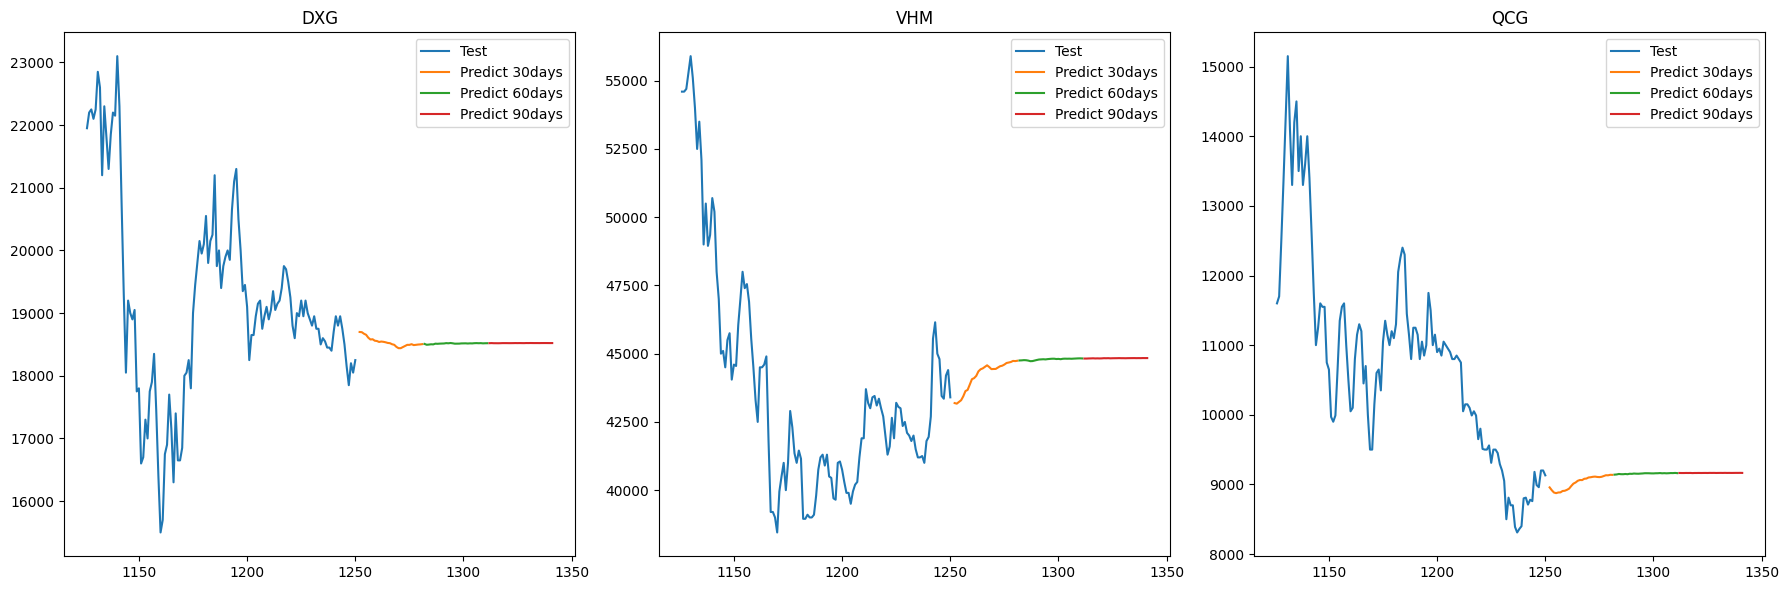

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# DXG
# dxg_train_data_index = pd.RangeIndex(start=0, stop=dxg_train_size, step=1)
# axs[0].plot(dxg_train_data['y'], label='Train')

dxg_test_data_index = pd.RangeIndex(start=dxg_train_size, stop=dxg_train_size + dxg_test_size, step=1)
axs[0].plot(dxg_test_data_index, dxg_test_data['y'], label='Test')

predict_30_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset), stop=len(dxg_dataset)+30, step=1)
axs[0].plot(predict_30_data_dxg_index, dxg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+30, stop=len(dxg_dataset)+60, step=1)
axs[0].plot(predict_60_data_dxg_index,dxg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+60, stop=len(dxg_dataset)+90, step=1)
axs[0].plot(predict_90_data_dxg_index,dxg_predict_lst_output[60:90], label = 'Predict 90days')

axs[0].legend()
axs[0].set_title('DXG')

# VHM
# vhm_train_data_index = pd.RangeIndex(start=0, stop=vhm_train_size, step=1)
# axs[1].plot(vhm_train_data['y'], label='Train')

vhm_test_data_index = pd.RangeIndex(start=vhm_train_size, stop=vhm_train_size + vhm_test_size, step=1)
axs[1].plot(vhm_test_data_index, vhm_test_data['y'], label='Test')

predict_30_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset), stop=len(vhm_dataset)+30, step=1)
axs[1].plot(predict_30_data_vhm_index, vhm_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+30, stop=len(vhm_dataset)+60, step=1)
axs[1].plot(predict_60_data_vhm_index,vhm_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+60, stop=len(vhm_dataset)+90, step=1)
axs[1].plot(predict_90_data_vhm_index,vhm_predict_lst_output[60:90], label = 'Predict 90days')

axs[1].legend()
axs[1].set_title('VHM')

# QCG
# qcg_train_data_index = pd.RangeIndex(start=0, stop=qcg_train_size, step=1)
# axs[2].plot(qcg_train_data['y'], label='Train')

qcg_test_data_index = pd.RangeIndex(start=qcg_train_size, stop=qcg_train_size + qcg_test_size, step=1)
axs[2].plot(qcg_test_data_index, qcg_test_data['y'], label='Test')

predict_30_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset), stop=len(qcg_dataset)+30, step=1)
axs[2].plot(predict_30_data_qcg_index, qcg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+30, stop=len(qcg_dataset)+60, step=1)
axs[2].plot(predict_60_data_qcg_index,qcg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+60, stop=len(qcg_dataset)+90, step=1)
axs[2].plot(predict_90_data_qcg_index,qcg_predict_lst_output[60:90], label = 'Predict 90days')

axs[2].legend()
axs[2].set_title('QCG')

plt.tight_layout()
plt.show()

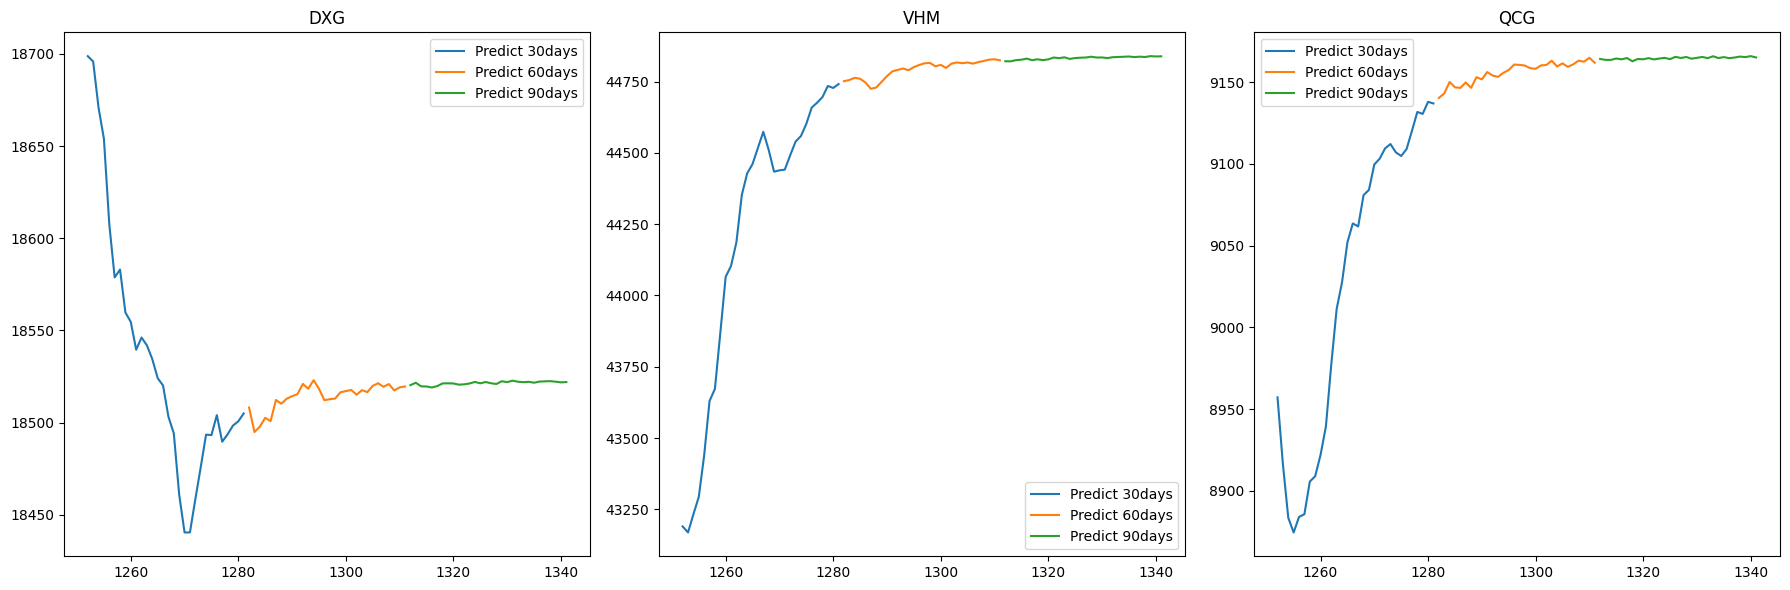

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# DXG
predict_30_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset), stop=len(dxg_dataset)+30, step=1)
axs[0].plot(predict_30_data_dxg_index, dxg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+30, stop=len(dxg_dataset)+60, step=1)
axs[0].plot(predict_60_data_dxg_index,dxg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+60, stop=len(dxg_dataset)+90, step=1)
axs[0].plot(predict_90_data_dxg_index,dxg_predict_lst_output[60:90], label = 'Predict 90days')

axs[0].legend()
axs[0].set_title('DXG')

# VHM
predict_30_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset), stop=len(vhm_dataset)+30, step=1)
axs[1].plot(predict_30_data_vhm_index, vhm_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+30, stop=len(vhm_dataset)+60, step=1)
axs[1].plot(predict_60_data_vhm_index,vhm_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+60, stop=len(vhm_dataset)+90, step=1)
axs[1].plot(predict_90_data_vhm_index,vhm_predict_lst_output[60:90], label = 'Predict 90days')

axs[1].legend()
axs[1].set_title('VHM')

# QCG
predict_30_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset), stop=len(qcg_dataset)+30, step=1)
axs[2].plot(predict_30_data_qcg_index, qcg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+30, stop=len(qcg_dataset)+60, step=1)
axs[2].plot(predict_60_data_qcg_index,qcg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+60, stop=len(qcg_dataset)+90, step=1)
axs[2].plot(predict_90_data_qcg_index,qcg_predict_lst_output[60:90], label = 'Predict 90days')

axs[2].legend()
axs[2].set_title('QCG')

plt.tight_layout()
plt.show()